# Plotting

In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

In [2]:
data = pd.read_json('all_results.json')
data.index.name = 'fold'
data = data.reset_index()
data['fold'] += 1

In [3]:
def make_plot(cols):
    
    melted_data = data.melt(
        id_vars='fold',
        value_vars=cols)
    
    g = sns.factorplot(
        x="fold", y="value", kind='point',
        hue='variable', data=melted_data, size=10,
        saturation=.5)
    
#     g.set(ylim=(0.8,.9))
    return g

In [4]:
cols = [
    'compliant_f1', 'compliant_precision', 'compliant_recall',
    'noncompliant_f1', 'noncompliant_precision', 'noncompliant_recall',
    'safe_f1', 'safe_precision', 'safe_recall']

In [5]:
# cols= ['compliant_f1', 'noncompliant_f1', 'safe_f1']
melted_df = data.melt(
        id_vars='fold',
        value_vars=cols)

In [6]:
melted_df.head()

,fold,variable,value
0,1,compliant_f1,0.0
1,2,compliant_f1,0.0
2,3,compliant_f1,0.0
3,4,compliant_f1,0.0
4,5,compliant_f1,0.0


In [7]:
new = melted_df.variable.str.split('_', expand=True)
new.columns = ['class', 'metric']

In [8]:
df = pd.concat([melted_df, new], axis=1)

In [9]:
df.head()

,fold,variable,value,class,metric
0,1,compliant_f1,0.0,compliant,f1
1,2,compliant_f1,0.0,compliant,f1
2,3,compliant_f1,0.0,compliant,f1
3,4,compliant_f1,0.0,compliant,f1
4,5,compliant_f1,0.0,compliant,f1


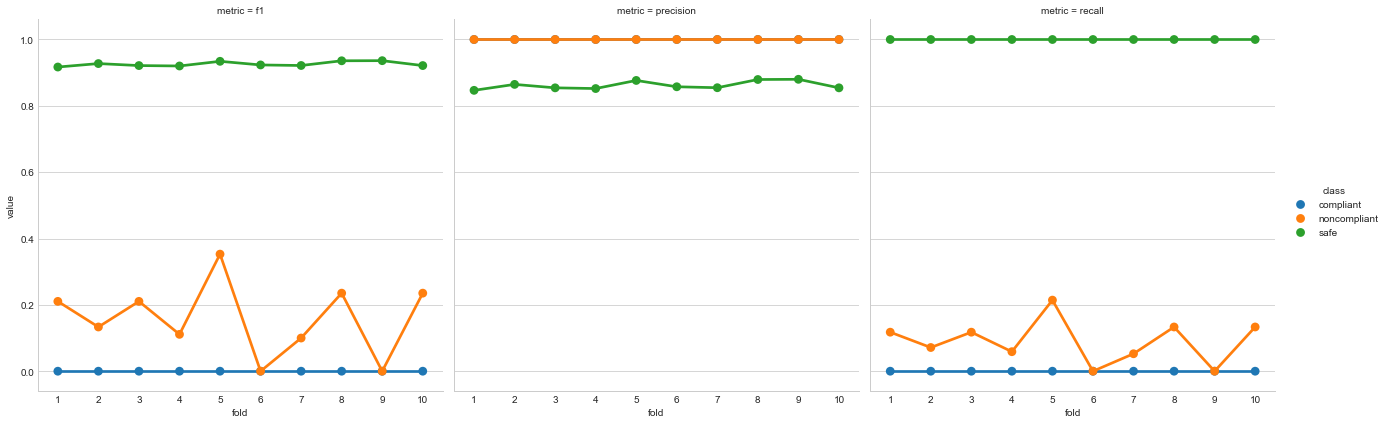

In [10]:
g = sns.factorplot(
    x="fold", y="value",
    col='metric', hue='class',
    data=df, size=6)

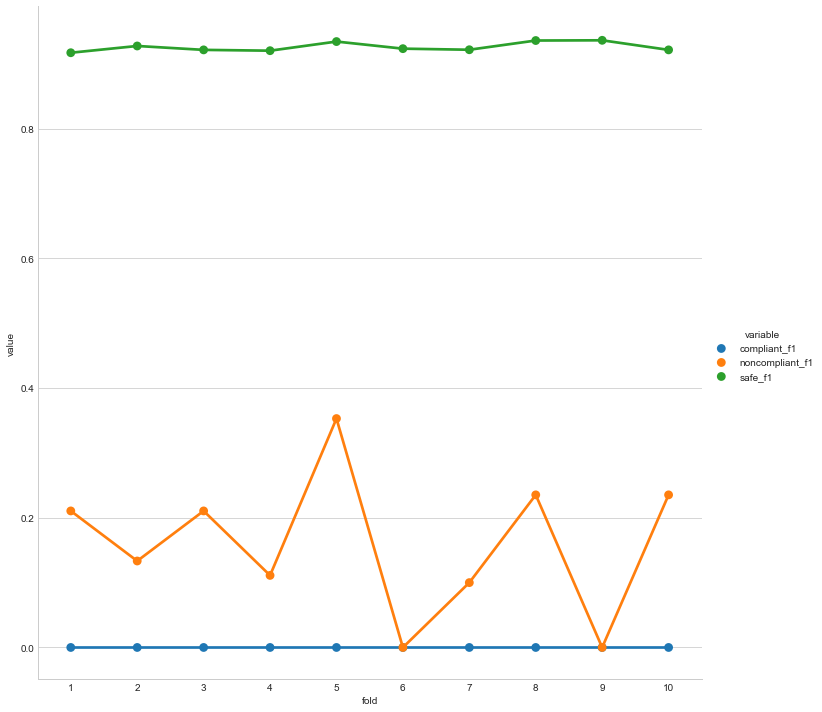

In [11]:
cols= ['compliant_f1', 'noncompliant_f1', 'safe_f1']
make_plot(cols)

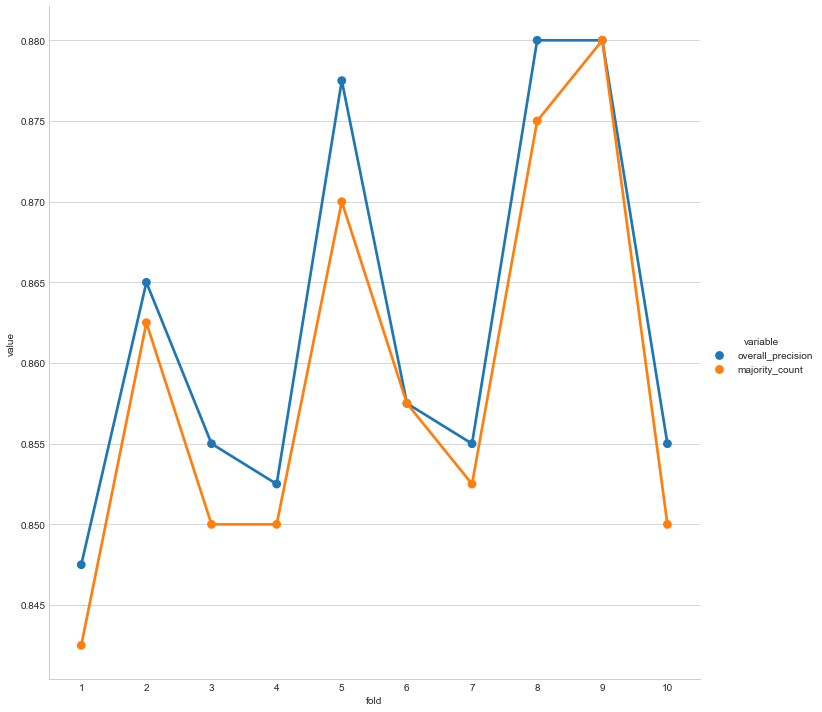

In [12]:
cols = ['overall_precision', 'majority_count']
make_plot(cols)

## K Means

In [67]:
def make_df_from_cluster_list(clusters):
    
    frames = []
    cols = ['heatmister_id', 'distance', 'speed', 'location', 'osha']

    for i, cluster in enumerate(clusters):
        df = pd.DataFrame(cluster, columns=cols)
        df['cluster'] = i
        frames.append(df)

    df = pd.concat(frames, ignore_index=True)
    df['distance'] = df['distance'].astype('float')
    df['speed'] = df['speed'].astype(int)
    
    return df

In [65]:
clusters = [[['2018_3416', '36.88', '5', 'Office', 'Safe'], ['2018_3578', '33.32', '8', 'Office', 'Safe'], ['2018_569', '38.96', '4', 'Office', 'Safe'], ['2018_2507', '39.31', '3', 'Office', 'Safe'], ['2018_2437', '36.8', '4', 'Office', 'Safe'], ['2018_3882', '36.23', '3', 'Office', 'Safe'], ['2018_3036', '26.62', '5', 'Office', 'Safe'], ['2018_1631', '39.04', '4', 'Office', 'Safe'], ['2018_1854', '38.19', '15', 'Office', 'Safe'], ['2018_460', '39.17', '4', 'Office', 'Safe'], ['2018_1795', '39.57', '6', 'Office', 'Safe'], ['2018_2912', '39.21', '6', 'Office', 'Safe'], ['2018_3922', '39.19', '8', 'Office', 'Safe'], ['2018_445', '28.16', '3', 'Office', 'Safe'], ['2018_2886', '34.11', '5', 'Office', 'Safe'], ['2018_1766', '38.13', '2', 'Office', 'Safe'], ['2018_2225', '32.94', '7', 'Office', 'Safe'], ['2018_1822', '38.97', '4', 'Office', 'Safe'], ['2018_3209', '27.83', '5', 'Office', 'Safe'], ['2018_161', '39.93', '4', 'Office', 'Safe'], ['2018_1327', '34.03', '5', 'Office', 'Safe'], ['2018_2836', '36.76', '7', 'Office', 'Safe'], ['2018_1644', '36.19', '8', 'Office', 'Safe'], ['2018_3703', '33.42', '9', 'Office', 'Safe'], ['2018_1241', '28.82', '9', 'Office', 'Safe'], ['2018_3273', '31.73', '8', 'Office', 'Safe'], ['2018_2661', '38.13', '4', 'Office', 'Safe'], ['2018_147', '37.36', '2', 'Office', 'Safe'], ['2018_1282', '31.88', '6', 'Office', 'Safe'], ['2018_2230', '29.42', '7', 'Office', 'Safe'], ['2018_606', '38.88', '4', 'Office', 'Safe'], ['2018_3589', '30.61', '2', 'Office', 'Safe'], ['2018_3148', '34.02', '6', 'Office', 'Safe'], ['2018_944', '38.21', '5', 'Office', 'Safe'], ['2018_3469', '36.99', '3', 'Office', 'Safe'], ['2018_3934', '27.42', '27', 'Office', 'Compliant'], ['2018_3599', '37.14', '6', 'Office', 'Safe'], ['2018_524', '39.02', '4', 'Office', 'Safe'], ['2018_1057', '39.13', '4', 'Office', 'Safe'], ['2018_1478', '8.27', '6', 'Office', 'Safe'], ['2018_3486', '34', '6', 'Office', 'Safe'], ['2018_2101', '31.58', '6', 'Office', 'Safe'], ['2018_2725', '37.54', '5', 'Office', 'Safe'], ['2018_1320', '27.8', '6', 'Office', 'Safe'], ['2018_551', '32.53', '4', 'Office', 'Safe'], ['2018_1902', '37.5', '6', 'Office', 'Safe'], ['2018_2741', '39.4', '8', 'Office', 'Safe'], ['2018_120', '36.19', '2', 'Office', 'Safe'], ['2018_1562', '24.9', '8', 'Office', 'Safe'], ['2018_2139', '35.6', '1', 'Office', 'Safe'], ['2018_3925', '35.84', '9', 'Office', 'Safe'], ['2018_720', '27.14', '4', 'Office', 'Safe'], ['2018_3951', '28.69', '6', 'Office', 'Safe'], ['2018_91', '33.46', '8', 'Office', 'Safe'], ['2018_2081', '37.62', '3', 'Office', 'Safe'], ['2018_3443', '37.41', '5', 'Office', 'Safe'], ['2018_1698', '39.32', '5', 'Office', 'Safe'], ['2018_1433', '39.06', '8', 'Office', 'Safe'], ['2018_1695', '33.63', '5', 'Office', 'Safe'], ['2018_3608', '33.62', '7', 'Office', 'Safe'], ['2018_3105', '37.68', '7', 'Office', 'Safe'], ['2018_3556', '33.9', '6', 'Office', 'Safe'], ['2018_2819', '32.71', '17', 'Office', 'Safe'], ['2018_933', '37.48', '6', 'Office', 'Safe'], ['2018_1986', '38.7', '8', 'Office', 'Safe'], ['2018_1141', '34.04', '6', 'Office', 'Safe'], ['2018_3272', '29.94', '4', 'Office', 'Safe'], ['2018_1403', '15.52', '3', 'Office', 'Safe'], ['2018_3129', '39.3', '2', 'Office', 'Safe'], ['2018_3836', '38.98', '7', 'Office', 'Safe'], ['2018_1514', '34.55', '7', 'Office', 'Safe'], ['2018_239', '29.92', '4', 'Office', 'Safe'], ['2018_3689', '29.01', '3', 'Office', 'Safe'], ['2018_3982', '37.17', '2', 'Office', 'Safe'], ['2018_1751', '39.83', '4', 'Office', 'Safe'], ['2018_1291', '32.09', '6', 'Office', 'Safe'], ['2018_2780', '36.24', '2', 'Office', 'Safe'], ['2018_386', '39.66', '19', 'Office', 'Compliant'], ['2018_3432', '36.07', '5', 'Office', 'Safe'], ['2018_1041', '37.58', '7', 'Office', 'Safe'], ['2018_1251', '33.17', '2', 'Office', 'Safe'], ['2018_110', '38.38', '6', 'Office', 'Safe'], ['2018_3978', '31.36', '5', 'Office', 'Safe'], ['2018_2004', '34.95', '0', 'Office', 'Safe'], ['2018_35', '28.91', '4', 'Office', 'Safe'], ['2018_1984', '38.5', '7', 'Office', 'Safe'], ['2018_3588', '36.91', '6', 'Office', 'Safe'], ['2018_3140', '38.74', '6', 'Office', 'Safe'], ['2018_946', '38.96', '21', 'Office', 'Compliant'], ['2018_1159', '31.14', '9', 'Office', 'Safe'], ['2018_490', '32.09', '2', 'Office', 'Safe'], ['2018_2269', '34.61', '6', 'Office', 'Safe'], ['2018_65', '34.46', '3', 'Office', 'Safe'], ['2018_3151', '39.22', '3', 'Office', 'Safe'], ['2018_3414', '35.15', '5', 'Office', 'Safe'], ['2018_1920', '37.26', '5', 'Office', 'Safe'], ['2018_824', '38.98', '5', 'Office', 'Safe'], ['2018_1784', '39.61', '6', 'Office', 'Safe'], ['2018_2847', '35.2', '6', 'Office', 'Safe'], ['2018_2378', '39.87', '5', 'Office', 'Safe'], ['2018_3531', '39.93', '4', 'Office', 'Safe'], ['2018_1708', '29.85', '6', 'Office', 'Safe'], ['2018_2425', '35.44', '2', 'Office', 'Safe'], ['2018_3370', '38.76', '4', 'Office', 'Safe'], ['2018_3090', '30.45', '2', 'Office', 'Safe'], ['2018_786', '33.48', '5', 'Office', 'Safe'], ['2018_2457', '38.66', '3', 'Office', 'Safe'], ['2018_3027', '27.99', '2', 'Office', 'Safe'], ['2018_865', '39.78', '5', 'Office', 'Safe'], ['2018_240', '31.45', '8', 'Office', 'Safe'], ['2018_2170', '30.52', '11', 'Office', 'Safe'], ['2018_480', '35.32', '6', 'Office', 'Safe'], ['2018_3592', '31.81', '4', 'Office', 'Safe'], ['2018_2600', '31.4', '7', 'Office', 'Safe'], ['2018_1091', '36.74', '7', 'Office', 'Safe'], ['2018_2350', '38.14', '5', 'Office', 'Safe'], ['2018_395', '24.58', '4', 'Office', 'Safe'], ['2018_1626', '39.56', '5', 'Office', 'Safe'], ['2018_2049', '21.6', '3', 'Office', 'Safe'], ['2018_1616', '38.06', '7', 'Office', 'Safe'], ['2018_642', '38.04', '7', 'Office', 'Safe'], ['2018_2722', '40', '9', 'Office', 'Safe'], ['2018_1536', '38.93', '1', 'Office', 'Safe'], ['2018_1335', '37.1', '6', 'Office', 'Safe'], ['2018_500', '36.49', '5', 'Office', 'Safe'], ['2018_2687', '39.05', '3', 'Office', 'Safe'], ['2018_2729', '38.94', '8', 'Office', 'Safe'], ['2018_624', '31.3', '5', 'Office', 'Safe'], ['2018_539', '26.78', '2', 'Office', 'Safe'], ['2018_3369', '36.66', '4', 'Office', 'Safe'], ['2018_1787', '28.32', '3', 'Office', 'Safe'], ['2018_1618', '38.23', '2', 'Office', 'Safe'], ['2018_1702', '29.32', '6', 'Office', 'Safe'], ['2018_756', '32.72', '0', 'Office', 'Safe'], ['2018_3245', '37.63', '3', 'Office', 'Safe'], ['2018_1300', '39.79', '6', 'Office', 'Safe'], ['2018_3728', '30.44', '3', 'Office', 'Safe'], ['2018_717', '33.6', '24', 'Office', 'Compliant'], ['2018_2454', '31.72', '2', 'Office', 'Safe'], ['2018_2368', '32.33', '7', 'Office', 'Safe'], ['2018_2145', '39.57', '4', 'Office', 'Safe'], ['2018_474', '37.3', '5', 'Office', 'Safe'], ['2018_2950', '26.95', '8', 'Office', 'Safe'], ['2018_3597', '25.48', '5', 'Office', 'Safe'], ['2018_286', '35.82', '5', 'Office', 'Safe'], ['2018_1740', '35.67', '5', 'Office', 'Safe'], ['2018_1767', '25.78', '3', 'Office', 'Safe'], ['2018_3220', '39.14', '7', 'Office', 'Safe'], ['2018_1093', '34.04', '5', 'Office', 'Safe'], ['2018_3753', '37.64', '7', 'Office', 'Safe'], ['2018_1501', '34.94', '15', 'Office', 'Safe'], ['2018_3603', '39.75', '8', 'Office', 'Safe'], ['2018_766', '37.73', '3', 'Office', 'Safe'], ['2018_3072', '37.91', '7', 'Office', 'Safe'], ['2018_889', '28.74', '5', 'Office', 'Safe'], ['2018_3779', '33.56', '7', 'Office', 'Safe'], ['2018_255', '31.13', '4', 'Office', 'Safe'], ['2018_1062', '31.24', '1', 'Office', 'Safe'], ['2018_2400', '38.47', '2', 'Office', 'Safe'], ['2018_2337', '38.76', '6', 'Office', 'Safe'], ['2018_3407', '38.2', '6', 'Office', 'Safe'], ['2018_3291', '17.66', '23', 'Office', 'Compliant'], ['2018_640', '35.58', '5', 'Office', 'Safe'], ['2018_1859', '26.14', '5', 'Office', 'Safe'], ['2018_2007', '37.68', '4', 'Office', 'Safe'], ['2018_650', '25.17', '6', 'Office', 'Safe'], ['2018_2267', '32.3', '5', 'Office', 'Safe'], ['2018_3323', '38.4', '4', 'Office', 'Safe'], ['2018_1279', '34.26', '5', 'Office', 'Safe'], ['2018_1849', '39.59', '3', 'Office', 'Safe'], ['2018_107', '39.67', '4', 'Office', 'Safe'], ['2018_765', '39.81', '4', 'Office', 'Safe'], ['2018_2386', '34.74', '8', 'Office', 'Safe'], ['2018_1592', '38.26', '5', 'Office', 'Safe'], ['2018_2583', '33.69', '8', 'Office', 'Safe'], ['2018_3197', '36.6', '4', 'Office', 'Safe'], ['2018_2740', '36.82', '3', 'Office', 'Safe'], ['2018_329', '35.22', '3', 'Office', 'Safe'], ['2018_115', '30.5', '5', 'Office', 'Safe'], ['2018_3099', '35.51', '7', 'Office', 'Safe'], ['2018_170', '34.59', '5', 'Office', 'Safe'], ['2018_3662', '27.3', '5', 'Office', 'Safe'], ['2018_2874', '29.28', '3', 'Office', 'Safe'], ['2018_3712', '33.18', '1', 'Office', 'Safe'], ['2018_759', '39.21', '8', 'Office', 'Safe'], ['2018_1682', '29.96', '6', 'Office', 'Safe'], ['2018_1479', '15.91', '6', 'Office', 'Safe'], ['2018_50', '38.42', '2', 'Office', 'Safe'], ['2018_3725', '39.93', '5', 'Office', 'Safe'], ['2018_2757', '30.31', '6', 'Office', 'Safe'], ['2018_2887', '32.36', '5', 'Office', 'Safe'], ['2018_1959', '36.51', '7', 'Office', 'Safe'], ['2018_1000', '36.59', '7', 'Office', 'Safe'], ['2018_3433', '39.44', '8', 'Office', 'Safe'], ['2018_3448', '32.54', '9', 'Office', 'Safe'], ['2018_2871', '36.42', '7', 'Office', 'Safe'], ['2018_1051', '36.93', '4', 'Office', 'Safe'], ['2018_3870', '29.13', '5', 'Office', 'Safe'], ['2018_3824', '38.49', '7', 'Office', 'Safe'], ['2018_1665', '37.47', '5', 'Office', 'Safe'], ['2018_3877', '38.49', '21', 'Office', 'Compliant'], ['2018_2519', '34.34', '0', 'Office', 'Safe'], ['2018_840', '23.2', '8', 'Office', 'Safe'], ['2018_2655', '38.7', '5', 'Office', 'Safe'], ['2018_3917', '37.89', '14', 'Office', 'Safe'], ['2018_3078', '35.52', '6', 'Office', 'Safe'], ['2018_324', '31.62', '2', 'Office', 'Safe'], ['2018_2520', '29.67', '5', 'Office', 'Safe'], ['2018_1694', '34.68', '7', 'Office', 'Safe'], ['2018_2717', '39.94', '4', 'Office', 'Safe'], ['2018_2224', '25.69', '8', 'Office', 'Safe'], ['2018_2737', '31.37', '5', 'Office', 'Safe'], ['2018_3944', '29.73', '4', 'Office', 'Safe'], ['2018_272', '34.3', '8', 'Office', 'Safe'], ['2018_2180', '37.26', '1', 'Office', 'Safe'], ['2018_2066', '38.27', '8', 'Office', 'Safe'], ['2018_868', '35.09', '4', 'Office', 'Safe'], ['2018_556', '19.62', '3', 'Office', 'Safe'], ['2018_2605', '39.19', '8', 'Office', 'Safe'], ['2018_1059', '35.55', '5', 'Office', 'Safe'], ['2018_3203', '16.39', '8', 'Office', 'Safe'], ['2018_588', '27.04', '6', 'Office', 'Safe'], ['2018_1472', '39.33', '6', 'Office', 'Safe'], ['2018_1938', '40', '6', 'Office', 'Safe'], ['2018_3450', '37.68', '5', 'Office', 'Safe'], ['2018_3793', '38.5', '1', 'Office', 'Safe'], ['2018_1823', '17.81', '26', 'Office', 'Compliant'], ['2018_3906', '39.06', '1', 'Office', 'Safe'], ['2018_1909', '34.46', '4', 'Office', 'Safe'], ['2018_482', '31.06', '3', 'Office', 'Safe'], ['2018_1764', '31.88', '7', 'Office', 'Safe'], ['2018_1225', '31.25', '4', 'Office', 'Safe'], ['2018_537', '39.64', '4', 'Office', 'Safe'], ['2018_499', '35.46', '5', 'Office', 'Safe'], ['2018_3021', '34.41', '4', 'Office', 'Safe'], ['2018_2464', '26.87', '3', 'Office', 'Safe'], ['2018_3246', '34.87', '4', 'Office', 'Safe'], ['2018_3952', '37.1', '6', 'Office', 'Safe'], ['2018_3005', '37.05', '5', 'Office', 'Safe'], ['2018_3796', '30.32', '3', 'Office', 'Safe'], ['2018_2939', '34.34', '3', 'Office', 'Safe'], ['2018_2999', '38.77', '5', 'Office', 'Safe'], ['2018_1621', '37.06', '8', 'Office', 'Safe'], ['2018_1192', '35.42', '3', 'Office', 'Safe'], ['2018_1850', '34.77', '5', 'Office', 'Safe'], ['2018_2877', '38.04', '4', 'Office', 'Safe'], ['2018_2181', '35.54', '7', 'Office', 'Safe'], ['2018_3963', '31.39', '5', 'Office', 'Safe'], ['2018_55', '35.29', '3', 'Office', 'Safe'], ['2018_1348', '32.08', '4', 'Office', 'Safe'], ['2018_1006', '36.08', '5', 'Office', 'Safe'], ['2018_1658', '39.31', '6', 'Office', 'Safe'], ['2018_659', '35.39', '7', 'Office', 'Safe'], ['2018_800', '38.08', '7', 'Office', 'Safe'], ['2018_3687', '30.15', '6', 'Office', 'Safe'], ['2018_2107', '39.26', '7', 'Office', 'Safe'], ['2018_1363', '36.26', '11', 'Office', 'Safe'], ['2018_1992', '38.58', '3', 'Office', 'Safe'], ['2018_568', '37.62', '16', 'Office', 'Safe'], ['2018_06', '34.68', '6', 'Office', 'Safe'], ['2018_3511', '30.97', '8', 'Office', 'Safe'], ['2018_1122', '31.14', '4', 'Office', 'Safe'], ['2018_1745', '34.77', '4', 'Office', 'Safe'], ['2018_1256', '33.86', '5', 'Office', 'Safe'], ['2018_2283', '33.45', '5', 'Office', 'Safe'], ['2018_1197', '38.91', '4', 'Office', 'Safe'], ['2018_3690', '30.34', '6', 'Office', 'Safe'], ['2018_3566', '35.83', '6', 'Office', 'Safe'], ['2018_3899', '39.39', '8', 'Office', 'Safe'], ['2018_3775', '39.01', '5', 'Office', 'Safe'], ['2018_2237', '33.5', '5', 'Office', 'Safe'], ['2018_696', '39.16', '5', 'Office', 'Safe'], ['2018_1818', '34.28', '2', 'Office', 'Safe'], ['2018_1648', '32.67', '3', 'Office', 'Safe'], ['2018_1904', '37.52', '1', 'Office', 'Safe'], ['2018_2483', '37.14', '2', 'Office', 'Safe'], ['2018_2086', '35.14', '5', 'Office', 'Safe'], ['2018_3936', '36.37', '5', 'Office', 'Safe'], ['2018_2070', '37.27', '6', 'Office', 'Safe'], ['2018_3814', '32.63', '4', 'Office', 'NonCompliant'], ['2018_903', '37.73', '4', 'Office', 'Safe'], ['2018_1485', '26.27', '24', 'Office', 'Safe'], ['2018_2334', '34.86', '3', 'Office', 'Safe'], ['2018_850', '29.7', '6', 'Office', 'Safe'], ['2018_1185', '34.24', '4', 'Office', 'Safe'], ['2018_3453', '23.46', '2', 'Office', 'Safe'], ['2018_2966', '30.27', '4', 'Office', 'Safe'], ['2018_1249', '36.19', '4', 'Office', 'Safe'], ['2018_349', '25.39', '7', 'Office', 'Safe'], ['2018_820', '36.67', '7', 'Office', 'Safe'], ['2018_2252', '33.77', '4', 'Office', 'Safe'], ['2018_1975', '35.32', '2', 'Office', 'Safe'], ['2018_2008', '23.06', '15', 'Office', 'Safe'], ['2018_3759', '34.81', '3', 'Office', 'Safe'], ['2018_2375', '25.9', '3', 'Office', 'Safe'], ['2018_3011', '38.32', '5', 'Office', 'Safe'], ['2018_3967', '33.01', '4', 'Office', 'Safe'], ['2018_2789', '36.03', '6', 'Office', 'Safe'], ['2018_645', '36.33', '8', 'Office', 'Safe'], ['2018_3127', '38.09', '2', 'Office', 'Safe'], ['2018_3104', '36.53', '6', 'Office', 'Safe'], ['2018_2705', '29.93', '4', 'Office', 'Safe'], ['2018_3184', '32.12', '6', 'Office', 'Safe'], ['2018_1371', '39.46', '9', 'Office', 'Safe'], ['2018_2424', '27.5', '3', 'Office', 'Safe'], ['2018_1937', '39.76', '8', 'Office', 'Safe'], ['2018_2478', '38.92', '7', 'Office', 'Safe'], ['2018_1262', '39.73', '7', 'Office', 'Safe'], ['2018_2899', '31.07', '3', 'Office', 'Safe'], ['2018_3434', '33.66', '8', 'Office', 'Safe'], ['2018_3649', '33.22', '3', 'Office', 'Safe'], ['2018_2569', '37.57', '6', 'Office', 'Safe'], ['2018_352', '32.49', '3', 'Office', 'Safe'], ['2018_3826', '33.36', '6', 'Office', 'Safe'], ['2018_1538', '27.86', '8', 'Office', 'Safe'], ['2018_2016', '34.96', '6', 'Office', 'Safe'], ['2018_3452', '36.98', '6', 'Office', 'Safe'], ['2018_3601', '37', '5', 'Office', 'Safe'], ['2018_575', '35.04', '5', 'Office', 'Safe'], ['2018_1954', '35.44', '6', 'Office', 'Safe'], ['2018_2913', '38.34', '4', 'Office', 'Safe'], ['2018_1639', '31.13', '6', 'Office', 'Safe'], ['2018_3845', '37.04', '5', 'Office', 'Safe'], ['2018_95', '34.54', '2', 'Office', 'Safe'], ['2018_3208', '39.62', '7', 'Office', 'Safe'], ['2018_905', '39.68', '4', 'Office', 'Safe'], ['2018_131', '32.61', '23', 'Office', 'Compliant'], ['2018_2011', '23.03', '21', 'Office', 'Compliant'], ['2018_2159', '35.52', '6', 'Office', 'Safe'], ['2018_3841', '34.12', '4', 'Office', 'Safe'], ['2018_700', '35.47', '3', 'Office', 'Safe'], ['2018_67', '39.79', '4', 'Office', 'Safe'], ['2018_3670', '38.61', '6', 'Office', 'Safe'], ['2018_1451', '34.72', '5', 'Office', 'Safe'], ['2018_2658', '32.58', '5', 'Office', 'Safe'], ['2018_1469', '35.17', '9', 'Office', 'Safe'], ['2018_3211', '35.38', '4', 'Office', 'Safe'], ['2018_2318', '37.17', '5', 'Office', 'Safe'], ['2018_87', '37.91', '5', 'Office', 'Safe'], ['2018_3187', '32.52', '10', 'Office', 'Safe'], ['2018_3063', '33.2', '3', 'Office', 'Safe'], ['2018_735', '31.12', '5', 'Office', 'Safe'], ['2018_3117', '32.36', '5', 'Office', 'Safe'], ['2018_3023', '37.15', '7', 'Office', 'Safe'], ['2018_2030', '35.11', '15', 'Office', 'Safe'], ['2018_2614', '34.12', '4', 'Office', 'Safe'], ['2018_123', '36.12', '4', 'Office', 'Safe'], ['2018_192', '39.88', '4', 'Office', 'Safe'], ['2018_16', '31.6', '5', 'Office', 'Safe'], ['2018_1910', '36.31', '6', 'Office', 'Safe'], ['2018_273', '39.6', '7', 'Office', 'Safe'], ['2018_888', '39.72', '7', 'Office', 'Safe'], ['2018_638', '34.49', '8', 'Office', 'Safe'], ['2018_3466', '33.42', '4', 'Office', 'Safe'], ['2018_63', '35.52', '5', 'Office', 'Safe'], ['2018_2465', '38.68', '4', 'Office', 'Safe'], ['2018_399', '39.04', '4', 'Office', 'Safe'], ['2018_3827', '34.4', '2', 'Office', 'Safe'], ['2018_743', '38.6', '2', 'Office', 'Safe'], ['2018_99', '37.13', '5', 'Office', 'Safe'], ['2018_401', '36.52', '7', 'Office', 'Safe'], ['2018_2263', '37.09', '7', 'Office', 'Safe'], ['2018_809', '29.59', '4', 'Office', 'Safe'], ['2018_574', '37.79', '3', 'Office', 'Safe'], ['2018_2085', '39.67', '5', 'Office', 'Safe'], ['2018_373', '30.77', '8', 'Office', 'Safe'], ['2018_2858', '37.21', '5', 'Office', 'Safe'], ['2018_2395', '38.43', '4', 'Office', 'Safe'], ['2018_2825', '36.89', '6', 'Office', 'Safe'], ['2018_1349', '37.18', '3', 'Office', 'Safe'], ['2018_2672', '31.38', '7', 'Office', 'Safe'], ['2018_660', '39.37', '5', 'Office', 'Safe'], ['2018_2970', '33.04', '3', 'Office', 'Safe'], ['2018_1942', '32.54', '8', 'Office', 'Safe'], ['2018_1362', '38.66', '1', 'Office', 'Safe'], ['2018_1447', '36.11', '9', 'Office', 'Safe'], ['2018_841', '36.82', '5', 'Office', 'Safe'], ['2018_2980', '34.76', '5', 'Office', 'Safe'], ['2018_3742', '28.36', '7', 'Office', 'Safe'], ['2018_3299', '36.91', '6', 'Office', 'Safe'], ['2018_74', '31.35', '3', 'Office', 'Safe'], ['2018_1581', '29.69', '6', 'Office', 'Safe'], ['2018_3600', '39.21', '6', 'Office', 'Safe'], ['2018_3964', '38.4', '4', 'Office', 'Safe'], ['2018_2433', '31.35', '7', 'Office', 'Safe'], ['2018_3428', '22.36', '5', 'Office', 'Safe'], ['2018_3522', '29.88', '4', 'Office', 'Safe'], ['2018_471', '37.42', '8', 'Office', 'Safe'], ['2018_2916', '34.86', '6', 'Office', 'Safe'], ['2018_3999', '35.54', '6', 'Office', 'Safe'], ['2018_3966', '33.68', '4', 'Office', 'Safe'], ['2018_916', '39.87', '4', 'Office', 'Safe'], ['2018_3278', '36.63', '5', 'Office', 'Safe'], ['2018_326', '27.32', '6', 'Office', 'Safe'], ['2018_1404', '35.76', '7', 'Office', 'Safe'], ['2018_1853', '37.02', '2', 'Office', 'Safe'], ['2018_983', '28.98', '5', 'Office', 'Safe'], ['2018_3965', '33.65', '8', 'Office', 'Safe'], ['2018_1843', '33.4', '9', 'Office', 'Safe'], ['2018_1036', '30.84', '7', 'Office', 'Safe'], ['2018_1292', '35.24', '7', 'Office', 'Safe'], ['2018_282', '36.76', '5', 'Office', 'Safe'], ['2018_3275', '39.28', '6', 'Office', 'Safe'], ['2018_1989', '35.97', '7', 'Office', 'Safe'], ['2018_3289', '32.95', '10', 'Office', 'Safe'], ['2018_2959', '29.54', '5', 'Office', 'Safe'], ['2018_635', '38.82', '16', 'Office', 'Safe'], ['2018_441', '39.43', '6', 'Office', 'Safe'], ['2018_2921', '36.18', '5', 'Office', 'Safe'], ['2018_951', '36.84', '6', 'Office', 'Safe'], ['2018_3169', '39.53', '6', 'Office', 'Safe'], ['2018_3359', '37.14', '6', 'Office', 'Safe']], [['2018_2861', '161.64', '10', 'Warehouse', 'Safe'], ['2018_3253', '166.62', '9', 'Warehouse', 'Safe'], ['2018_2490', '167.88', '6', 'Warehouse', 'Safe'], ['2018_1963', '154.75', '13', 'Warehouse', 'Safe'], ['2018_33', '152.55', '17', 'Warehouse', 'Safe'], ['2018_3265', '160.71', '11', 'Warehouse', 'Safe'], ['2018_2811', '158.86', '14', 'Warehouse', 'Safe'], ['2018_3996', '156.38', '6', 'Warehouse', 'Safe'], ['2018_988', '168.88', '14', 'Warehouse', 'Safe'], ['2018_2451', '149.55', '7', 'Warehouse', 'Safe'], ['2018_937', '168.27', '14', 'Warehouse', 'Safe'], ['2018_3593', '164.43', '12', 'Warehouse', 'Safe'], ['2018_3024', '161.32', '9', 'Warehouse', 'Safe'], ['2018_37', '170.9', '15', 'Warehouse', 'Safe'], ['2018_936', '169.65', '14', 'Warehouse', 'Safe'], ['2018_1228', '162.56', '13', 'Warehouse', 'Safe'], ['2018_1359', '166.72', '9', 'Warehouse', 'Safe'], ['2018_3167', '160.78', '11', 'Warehouse', 'Safe'], ['2018_3948', '171.64', '16', 'Warehouse', 'Safe'], ['2018_114', '164.95', '11', 'Warehouse', 'Safe'], ['2018_3739', '170.72', '15', 'Warehouse', 'Safe'], ['2018_1516', '165.71', '6', 'Warehouse', 'Safe'], ['2018_2613', '152.99', '6', 'Warehouse', 'Safe'], ['2018_2462', '166.45', '17', 'Warehouse', 'Safe'], ['2018_2291', '155.02', '9', 'Warehouse', 'Safe'], ['2018_1835', '141.96', '15', 'Warehouse', 'Safe'], ['2018_826', '167.02', '10', 'Warehouse', 'Safe'], ['2018_2010', '169.56', '17', 'Warehouse', 'Safe'], ['2018_402', '153.45', '1', 'Warehouse', 'Safe'], ['2018_3851', '150.46', '14', 'Warehouse', 'Safe'], ['2018_1513', '146.8', '18', 'Warehouse', 'Safe'], ['2018_2920', '156.57', '7', 'Warehouse', 'Safe'], ['2018_121', '166.15', '11', 'Warehouse', 'Safe'], ['2018_3992', '167.89', '15', 'Warehouse', 'Safe'], ['2018_647', '156.41', '10', 'Warehouse', 'Safe'], ['2018_1113', '160.2', '9', 'Warehouse', 'Safe'], ['2018_2647', '169.54', '12', 'Warehouse', 'Safe'], ['2018_1110', '156.71', '17', 'Warehouse', 'Safe'], ['2018_1441', '156.17', '17', 'Warehouse', 'Safe'], ['2018_68', '139.35', '6', 'Warehouse', 'Safe'], ['2018_529', '152.1', '10', 'Warehouse', 'Safe'], ['2018_2704', '167.46', '14', 'Warehouse', 'Safe'], ['2018_762', '160.23', '4', 'Warehouse', 'Safe'], ['2018_3549', '153.84', '9', 'Warehouse', 'Safe'], ['2018_3134', '151.09', '13', 'Warehouse', 'Safe'], ['2018_3860', '163.5', '9', 'Warehouse', 'Safe'], ['2018_337', '162.97', '15', 'Warehouse', 'Safe'], ['2018_646', '158.02', '8', 'Warehouse', 'Safe'], ['2018_1558', '156.76', '15', 'Warehouse', 'Safe'], ['2018_709', '159.86', '9', 'Warehouse', 'Safe'], ['2018_3206', '164.4', '10', 'Warehouse', 'Safe'], ['2018_998', '134.81', '20', 'Warehouse', 'Safe'], ['2018_1995', '166.1', '18', 'Warehouse', 'Safe'], ['2018_3121', '168.36', '13', 'Warehouse', 'Safe'], ['2018_1482', '161.6', '6', 'Warehouse', 'NonCompliant'], ['2018_1629', '140.49', '7', 'Warehouse', 'Safe'], ['2018_2596', '153.81', '18', 'Warehouse', 'Safe'], ['2018_51', '166.68', '14', 'Warehouse', 'Safe'], ['2018_410', '168.33', '10', 'Warehouse', 'Safe'], ['2018_1226', '160.94', '13', 'Warehouse', 'Safe'], ['2018_2417', '153.5', '1', 'Warehouse', 'Safe'], ['2018_252', '145.17', '15', 'Warehouse', 'Safe'], ['2018_3611', '169.35', '19', 'Warehouse', 'Safe'], ['2018_970', '152.6', '15', 'Warehouse', 'Safe'], ['2018_1633', '156.61', '20', 'Warehouse', 'Safe'], ['2018_2415', '134.54', '10', 'Warehouse', 'Safe'], ['2018_3678', '116.58', '4', 'Warehouse', 'Safe'], ['2018_3181', '152.64', '16', 'Warehouse', 'Safe'], ['2018_2248', '156.01', '14', 'Warehouse', 'Safe'], ['2018_1086', '168.03', '9', 'Warehouse', 'Safe'], ['2018_1613', '171.29', '19', 'Warehouse', 'Safe'], ['2018_268', '162.8', '11', 'Warehouse', 'Safe'], ['2018_213', '159.11', '15', 'Warehouse', 'Safe'], ['2018_891', '150.21', '1', 'Warehouse', 'Safe'], ['2018_2552', '166.64', '11', 'Warehouse', 'Safe'], ['2018_2524', '168.04', '12', 'Warehouse', 'Safe'], ['2018_3191', '161.9', '15', 'Warehouse', 'Safe'], ['2018_1951', '156.2', '4', 'Warehouse', 'Safe'], ['2018_2625', '168.77', '10', 'Warehouse', 'Safe'], ['2018_2057', '167.46', '11', 'Warehouse', 'Safe'], ['2018_2319', '156.87', '16', 'Warehouse', 'Safe'], ['2018_1098', '158.88', '20', 'Warehouse', 'Safe'], ['2018_2601', '162.56', '23', 'Warehouse', 'Compliant'], ['2018_3625', '165.15', '9', 'Warehouse', 'Safe'], ['2018_1449', '161.76', '5', 'Warehouse', 'Safe'], ['2018_535', '163.26', '13', 'Warehouse', 'Safe'], ['2018_2794', '135.98', '14', 'Warehouse', 'Safe'], ['2018_3002', '151.59', '4', 'Warehouse', 'Safe'], ['2018_2821', '145.73', '9', 'Warehouse', 'Safe'], ['2018_3193', '142.83', '5', 'Warehouse', 'Safe'], ['2018_413', '175.29', '34', 'Warehouse', 'Compliant'], ['2018_1281', '165.1', '13', 'Warehouse', 'Safe'], ['2018_2706', '166.02', '12', 'Warehouse', 'Safe'], ['2018_206', '169.66', '11', 'Warehouse', 'Safe'], ['2018_704', '158.31', '4', 'Warehouse', 'Safe'], ['2018_1712', '159.31', '10', 'Warehouse', 'Safe'], ['2018_2829', '169.78', '15', 'Warehouse', 'Safe'], ['2018_3057', '158.71', '9', 'Warehouse', 'Safe'], ['2018_732', '165.87', '3', 'Warehouse', 'Safe'], ['2018_2201', '165.58', '6', 'Warehouse', 'Safe'], ['2018_3267', '159.7', '11', 'Warehouse', 'Safe'], ['2018_852', '154.62', '5', 'Warehouse', 'Safe'], ['2018_3307', '155.84', '13', 'Warehouse', 'Safe'], ['2018_1944', '170.22', '16', 'Warehouse', 'Safe'], ['2018_2837', '162.68', '5', 'Warehouse', 'Safe'], ['2018_829', '163.72', '6', 'Warehouse', 'Safe'], ['2018_351', '137.67', '4', 'Warehouse', 'Safe'], ['2018_1517', '149.91', '5', 'Warehouse', 'Safe'], ['2018_2547', '166.87', '15', 'Warehouse', 'Safe'], ['2018_1692', '164.26', '11', 'Warehouse', 'Safe'], ['2018_954', '159.53', '15', 'Warehouse', 'Safe'], ['2018_1077', '164.53', '7', 'Warehouse', 'Safe'], ['2018_3048', '155.86', '6', 'Warehouse', 'Safe'], ['2018_346', '168.01', '15', 'Warehouse', 'Safe'], ['2018_1296', '153.34', '9', 'Warehouse', 'Safe'], ['2018_2315', '164.37', '7', 'Warehouse', 'Safe'], ['2018_96', '158.63', '13', 'Warehouse', 'Safe'], ['2018_3076', '164.96', '5', 'Warehouse', 'Safe'], ['2018_3481', '173.26', '19', 'Warehouse', 'Safe'], ['2018_3691', '161.26', '10', 'Warehouse', 'Safe'], ['2018_3204', '169.75', '5', 'Warehouse', 'Safe'], ['2018_3400', '169.64', '9', 'Warehouse', 'Safe'], ['2018_1836', '157.73', '12', 'Warehouse', 'Safe'], ['2018_260', '169.02', '4', 'Warehouse', 'Safe'], ['2018_3341', '164.29', '12', 'Warehouse', 'Safe'], ['2018_3060', '147.55', '12', 'Warehouse', 'Safe'], ['2018_2079', '162.96', '22', 'Warehouse', 'Compliant'], ['2018_2474', '170.91', '12', 'Warehouse', 'Safe'], ['2018_566', '160.26', '20', 'Warehouse', 'Safe'], ['2018_1219', '166.8', '10', 'Warehouse', 'Safe'], ['2018_2187', '161.98', '9', 'Warehouse', 'Safe'], ['2018_3895', '143.37', '10', 'Warehouse', 'Safe'], ['2018_1773', '163.89', '8', 'Warehouse', 'Safe'], ['2018_897', '160.5', '14', 'Warehouse', 'Safe'], ['2018_335', '162.34', '9', 'Warehouse', 'Safe'], ['2018_938', '165.07', '8', 'Warehouse', 'Safe'], ['2018_2292', '168.24', '10', 'Warehouse', 'Safe'], ['2018_367', '166.96', '8', 'Warehouse', 'Safe'], ['2018_70', '166.8', '8', 'Warehouse', 'Safe'], ['2018_1880', '163.36', '15', 'Warehouse', 'Safe'], ['2018_381', '145.07', '6', 'Warehouse', 'Safe'], ['2018_238', '160.04', '10', 'Warehouse', 'Safe'], ['2018_1216', '149.51', '10', 'Warehouse', 'Safe'], ['2018_980', '164.77', '6', 'Warehouse', 'Safe'], ['2018_1140', '154.74', '1', 'Warehouse', 'Safe'], ['2018_1012', '153.58', '12', 'Warehouse', 'Safe'], ['2018_2790', '164.38', '8', 'Warehouse', 'Safe'], ['2018_359', '161.51', '5', 'Warehouse', 'Safe'], ['2018_3653', '174.32', '28', 'Warehouse', 'Compliant'], ['2018_2561', '171.99', '13', 'Warehouse', 'Safe'], ['2018_21', '149.19', '16', 'Warehouse', 'Safe'], ['2018_1865', '157.02', '21', 'Warehouse', 'Compliant'], ['2018_3389', '160.49', '6', 'Warehouse', 'Safe'], ['2018_962', '170.58', '22', 'Warehouse', 'Compliant'], ['2018_1991', '168.22', '9', 'Warehouse', 'Safe'], ['2018_189', '157.26', '18', 'Warehouse', 'Safe'], ['2018_1273', '135.38', '8', 'Warehouse', 'Safe'], ['2018_372', '162.26', '14', 'Warehouse', 'Safe'], ['2018_3257', '170.72', '7', 'Warehouse', 'Safe'], ['2018_08', '160.52', '19', 'Warehouse', 'Safe'], ['2018_2408', '170.38', '16', 'Warehouse', 'Safe'], ['2018_2528', '164.47', '7', 'Warehouse', 'Safe'], ['2018_1230', '169.72', '6', 'Warehouse', 'Safe'], ['2018_3635', '159.47', '22', 'Warehouse', 'Compliant'], ['2018_1580', '171.7', '12', 'Warehouse', 'Safe'], ['2018_3852', '154.72', '19', 'Warehouse', 'Safe'], ['2018_3102', '154.33', '3', 'Warehouse', 'Safe'], ['2018_3551', '164.47', '10', 'Warehouse', 'Safe'], ['2018_1574', '159.14', '8', 'Warehouse', 'Safe'], ['2018_1678', '154.93', '14', 'Warehouse', 'Safe'], ['2018_1464', '171.19', '10', 'Warehouse', 'Safe'], ['2018_2686', '159.11', '16', 'Warehouse', 'Safe'], ['2018_774', '152.09', '24', 'Warehouse', 'Compliant'], ['2018_3839', '151.65', '1', 'Warehouse', 'Safe'], ['2018_721', '172.15', '8', 'Warehouse', 'Safe'], ['2018_3236', '146.35', '16', 'Warehouse', 'Safe'], ['2018_2303', '162.58', '1', 'Warehouse', 'Safe'], ['2018_1032', '132.03', '15', 'Warehouse', 'Safe'], ['2018_280', '166.33', '8', 'Warehouse', 'Safe'], ['2018_200', '167.22', '2', 'Warehouse', 'Safe'], ['2018_3518', '168.09', '12', 'Warehouse', 'Safe'], ['2018_3446', '157.26', '10', 'Warehouse', 'Safe'], ['2018_2455', '137.16', '16', 'Warehouse', 'Safe'], ['2018_1655', '172.43', '11', 'Warehouse', 'Safe'], ['2018_718', '159.89', '17', 'Warehouse', 'Safe'], ['2018_1895', '168.56', '5', 'Warehouse', 'Safe'], ['2018_1800', '170.85', '16', 'Warehouse', 'Safe'], ['2018_3897', '163.39', '6', 'Warehouse', 'Safe'], ['2018_861', '170.23', '13', 'Warehouse', 'Safe'], ['2018_697', '149.36', '9', 'Warehouse', 'Safe'], ['2018_3528', '161.94', '9', 'Warehouse', 'Safe'], ['2018_3093', '161.14', '10', 'Warehouse', 'Safe'], ['2018_3583', '168.01', '3', 'Warehouse', 'Safe'], ['2018_2320', '167.21', '5', 'Warehouse', 'Safe'], ['2018_258', '171.29', '14', 'Warehouse', 'Safe'], ['2018_504', '172.5', '5', 'Warehouse', 'Safe'], ['2018_3247', '170.72', '1', 'Warehouse', 'Safe'], ['2018_2035', '172.02', '14', 'Warehouse', 'Safe'], ['2018_3441', '169.25', '9', 'Warehouse', 'Safe'], ['2018_1780', '171.79', '6', 'Warehouse', 'Safe'], ['2018_792', '173.35', '6', 'Warehouse', 'Safe'], ['2018_869', '165.93', '1', 'Warehouse', 'Safe'], ['2018_845', '170.64', '13', 'Warehouse', 'Safe'], ['2018_997', '168.09', '5', 'Warehouse', 'Safe'], ['2018_3527', '168.34', '9', 'Warehouse', 'Safe'], ['2018_1184', '168.64', '9', 'Warehouse', 'Safe'], ['2018_3762', '169.32', '10', 'Warehouse', 'Safe'], ['2018_586', '171.7', '14', 'Warehouse', 'Safe'], ['2018_04', '168.9', '5', 'Warehouse', 'Safe'], ['2018_1929', '170.72', '1', 'Warehouse', 'Safe'], ['2018_1518', '166.36', '1', 'Warehouse', 'Safe'], ['2018_1351', '168.14', '1', 'Warehouse', 'Safe'], ['2018_2003', '168.76', '7', 'Warehouse', 'Safe'], ['2018_877', '173.02', '3', 'Warehouse', 'Safe'], ['2018_1446', '169.24', '4', 'Warehouse', 'Safe'], ['2018_3563', '172.85', '13', 'Warehouse', 'Safe'], ['2018_194', '173.38', '11', 'Warehouse', 'Safe'], ['2018_327', '171.24', '1', 'Warehouse', 'Safe'], ['2018_1860', '171.65', '15', 'Warehouse', 'Safe'], ['2018_271', '170.6', '3', 'Warehouse', 'Safe'], ['2018_1156', '171.15', '5', 'Warehouse', 'Safe'], ['2018_657', '170.45', '1', 'Warehouse', 'Safe'], ['2018_3700', '171.97', '12', 'Warehouse', 'Safe'], ['2018_2784', '168.76', '5', 'Warehouse', 'Safe'], ['2018_3644', '173.21', '14', 'Warehouse', 'Safe'], ['2018_3147', '171.42', '4', 'Warehouse', 'Safe'], ['2018_990', '170.86', '7', 'Warehouse', 'Safe'], ['2018_771', '173.55', '3', 'Warehouse', 'Safe'], ['2018_523', '174.5', '6', 'Warehouse', 'Safe'], ['2018_1304', '171.41', '12', 'Warehouse', 'Safe'], ['2018_53', '173.49', '8', 'Warehouse', 'Safe'], ['2018_1176', '171.76', '12', 'Warehouse', 'Safe'], ['2018_1775', '175.06', '9', 'Warehouse', 'Safe'], ['2018_2907', '175.29', '11', 'Warehouse', 'Safe'], ['2018_2697', '171.51', '8', 'Warehouse', 'Safe'], ['2018_241', '174.3', '12', 'Warehouse', 'Safe'], ['2018_2998', '174.44', '9', 'Warehouse', 'Safe'], ['2018_1261', '175.04', '10', 'Warehouse', 'Safe'], ['2018_2513', '169.48', '1', 'Warehouse', 'Safe'], ['2018_2384', '174.29', '10', 'Warehouse', 'Safe'], ['2018_387', '173.9', '11', 'Warehouse', 'Safe'], ['2018_1796', '173.72', '10', 'Warehouse', 'Safe'], ['2018_469', '175.58', '9', 'Warehouse', 'Safe'], ['2018_801', '170.9', '0', 'Warehouse', 'Safe'], ['2018_1806', '172.78', '8', 'Warehouse', 'Safe'], ['2018_2202', '174.41', '36', 'Warehouse', 'Compliant'], ['2018_3667', '165.07', '4', 'Warehouse', 'Safe'], ['2018_1055', '176.51', '14', 'Warehouse', 'Safe'], ['2018_803', '175.69', '16', 'Warehouse', 'Safe'], ['2018_417', '174.91', '12', 'Warehouse', 'Safe'], ['2018_975', '175.58', '11', 'Warehouse', 'Safe'], ['2018_1303', '176.65', '11', 'Warehouse', 'Safe'], ['2018_41', '174.81', '13', 'Warehouse', 'Safe'], ['2018_1777', '176.23', '16', 'Warehouse', 'Safe'], ['2018_3901', '176.43', '11', 'Warehouse', 'Safe'], ['2018_2446', '176.97', '4', 'Warehouse', 'Safe'], ['2018_2690', '177.21', '16', 'Warehouse', 'Safe'], ['2018_3904', '175.8', '7', 'Warehouse', 'Safe'], ['2018_2235', '174.79', '10', 'Warehouse', 'Safe'], ['2018_1029', '170.87', '15', 'Warehouse', 'Safe'], ['2018_2544', '176.3', '18', 'Warehouse', 'Safe'], ['2018_3502', '176.96', '23', 'Warehouse', 'Compliant'], ['2018_2153', '176.17', '5', 'Warehouse', 'Safe'], ['2018_1834', '176.01', '16', 'Warehouse', 'Safe'], ['2018_1049', '177.78', '11', 'Warehouse', 'Safe'], ['2018_1220', '172.78', '5', 'Warehouse', 'Safe'], ['2018_2676', '175.76', '5', 'Warehouse', 'Safe'], ['2018_1096', '174.78', '4', 'Warehouse', 'Safe'], ['2018_301', '177.63', '7', 'Warehouse', 'Safe'], ['2018_343', '176.5', '11', 'Warehouse', 'Safe'], ['2018_3794', '177.04', '6', 'Warehouse', 'Safe'], ['2018_3116', '177.82', '12', 'Warehouse', 'Safe'], ['2018_3554', '176.54', '3', 'Warehouse', 'Safe'], ['2018_487', '176.1', '5', 'Warehouse', 'Safe'], ['2018_2219', '174.91', '14', 'Warehouse', 'Safe'], ['2018_3183', '176.14', '5', 'Warehouse', 'Safe'], ['2018_607', '177.95', '8', 'Warehouse', 'Safe'], ['2018_274', '177.29', '10', 'Warehouse', 'Safe'], ['2018_1653', '178.39', '11', 'Warehouse', 'Safe'], ['2018_450', '176.15', '9', 'Warehouse', 'Safe'], ['2018_2573', '167.75', '41', 'Warehouse', 'Compliant'], ['2018_1169', '177.33', '1', 'Warehouse', 'Safe'], ['2018_1191', '178.17', '10', 'Warehouse', 'Safe'], ['2018_81', '178.57', '17', 'Warehouse', 'Safe'], ['2018_1881', '177.09', '7', 'Warehouse', 'Safe'], ['2018_3595', '174.58', '5', 'Warehouse', 'Safe'], ['2018_58', '177.44', '4', 'Warehouse', 'Safe'], ['2018_2809', '174.48', '4', 'Warehouse', 'Safe'], ['2018_3014', '177.75', '12', 'Warehouse', 'Safe'], ['2018_1515', '178.34', '9', 'Warehouse', 'Safe'], ['2018_392', '168.84', '7', 'Warehouse', 'Safe'], ['2018_1790', '179.24', '7', 'Warehouse', 'Safe'], ['2018_1905', '179.33', '5', 'Warehouse', 'Safe'], ['2018_1548', '178.52', '17', 'Warehouse', 'Safe'], ['2018_212', '178.37', '6', 'Warehouse', 'Safe'], ['2018_2667', '179.11', '6', 'Warehouse', 'Safe'], ['2018_1011', '178.42', '3', 'Warehouse', 'Safe'], ['2018_302', '176.44', '5', 'Warehouse', 'Safe'], ['2018_3136', '177.43', '10', 'Warehouse', 'Safe'], ['2018_739', '178.88', '10', 'Warehouse', 'Safe'], ['2018_805', '179.25', '12', 'Warehouse', 'Safe'], ['2018_1039', '179.97', '0', 'Warehouse', 'Safe'], ['2018_1857', '179.23', '6', 'Warehouse', 'Safe'], ['2018_1765', '179.7', '9', 'Warehouse', 'Safe'], ['2018_3487', '179.74', '11', 'Warehouse', 'Safe'], ['2018_2610', '179.4', '2', 'Warehouse', 'Safe'], ['2018_1688', '179.52', '8', 'Warehouse', 'Safe'], ['2018_594', '179.56', '17', 'Warehouse', 'Safe'], ['2018_1851', '179.76', '8', 'Warehouse', 'Safe'], ['2018_1628', '180.06', '8', 'Warehouse', 'Safe'], ['2018_188', '179.61', '15', 'Warehouse', 'Safe'], ['2018_3539', '180.45', '4', 'Warehouse', 'Safe'], ['2018_2747', '180.26', '15', 'Warehouse', 'Safe'], ['2018_560', '180.73', '1', 'Warehouse', 'Safe'], ['2018_924', '180.36', '13', 'Warehouse', 'Safe'], ['2018_2632', '180.29', '20', 'Warehouse', 'Safe'], ['2018_518', '180.63', '12', 'Warehouse', 'Safe'], ['2018_3467', '180.6', '13', 'Warehouse', 'Safe'], ['2018_867', '180.8', '9', 'Warehouse', 'Safe'], ['2018_3152', '180.65', '16', 'Warehouse', 'Safe'], ['2018_3366', '181.05', '4', 'Warehouse', 'Safe'], ['2018_299', '180.91', '11', 'Warehouse', 'Safe']], [['2018_1264', '181.53', '13', 'Warehouse', 'Safe'], ['2018_3053', '184.44', '5', 'Warehouse', 'Safe'], ['2018_859', '187.55', '5', 'Warehouse', 'Safe'], ['2018_473', '185.68', '18', 'Warehouse', 'Safe'], ['2018_3510', '191.27', '8', 'Warehouse', 'Safe'], ['2018_2694', '187.98', '15', 'Warehouse', 'Safe'], ['2018_3677', '183.21', '13', 'Warehouse', 'Safe'], ['2018_3958', '182.19', '15', 'Warehouse', 'Safe'], ['2018_1100', '184.12', '7', 'Warehouse', 'Safe'], ['2018_3867', '186.69', '15', 'Warehouse', 'Safe'], ['2018_2539', '190.1', '6', 'Warehouse', 'Safe'], ['2018_442', '189.99', '12', 'Warehouse', 'Safe'], ['2018_1224', '188.22', '8', 'Warehouse', 'Safe'], ['2018_1958', '194.29', '10', 'Warehouse', 'Safe'], ['2018_113', '200.62', '8', 'Warehouse', 'Safe'], ['2018_753', '192.78', '7', 'Warehouse', 'Safe'], ['2018_2943', '184.1', '19', 'Warehouse', 'Safe'], ['2018_1301', '185.52', '16', 'Warehouse', 'Safe'], ['2018_1998', '190.16', '12', 'Warehouse', 'Safe'], ['2018_325', '191.81', '7', 'Warehouse', 'Safe'], ['2018_1024', '195.95', '4', 'Warehouse', 'Safe'], ['2018_1155', '188.1', '15', 'Warehouse', 'Safe'], ['2018_3672', '199.02', '9', 'Warehouse', 'Safe'], ['2018_1866', '202.18', '1', 'Warehouse', 'Safe'], ['2018_2517', '183.97', '11', 'Warehouse', 'Safe'], ['2018_597', '192.89', '15', 'Warehouse', 'Safe'], ['2018_1637', '188.57', '9', 'Warehouse', 'Safe'], ['2018_2177', '189.85', '9', 'Warehouse', 'Safe'], ['2018_2200', '187.13', '19', 'Warehouse', 'Safe'], ['2018_1379', '183.1', '14', 'Warehouse', 'Safe'], ['2018_3802', '185.54', '8', 'Warehouse', 'Safe'], ['2018_3408', '196.13', '17', 'Warehouse', 'Safe'], ['2018_13', '185.39', '20', 'Warehouse', 'Safe'], ['2018_1415', '192.31', '8', 'Warehouse', 'Safe'], ['2018_1034', '192.61', '10', 'Warehouse', 'Safe'], ['2018_3930', '196.12', '8', 'Warehouse', 'Safe'], ['2018_2730', '181.3', '11', 'Warehouse', 'Safe'], ['2018_2083', '197.07', '14', 'Warehouse', 'Safe'], ['2018_2506', '181.35', '13', 'Warehouse', 'Safe'], ['2018_3031', '191.52', '9', 'Warehouse', 'Safe'], ['2018_3175', '185.33', '8', 'Warehouse', 'Safe'], ['2018_1615', '194.13', '11', 'Warehouse', 'Safe'], ['2018_2431', '184.32', '11', 'Warehouse', 'Safe'], ['2018_3698', '186.24', '4', 'Warehouse', 'Safe'], ['2018_2890', '192.31', '12', 'Warehouse', 'Safe'], ['2018_179', '189.68', '10', 'Warehouse', 'Safe'], ['2018_2231', '191.82', '7', 'Warehouse', 'Safe'], ['2018_2775', '187.67', '17', 'Warehouse', 'Safe'], ['2018_348', '189.38', '6', 'Warehouse', 'Safe'], ['2018_985', '188.24', '3', 'Warehouse', 'Safe'], ['2018_991', '193.33', '12', 'Warehouse', 'Safe'], ['2018_817', '182.69', '11', 'Warehouse', 'Safe'], ['2018_3314', '184.94', '11', 'Warehouse', 'Safe'], ['2018_2264', '203.41', '7', 'Warehouse', 'Safe'], ['2018_3260', '211.26', '6', 'Warehouse', 'Safe'], ['2018_1898', '207.05', '13', 'Warehouse', 'Safe'], ['2018_3409', '182.61', '10', 'Warehouse', 'Safe'], ['2018_2492', '181.77', '18', 'Warehouse', 'Safe'], ['2018_145', '192.77', '14', 'Warehouse', 'Safe'], ['2018_1754', '199.33', '9', 'Warehouse', 'Safe'], ['2018_3537', '188.25', '18', 'Warehouse', 'Safe'], ['2018_1028', '186.14', '11', 'Warehouse', 'Safe'], ['2018_1973', '188.51', '13', 'Warehouse', 'Safe'], ['2018_1289', '204.96', '7', 'Warehouse', 'Safe'], ['2018_1889', '190.06', '19', 'Warehouse', 'Safe'], ['2018_3107', '184.19', '14', 'Warehouse', 'Safe'], ['2018_1578', '188.26', '14', 'Warehouse', 'Safe'], ['2018_1130', '189.45', '21', 'Warehouse', 'Compliant'], ['2018_2774', '192.77', '14', 'Warehouse', 'Safe'], ['2018_2403', '217.91', '3', 'Warehouse', 'Safe'], ['2018_760', '195.33', '14', 'Warehouse', 'Safe'], ['2018_1198', '207.96', '7', 'Warehouse', 'Safe'], ['2018_689', '193.58', '16', 'Warehouse', 'Safe'], ['2018_849', '197.6', '10', 'Warehouse', 'Safe'], ['2018_1145', '186.3', '9', 'Warehouse', 'Safe'], ['2018_3618', '189.2', '4', 'Warehouse', 'Safe'], ['2018_1684', '194.37', '15', 'Warehouse', 'Safe'], ['2018_2990', '200.72', '20', 'Warehouse', 'Safe'], ['2018_595', '188.34', '18', 'Warehouse', 'Safe'], ['2018_205', '196.52', '12', 'Warehouse', 'Safe'], ['2018_2558', '181.82', '6', 'Warehouse', 'Safe'], ['2018_174', '183.67', '14', 'Warehouse', 'Safe'], ['2018_3655', '189.62', '8', 'Warehouse', 'Safe'], ['2018_1919', '196.56', '1', 'Warehouse', 'Safe'], ['2018_878', '227.52', '7', 'Warehouse', 'Safe'], ['2018_1385', '185.37', '14', 'Warehouse', 'Safe'], ['2018_2574', '185.58', '3', 'Warehouse', 'Safe'], ['2018_3109', '186.67', '15', 'Warehouse', 'Safe'], ['2018_3297', '190.56', '11', 'Warehouse', 'Safe'], ['2018_2880', '192.21', '8', 'Warehouse', 'Safe'], ['2018_1104', '187.13', '12', 'Warehouse', 'Safe'], ['2018_2540', '199.37', '7', 'Warehouse', 'Safe'], ['2018_1489', '207.08', '4', 'Office', 'Safe'], ['2018_2518', '199.42', '8', 'Warehouse', 'Safe'], ['2018_909', '185.38', '7', 'Warehouse', 'Safe'], ['2018_3073', '181.89', '17', 'Warehouse', 'Safe'], ['2018_1350', '184.29', '7', 'Warehouse', 'Safe'], ['2018_1094', '188.49', '11', 'Warehouse', 'Safe'], ['2018_3960', '193.78', '6', 'Warehouse', 'Safe'], ['2018_3586', '191.22', '8', 'Warehouse', 'Safe'], ['2018_2802', '187.45', '4', 'Warehouse', 'Safe'], ['2018_449', '186.42', '14', 'Warehouse', 'Safe'], ['2018_519', '195.47', '14', 'Warehouse', 'Safe'], ['2018_3344', '190.33', '14', 'Warehouse', 'Safe'], ['2018_2522', '205.62', '11', 'Warehouse', 'Safe'], ['2018_122', '195.7', '12', 'Warehouse', 'Safe'], ['2018_3696', '218.58', '9', 'Warehouse', 'Safe'], ['2018_2485', '222.08', '11', 'Warehouse', 'Safe'], ['2018_896', '183.38', '3', 'Warehouse', 'Safe'], ['2018_3868', '196.2', '14', 'Warehouse', 'Safe'], ['2018_1867', '193.31', '8', 'Warehouse', 'Safe'], ['2018_3730', '197.95', '10', 'Warehouse', 'Safe'], ['2018_3159', '218.21', '11', 'Warehouse', 'Safe'], ['2018_204', '207.01', '18', 'Warehouse', 'Safe'], ['2018_3312', '183.96', '6', 'Warehouse', 'Safe'], ['2018_3182', '197.44', '15', 'Warehouse', 'Safe'], ['2018_1715', '185.27', '9', 'Warehouse', 'Safe'], ['2018_2160', '189.13', '6', 'Warehouse', 'Safe'], ['2018_769', '193.86', '6', 'Warehouse', 'Safe'], ['2018_677', '195.87', '3', 'Warehouse', 'Safe'], ['2018_3126', '194.68', '2', 'Warehouse', 'Safe'], ['2018_1699', '189.88', '9', 'Warehouse', 'Safe'], ['2018_1271', '200.41', '7', 'Warehouse', 'Safe'], ['2018_1928', '210.88', '12', 'Warehouse', 'Safe'], ['2018_3244', '189.75', '9', 'Warehouse', 'Safe'], ['2018_768', '190.28', '10', 'Warehouse', 'Safe'], ['2018_3716', '193.88', '9', 'Warehouse', 'Safe'], ['2018_1994', '181.67', '8', 'Warehouse', 'Safe'], ['2018_545', '199.29', '21', 'Warehouse', 'Compliant'], ['2018_839', '188.86', '6', 'Warehouse', 'Safe'], ['2018_2409', '207.34', '9', 'Warehouse', 'Safe'], ['2018_3488', '180.84', '21', 'Warehouse', 'Compliant'], ['2018_1949', '217.76', '4', 'Warehouse', 'Safe'], ['2018_251', '231.57', '13', 'Warehouse', 'Safe'], ['2018_627', '182.44', '10', 'Warehouse', 'Safe'], ['2018_3079', '208.19', '17', 'Warehouse', 'Safe'], ['2018_558', '183.92', '29', 'Warehouse', 'Compliant'], ['2018_2653', '188.22', '12', 'Warehouse', 'Safe'], ['2018_2460', '192.38', '10', 'Warehouse', 'Safe'], ['2018_1758', '208.52', '5', 'Warehouse', 'Safe'], ['2018_1947', '200.21', '5', 'Warehouse', 'Safe'], ['2018_3196', '193.05', '11', 'Warehouse', 'Safe'], ['2018_403', '192.25', '12', 'Warehouse', 'Safe'], ['2018_2954', '188.19', '3', 'Warehouse', 'Safe'], ['2018_3962', '184.77', '15', 'Warehouse', 'Safe'], ['2018_3158', '196.37', '17', 'Warehouse', 'Safe'], ['2018_2587', '196.95', '11', 'Warehouse', 'Safe'], ['2018_1871', '196.23', '4', 'Warehouse', 'Safe'], ['2018_3387', '187.28', '8', 'Warehouse', 'Safe'], ['2018_2209', '242.37', '15', 'Warehouse', 'Safe'], ['2018_2274', '194.55', '6', 'Warehouse', 'Safe'], ['2018_2054', '207.44', '13', 'Warehouse', 'Safe'], ['2018_3166', '195.43', '9', 'Warehouse', 'Safe'], ['2018_1339', '208.42', '7', 'Warehouse', 'Safe'], ['2018_313', '201.97', '17', 'Warehouse', 'Safe'], ['2018_1579', '203.38', '8', 'Warehouse', 'Safe'], ['2018_1611', '188.59', '16', 'Warehouse', 'Safe'], ['2018_2870', '181.64', '17', 'Warehouse', 'Safe'], ['2018_2453', '202.04', '7', 'Warehouse', 'Safe'], ['2018_3843', '186.88', '9', 'Warehouse', 'Safe'], ['2018_1657', '200.37', '6', 'Warehouse', 'Safe'], ['2018_1231', '196.34', '9', 'Warehouse', 'Safe'], ['2018_1409', '208.78', '11', 'Warehouse', 'Safe'], ['2018_1038', '212.54', '13', 'Warehouse', 'Safe'], ['2018_404', '208.96', '10', 'Warehouse', 'Safe'], ['2018_1001', '188.25', '10', 'Warehouse', 'Safe'], ['2018_3534', '182.32', '15', 'Warehouse', 'Safe'], ['2018_3179', '189.78', '17', 'Warehouse', 'Safe'], ['2018_3541', '187.46', '7', 'Warehouse', 'Safe'], ['2018_2798', '203.13', '11', 'Warehouse', 'Safe'], ['2018_109', '188.89', '1', 'Warehouse', 'Safe'], ['2018_3538', '203.03', '10', 'Warehouse', 'Safe'], ['2018_598', '186.28', '4', 'Warehouse', 'Safe'], ['2018_2189', '211.34', '15', 'Warehouse', 'Safe'], ['2018_2873', '229.3', '15', 'Warehouse', 'Safe'], ['2018_1204', '197.27', '14', 'Warehouse', 'Safe'], ['2018_2866', '181.75', '10', 'Warehouse', 'Safe'], ['2018_3019', '211.36', '5', 'Warehouse', 'Safe'], ['2018_3865', '213.12', '3', 'Warehouse', 'Safe'], ['2018_1595', '185.7', '17', 'Warehouse', 'Safe'], ['2018_1779', '194.22', '12', 'Warehouse', 'Safe'], ['2018_776', '185.17', '4', 'Warehouse', 'Safe'], ['2018_454', '206.08', '15', 'Warehouse', 'Safe'], ['2018_1979', '192.32', '14', 'Warehouse', 'Safe'], ['2018_3327', '189.25', '7', 'Warehouse', 'Safe'], ['2018_731', '190.84', '1', 'Warehouse', 'Safe'], ['2018_2022', '220.39', '7', 'Warehouse', 'Safe'], ['2018_32', '195.66', '4', 'Warehouse', 'Safe'], ['2018_3124', '192.12', '16', 'Warehouse', 'Safe'], ['2018_1781', '182.99', '5', 'Warehouse', 'Safe'], ['2018_1135', '196.9', '1', 'Warehouse', 'Safe'], ['2018_1552', '182.16', '6', 'Warehouse', 'Safe'], ['2018_2707', '186.55', '8', 'Warehouse', 'Safe'], ['2018_1977', '190.94', '20', 'Warehouse', 'Safe'], ['2018_2109', '201.38', '1', 'Warehouse', 'Safe'], ['2018_3334', '210.69', '2', 'Warehouse', 'Safe'], ['2018_1583', '200.64', '10', 'Warehouse', 'Safe'], ['2018_2993', '209.76', '15', 'Warehouse', 'Safe'], ['2018_1826', '186.26', '4', 'Warehouse', 'Safe'], ['2018_1407', '182.67', '9', 'Warehouse', 'Safe'], ['2018_1084', '206.13', '9', 'Warehouse', 'Safe'], ['2018_295', '196.39', '6', 'Warehouse', 'Safe'], ['2018_3812', '218.79', '8', 'Warehouse', 'Safe'], ['2018_3750', '190.04', '16', 'Warehouse', 'Safe'], ['2018_2243', '195.01', '10', 'Warehouse', 'Safe'], ['2018_492', '182.71', '11', 'Warehouse', 'Safe'], ['2018_3430', '193.3', '7', 'Warehouse', 'Safe'], ['2018_143', '211.2', '8', 'Warehouse', 'Safe'], ['2018_2410', '198.44', '3', 'Warehouse', 'Safe'], ['2018_910', '200.37', '1', 'Warehouse', 'Safe'], ['2018_1676', '192.74', '13', 'Warehouse', 'Safe'], ['2018_757', '190.45', '14', 'Warehouse', 'Safe'], ['2018_196', '212.49', '25', 'Warehouse', 'Compliant'], ['2018_1748', '216.66', '9', 'Warehouse', 'Safe'], ['2018_1270', '185.73', '3', 'Warehouse', 'Safe'], ['2018_3813', '184.66', '8', 'Warehouse', 'Safe'], ['2018_656', '203.8', '22', 'Warehouse', 'Compliant'], ['2018_78', '185.5', '13', 'Warehouse', 'Safe'], ['2018_26', '191.88', '7', 'Warehouse', 'Safe'], ['2018_1381', '184.26', '7', 'Warehouse', 'Safe'], ['2018_2198', '186.51', '15', 'Warehouse', 'Safe'], ['2018_2923', '189.97', '3', 'Warehouse', 'Safe'], ['2018_85', '191.03', '1', 'Warehouse', 'Safe'], ['2018_3545', '197.71', '9', 'Warehouse', 'Safe'], ['2018_2947', '187.17', '7', 'Warehouse', 'Safe'], ['2018_2525', '182.6', '10', 'Warehouse', 'Safe'], ['2018_994', '193.68', '8', 'Warehouse', 'Safe'], ['2018_2206', '203.91', '12', 'Warehouse', 'Safe'], ['2018_941', '184.74', '1', 'Warehouse', 'Safe'], ['2018_1886', '183.14', '9', 'Warehouse', 'Safe'], ['2018_879', '215.94', '8', 'Warehouse', 'Safe'], ['2018_2140', '183.61', '6', 'Warehouse', 'Safe'], ['2018_777', '189.82', '7', 'Warehouse', 'Safe'], ['2018_1435', '207.52', '10', 'Warehouse', 'Safe'], ['2018_2972', '201.99', '15', 'Warehouse', 'Safe'], ['2018_1539', '188.61', '9', 'Warehouse', 'Safe'], ['2018_40', '191.98', '10', 'Warehouse', 'Safe'], ['2018_1293', '194.1', '4', 'Warehouse', 'Safe'], ['2018_2777', '186.4', '19', 'Warehouse', 'Safe'], ['2018_781', '184.62', '6', 'Warehouse', 'Safe'], ['2018_2088', '187.37', '14', 'Warehouse', 'Safe'], ['2018_1318', '183.3', '16', 'Warehouse', 'Safe'], ['2018_1891', '200.6', '18', 'Warehouse', 'Safe'], ['2018_220', '184.14', '9', 'Warehouse', 'Safe'], ['2018_278', '200.32', '9', 'Warehouse', 'Safe'], ['2018_981', '191.31', '7', 'Warehouse', 'Safe'], ['2018_1088', '192.86', '21', 'Warehouse', 'Compliant'], ['2018_3320', '184.45', '12', 'Warehouse', 'Safe'], ['2018_2120', '209.76', '18', 'Warehouse', 'Safe'], ['2018_1931', '207.13', '13', 'Warehouse', 'Safe'], ['2018_2458', '186.47', '10', 'Warehouse', 'Safe'], ['2018_3354', '184.46', '4', 'Warehouse', 'Safe'], ['2018_3338', '201.68', '16', 'Warehouse', 'Safe'], ['2018_2432', '203.85', '12', 'Warehouse', 'Safe'], ['2018_2116', '191.59', '12', 'Warehouse', 'Safe'], ['2018_3427', '201.69', '14', 'Warehouse', 'Safe'], ['2018_3034', '206.59', '10', 'Warehouse', 'Safe'], ['2018_1643', '234.09', '7', 'Warehouse', 'Safe'], ['2018_1691', '209.27', '11', 'Warehouse', 'Safe'], ['2018_548', '213.82', '7', 'Warehouse', 'Safe'], ['2018_3268', '208.96', '18', 'Warehouse', 'Safe'], ['2018_3499', '212.41', '12', 'Warehouse', 'Safe'], ['2018_236', '206.47', '21', 'Warehouse', 'Compliant'], ['2018_3235', '206.15', '14', 'Warehouse', 'Safe'], ['2018_2311', '211.8', '9', 'Warehouse', 'Safe'], ['2018_2325', '210.4', '10', 'Warehouse', 'Safe'], ['2018_3009', '204.62', '38', 'Warehouse', 'Compliant'], ['2018_1726', '202.02', '38', 'Warehouse', 'Compliant'], ['2018_1400', '208.47', '26', 'Warehouse', 'Compliant'], ['2018_3066', '224.94', '27', 'Warehouse', 'Compliant'], ['2018_563', '219.54', '39', 'Warehouse', 'Compliant'], ['2018_203', '190.85', '9', 'Warehouse', 'Safe'], ['2018_520', '190.39', '13', 'Warehouse', 'Safe'], ['2018_3977', '220.23', '2', 'Warehouse', 'Safe'], ['2018_1724', '218.67', '1', 'Warehouse', 'Safe'], ['2018_2773', '211.99', '6', 'Warehouse', 'Safe'], ['2018_1720', '219.84', '15', 'Warehouse', 'Safe'], ['2018_3380', '208.65', '45', 'Warehouse', 'Safe'], ['2018_2466', '213.93', '47', 'Warehouse', 'Compliant'], ['2018_362', '225.68', '2', 'Warehouse', 'Safe'], ['2018_772', '214.8', '20', 'Warehouse', 'Safe'], ['2018_1180', '185.03', '41', 'Warehouse', 'Compliant'], ['2018_2218', '193.01', '43', 'Warehouse', 'Compliant'], ['2018_713', '224.47', '52', 'Warehouse', 'Compliant']], [['2018_495', '219.46', '75', 'Warehouse', 'NonCompliant'], ['2018_2385', '200.77', '79', 'Warehouse', 'NonCompliant'], ['2018_476', '202.94', '80', 'Warehouse', 'NonCompliant'], ['2018_3569', '189.88', '97', 'Warehouse', 'NonCompliant'], ['2018_3887', '184.79', '89', 'Warehouse', 'NonCompliant'], ['2018_3937', '188.06', '75', 'Warehouse', 'NonCompliant'], ['2018_3455', '173.72', '84', 'Warehouse', 'NonCompliant'], ['2018_1398', '228.21', '61', 'Warehouse', 'NonCompliant'], ['2018_3896', '192.37', '99', 'Warehouse', 'NonCompliant'], ['2018_1641', '185.5', '67', 'Warehouse', 'NonCompliant'], ['2018_1343', '188.36', '63', 'Warehouse', 'NonCompliant'], ['2018_2554', '184.28', '70', 'Warehouse', 'NonCompliant'], ['2018_2721', '178.28', '71', 'Warehouse', 'NonCompliant'], ['2018_1527', '234.52', '88', 'Warehouse', 'NonCompliant'], ['2018_1183', '185.3', '49', 'Warehouse', 'Compliant'], ['2018_1971', '175.82', '80', 'Warehouse', 'NonCompliant'], ['2018_1988', '181.04', '58', 'Warehouse', 'Compliant'], ['2018_3553', '184.76', '56', 'Warehouse', 'Compliant'], ['2018_3337', '183.7', '74', 'Warehouse', 'NonCompliant'], ['2018_466', '214.17', '73', 'Warehouse', 'NonCompliant'], ['2018_3697', '192.34', '69', 'Warehouse', 'NonCompliant'], ['2018_3406', '169.45', '67', 'Warehouse', 'NonCompliant'], ['2018_1786', '162.3', '74', 'Warehouse', 'NonCompliant'], ['2018_2276', '190.97', '76', 'Warehouse', 'NonCompliant'], ['2018_242', '168.45', '70', 'Warehouse', 'NonCompliant'], ['2018_3743', '179.22', '95', 'Warehouse', 'NonCompliant'], ['2018_1021', '187.37', '86', 'Warehouse', 'NonCompliant'], ['2018_1651', '165.2', '74', 'Warehouse', 'NonCompliant'], ['2018_3911', '191.47', '93', 'Warehouse', 'NonCompliant'], ['2018_2572', '170.11', '49', 'Warehouse', 'Compliant'], ['2018_2323', '190.13', '52', 'Warehouse', 'Compliant'], ['2018_2023', '164.03', '86', 'Warehouse', 'NonCompliant'], ['2018_1154', '145.21', '96', 'Warehouse', 'NonCompliant'], ['2018_3639', '175.93', '53', 'Warehouse', 'Compliant'], ['2018_491', '183.78', '56', 'Warehouse', 'Compliant'], ['2018_3332', '176.01', '70', 'Warehouse', 'NonCompliant'], ['2018_1337', '191.2', '70', 'Warehouse', 'NonCompliant'], ['2018_3909', '172.08', '87', 'Warehouse', 'NonCompliant'], ['2018_2333', '197.99', '95', 'Warehouse', 'NonCompliant'], ['2018_978', '183.98', '61', 'Warehouse', 'NonCompliant'], ['2018_1783', '169.85', '99', 'Warehouse', 'NonCompliant'], ['2018_3424', '177.2', '87', 'Warehouse', 'NonCompliant'], ['2018_486', '182.21', '72', 'Warehouse', 'NonCompliant'], ['2018_2884', '176.49', '82', 'Warehouse', 'Compliant'], ['2018_2981', '178.47', '99', 'Warehouse', 'Compliant'], ['2018_2768', '166.22', '77', 'Warehouse', 'NonCompliant'], ['2018_1173', '180.95', '85', 'Warehouse', 'NonCompliant'], ['2018_98', '157.51', '59', 'Warehouse', 'Compliant'], ['2018_224', '164.08', '71', 'Warehouse', 'NonCompliant'], ['2018_1450', '172.53', '76', 'Warehouse', 'NonCompliant'], ['2018_2695', '197.56', '57', 'Warehouse', 'Compliant'], ['2018_3881', '179.26', '79', 'Warehouse', 'NonCompliant'], ['2018_2965', '212.8', '51', 'Warehouse', 'Compliant'], ['2018_3058', '163.17', '91', 'Warehouse', 'Compliant'], ['2018_3374', '148', '66', 'Warehouse', 'NonCompliant'], ['2018_3051', '149.08', '78', 'Warehouse', 'Compliant'], ['2018_3570', '151.81', '67', 'Warehouse', 'NonCompliant'], ['2018_2154', '209.43', '64', 'Warehouse', 'NonCompliant'], ['2018_2176', '186.03', '65', 'Warehouse', 'NonCompliant'], ['2018_935', '173.91', '75', 'Warehouse', 'NonCompliant'], ['2018_2472', '197.87', '74', 'Warehouse', 'NonCompliant'], ['2018_508', '182.4', '83', 'Warehouse', 'NonCompliant'], ['2018_2989', '182.53', '99', 'Warehouse', 'Compliant'], ['2018_515', '167.55', '70', 'Warehouse', 'NonCompliant'], ['2018_2595', '162.56', '56', 'Warehouse', 'Compliant'], ['2018_3995', '140.25', '92', 'Warehouse', 'NonCompliant'], ['2018_3846', '192.11', '68', 'Warehouse', 'NonCompliant'], ['2018_3199', '181.12', '58', 'Warehouse', 'Compliant'], ['2018_3949', '165.23', '57', 'Warehouse', 'Compliant'], ['2018_1737', '187.12', '99', 'Warehouse', 'NonCompliant'], ['2018_1480', '165.07', '52', 'Warehouse', 'Safe'], ['2018_1470', '149.71', '78', 'Warehouse', 'NonCompliant'], ['2018_2452', '164.83', '53', 'Warehouse', 'Compliant'], ['2018_1916', '163.82', '79', 'Warehouse', 'NonCompliant'], ['2018_1509', '158.61', '71', 'Warehouse', 'NonCompliant'], ['2018_3838', '162.93', '75', 'Warehouse', 'NonCompliant'], ['2018_2824', '154.52', '51', 'Warehouse', 'Compliant'], ['2018_1454', '164.13', '99', 'Warehouse', 'NonCompliant'], ['2018_1165', '158.47', '100', 'Warehouse', 'NonCompliant'], ['2018_617', '159.8', '58', 'Warehouse', 'Compliant'], ['2018_1276', '159.2', '46', 'Warehouse', 'Compliant'], ['2018_139', '164.31', '45', 'Warehouse', 'Compliant'], ['2018_3801', '156.85', '58', 'Warehouse', 'Compliant'], ['2018_3049', '145.28', '91', 'Warehouse', 'Compliant'], ['2018_17', '156.79', '46', 'Warehouse', 'Compliant'], ['2018_1607', '121.07', '57', 'Warehouse', 'Compliant'], ['2018_2751', '144.23', '49', 'Warehouse', 'Compliant'], ['2018_955', '157.99', '44', 'Warehouse', 'Compliant']], [['2018_773', '47.96', '4', 'Office', 'Safe'], ['2018_2399', '47.22', '7', 'Office', 'Safe'], ['2018_698', '46.62', '3', 'Office', 'Safe'], ['2018_1567', '46.74', '4', 'Office', 'Safe'], ['2018_1474', '46.6', '4', 'Office', 'Safe'], ['2018_3606', '48.66', '6', 'Office', 'Safe'], ['2018_3568', '47.9', '3', 'Office', 'Safe'], ['2018_972', '49.7', '3', 'Office', 'Safe'], ['2018_3979', '47.56', '8', 'Office', 'Safe'], ['2018_3699', '47.89', '4', 'Office', 'Safe'], ['2018_957', '47.82', '4', 'Office', 'Safe'], ['2018_2427', '46.99', '7', 'Office', 'Safe'], ['2018_719', '48.22', '5', 'Office', 'Safe'], ['2018_2103', '46.57', '6', 'Office', 'Safe'], ['2018_3558', '49.24', '5', 'Office', 'Safe'], ['2018_559', '49.99', '7', 'Office', 'Safe'], ['2018_38', '47.34', '5', 'Office', 'Safe'], ['2018_892', '47.91', '4', 'Office', 'Safe'], ['2018_3045', '48.2', '6', 'Office', 'Safe'], ['2018_489', '47.95', '3', 'Office', 'Safe'], ['2018_12', '48.82', '5', 'Office', 'Safe'], ['2018_3685', '45.29', '9', 'Office', 'Safe'], ['2018_2634', '47.05', '5', 'Office', 'Safe'], ['2018_1121', '45.97', '4', 'Office', 'Safe'], ['2018_1845', '50.03', '3', 'Office', 'Safe'], ['2018_2001', '48.63', '7', 'Office', 'Safe'], ['2018_2326', '48.5', '7', 'Office', 'Safe'], ['2018_3494', '49.3', '1', 'Office', 'Safe'], ['2018_1703', '46.47', '7', 'Office', 'Safe'], ['2018_3192', '45.58', '4', 'Office', 'Safe'], ['2018_2637', '47.79', '9', 'Office', 'Safe'], ['2018_2142', '48.86', '7', 'Office', 'Safe'], ['2018_2933', '47.64', '5', 'Office', 'Safe'], ['2018_2128', '47.58', '10', 'Office', 'Safe'], ['2018_1677', '47.95', '8', 'Office', 'Safe'], ['2018_3642', '47.26', '3', 'Office', 'Safe'], ['2018_438', '48.44', '7', 'Office', 'Safe'], ['2018_2817', '48.47', '6', 'Office', 'Safe'], ['2018_3768', '49.1', '9', 'Office', 'Safe'], ['2018_2997', '46.33', '2', 'Office', 'Safe'], ['2018_1828', '48.14', '2', 'Office', 'Safe'], ['2018_3426', '45.25', '8', 'Office', 'Safe'], ['2018_2584', '45.52', '4', 'Office', 'Safe'], ['2018_618', '47.81', '6', 'Office', 'Safe'], ['2018_2212', '47.48', '3', 'Office', 'Safe'], ['2018_3719', '47.01', '6', 'Office', 'Safe'], ['2018_84', '50.07', '2', 'Office', 'Safe'], ['2018_2149', '49.68', '9', 'Office', 'Safe'], ['2018_1894', '47.16', '4', 'Office', 'Safe'], ['2018_782', '46.38', '6', 'Office', 'Safe'], ['2018_3262', '47.63', '8', 'Office', 'Safe'], ['2018_1452', '48.8', '6', 'Office', 'Safe'], ['2018_2014', '49.09', '5', 'Office', 'Safe'], ['2018_3972', '45.2', '6', 'Office', 'Safe'], ['2018_2456', '48.79', '6', 'Office', 'Safe'], ['2018_1546', '49.08', '5', 'Office', 'Safe'], ['2018_2814', '47.57', '5', 'Office', 'Safe'], ['2018_425', '49.72', '4', 'Office', 'Safe'], ['2018_2123', '48.72', '6', 'Office', 'Safe'], ['2018_831', '49.17', '5', 'Office', 'Safe'], ['2018_3281', '49.88', '6', 'Office', 'Safe'], ['2018_3412', '48.43', '3', 'Office', 'Safe'], ['2018_1239', '46.41', '5', 'Office', 'Safe'], ['2018_764', '46.41', '10', 'Office', 'Safe'], ['2018_1585', '49.38', '3', 'Office', 'Safe'], ['2018_1862', '47.65', '4', 'Office', 'Safe'], ['2018_2788', '49.54', '9', 'Office', 'Safe'], ['2018_221', '48.73', '8', 'Office', 'Safe'], ['2018_940', '45.69', '3', 'Office', 'Safe'], ['2018_2389', '48.46', '6', 'Office', 'Safe'], ['2018_127', '49.71', '6', 'Office', 'Safe'], ['2018_1083', '48.39', '6', 'Office', 'Safe'], ['2018_3189', '49.7', '3', 'Office', 'Safe'], ['2018_2208', '44.97', '9', 'Office', 'Safe'], ['2018_652', '46.33', '8', 'Office', 'Safe'], ['2018_283', '46.2', '5', 'Office', 'Safe'], ['2018_2037', '46.17', '3', 'Office', 'Safe'], ['2018_734', '46.94', '6', 'Office', 'Safe'], ['2018_3007', '47', '5', 'Office', 'Safe'], ['2018_2362', '49.33', '7', 'Office', 'Safe'], ['2018_3658', '49.45', '4', 'Office', 'Safe'], ['2018_178', '45.74', '4', 'Office', 'Safe'], ['2018_3575', '50.07', '8', 'Office', 'Safe'], ['2018_929', '44.49', '4', 'Office', 'Safe'], ['2018_3496', '46.04', '2', 'Office', 'Safe'], ['2018_3020', '46.08', '7', 'Office', 'Safe'], ['2018_747', '47.93', '5', 'Office', 'Safe'], ['2018_2463', '45.63', '8', 'Office', 'Safe'], ['2018_3097', '49.89', '9', 'Office', 'Safe'], ['2018_2761', '46.59', '4', 'Office', 'Safe'], ['2018_3013', '46.82', '5', 'Office', 'Safe'], ['2018_269', '45.01', '8', 'Office', 'Safe'], ['2018_1030', '44.95', '5', 'Office', 'Safe'], ['2018_291', '45.01', '7', 'Office', 'Safe'], ['2018_3811', '47.46', '2', 'Office', 'Safe'], ['2018_2627', '48.69', '6', 'Office', 'Safe'], ['2018_2838', '47.47', '7', 'Office', 'Safe'], ['2018_3200', '47.6', '4', 'Office', 'Safe'], ['2018_2709', '45.51', '3', 'Office', 'Safe'], ['2018_2021', '45.01', '7', 'Office', 'Safe'], ['2018_2036', '46.36', '3', 'Office', 'Safe'], ['2018_3885', '47.59', '5', 'Office', 'Safe'], ['2018_3375', '46.99', '3', 'Office', 'Safe'], ['2018_2144', '48.47', '9', 'Office', 'Safe'], ['2018_2818', '49.43', '5', 'Office', 'Safe'], ['2018_134', '46.39', '6', 'Office', 'Safe'], ['2018_66', '49.35', '8', 'Office', 'Safe'], ['2018_3202', '44.46', '4', 'Office', 'Safe'], ['2018_3803', '47.15', '3', 'Office', 'Safe'], ['2018_968', '45.6', '4', 'Office', 'Safe'], ['2018_2917', '46.85', '5', 'Office', 'Safe'], ['2018_705', '49.9', '6', 'Office', 'Safe'], ['2018_256', '47.39', '6', 'Office', 'Safe'], ['2018_851', '48.05', '9', 'Office', 'Safe'], ['2018_834', '45.23', '5', 'Office', 'Safe'], ['2018_1524', '49.53', '7', 'Office', 'Safe'], ['2018_2121', '45.7', '7', 'Office', 'Safe'], ['2018_1750', '49.19', '7', 'Office', 'Safe'], ['2018_1328', '44.42', '6', 'Office', 'Safe'], ['2018_2935', '45.94', '6', 'Office', 'Safe'], ['2018_707', '48.94', '3', 'Office', 'Safe'], ['2018_542', '49.19', '5', 'Office', 'Safe'], ['2018_1605', '47.47', '7', 'Office', 'Safe'], ['2018_331', '44.94', '4', 'Office', 'Safe'], ['2018_1207', '48.88', '7', 'Office', 'Safe'], ['2018_3905', '48.53', '4', 'Office', 'Safe'], ['2018_1803', '45.53', '5', 'Office', 'Safe'], ['2018_1669', '44.62', '2', 'Office', 'Safe'], ['2018_3751', '49.98', '4', 'Office', 'Safe'], ['2018_2609', '44.26', '4', 'Office', 'Safe'], ['2018_432', '49.76', '7', 'Office', 'Safe'], ['2018_3657', '47.04', '4', 'Office', 'Safe'], ['2018_1316', '44.64', '7', 'Office', 'Safe'], ['2018_1820', '48.29', '5', 'Office', 'Safe'], ['2018_2876', '49.47', '4', 'Office', 'Safe'], ['2018_668', '46.11', '4', 'Office', 'Safe'], ['2018_1132', '46.54', '4', 'Office', 'Safe'], ['2018_694', '47.33', '3', 'Office', 'Safe'], ['2018_1769', '44.82', '7', 'Office', 'Safe'], ['2018_2505', '48.46', '6', 'Office', 'Safe'], ['2018_435', '49.27', '5', 'Office', 'Safe'], ['2018_1622', '49.19', '3', 'Office', 'Safe'], ['2018_2898', '45.45', '3', 'Office', 'Safe'], ['2018_463', '47.76', '3', 'Office', 'Safe'], ['2018_3546', '44.51', '6', 'Office', 'Safe'], ['2018_2197', '45.35', '4', 'Office', 'Safe'], ['2018_2698', '49.49', '3', 'Office', 'Safe'], ['2018_2733', '44.56', '4', 'Office', 'Safe'], ['2018_1417', '47.6', '1', 'Office', 'Safe'], ['2018_2013', '47.23', '5', 'Office', 'Safe'], ['2018_1076', '46.59', '3', 'Office', 'Safe'], ['2018_2055', '49.17', '0', 'Office', 'Safe'], ['2018_3342', '46.72', '7', 'Office', 'Safe'], ['2018_2448', '45.24', '4', 'Office', 'Safe'], ['2018_328', '44.64', '4', 'Office', 'Safe'], ['2018_39', '45.08', '4', 'Office', 'Safe'], ['2018_2331', '44.44', '3', 'Office', 'Safe'], ['2018_1840', '45.9', '7', 'Office', 'Safe'], ['2018_444', '49.9', '4', 'Office', 'Safe'], ['2018_1968', '45.28', '7', 'Office', 'Safe'], ['2018_512', '47.42', '5', 'Office', 'Safe'], ['2018_1214', '49.94', '3', 'Office', 'Safe'], ['2018_1873', '44.78', '6', 'Office', 'Safe'], ['2018_2582', '47.64', '10', 'Office', 'Safe'], ['2018_2840', '46.26', '7', 'Office', 'Safe'], ['2018_1383', '48.64', '6', 'Office', 'Safe'], ['2018_2930', '49.48', '2', 'Office', 'Safe'], ['2018_3702', '44.39', '4', 'Office', 'Safe'], ['2018_2590', '48.01', '6', 'Office', 'Safe'], ['2018_2418', '48.26', '3', 'Office', 'Safe'], ['2018_119', '49.24', '1', 'Office', 'Safe'], ['2018_1272', '49.53', '4', 'Office', 'Safe'], ['2018_2173', '49.02', '7', 'Office', 'Safe'], ['2018_2227', '45.15', '5', 'Office', 'Safe'], ['2018_378', '45.15', '3', 'Office', 'Safe'], ['2018_195', '48.45', '6', 'Office', 'Safe'], ['2018_1232', '46.96', '1', 'Office', 'Safe'], ['2018_2748', '46.69', '6', 'Office', 'Safe'], ['2018_193', '47.49', '5', 'Office', 'Safe'], ['2018_3513', '44', '7', 'Office', 'Safe'], ['2018_347', '46.55', '5', 'Office', 'Safe'], ['2018_2314', '47.56', '5', 'Office', 'Safe'], ['2018_862', '48.76', '4', 'Office', 'Safe'], ['2018_3340', '49.34', '5', 'Office', 'Safe'], ['2018_1285', '45.08', '5', 'Office', 'Safe'], ['2018_1670', '49.86', '5', 'Office', 'Safe'], ['2018_3764', '48.05', '7', 'Office', 'Safe'], ['2018_2793', '48.81', '6', 'Office', 'Safe'], ['2018_305', '46.92', '6', 'Office', 'Safe'], ['2018_1681', '49.98', '4', 'Office', 'Safe'], ['2018_124', '50.03', '9', 'Office', 'Safe'], ['2018_791', '48.66', '4', 'Office', 'Safe'], ['2018_3907', '45.74', '4', 'Office', 'Safe'], ['2018_3157', '48.21', '8', 'Office', 'Safe'], ['2018_2051', '49.55', '3', 'Office', 'Safe'], ['2018_3343', '49.1', '5', 'Office', 'Safe'], ['2018_898', '46.65', '3', 'Office', 'Safe'], ['2018_3276', '43.94', '6', 'Office', 'Safe'], ['2018_2703', '44.83', '7', 'Office', 'Safe'], ['2018_3985', '44.04', '5', 'Office', 'Safe'], ['2018_421', '49.23', '3', 'Office', 'Safe'], ['2018_2076', '44.67', '5', 'Office', 'Safe'], ['2018_1717', '47.01', '6', 'Office', 'Safe'], ['2018_1588', '44.22', '5', 'Office', 'Safe'], ['2018_2406', '49.27', '5', 'Office', 'Safe'], ['2018_2967', '45.83', '2', 'Office', 'Safe'], ['2018_1964', '49.48', '4', 'Office', 'Safe'], ['2018_3458', '47.68', '4', 'Office', 'Safe'], ['2018_1138', '45.45', '4', 'Office', 'Safe'], ['2018_2570', '49.34', '3', 'Office', 'Safe'], ['2018_1510', '46.59', '4', 'Office', 'Safe'], ['2018_1499', '49.41', '7', 'Office', 'NonCompliant'], ['2018_1290', '44.29', '6', 'Office', 'Safe'], ['2018_1858', '49.18', '5', 'Office', 'Safe'], ['2018_671', '44.74', '2', 'Office', 'Safe'], ['2018_3423', '44.92', '3', 'Office', 'Safe'], ['2018_2444', '49.52', '7', 'Office', 'Safe'], ['2018_1833', '46.73', '5', 'Office', 'Safe'], ['2018_1211', '47.4', '6', 'Office', 'Safe'], ['2018_2700', '45.05', '4', 'Office', 'Safe'], ['2018_86', '48.82', '2', 'Office', 'Safe'], ['2018_415', '46.14', '5', 'Office', 'Safe'], ['2018_986', '44.18', '5', 'Office', 'Safe'], ['2018_784', '44.24', '4', 'Office', 'Safe'], ['2018_3926', '46.67', '6', 'Office', 'Safe'], ['2018_3004', '46.85', '7', 'Office', 'Safe'], ['2018_775', '44.2', '6', 'Office', 'Safe'], ['2018_1936', '49.81', '6', 'Office', 'Safe'], ['2018_3018', '50.1', '5', 'Office', 'Safe'], ['2018_3074', '48.98', '4', 'Office', 'Safe'], ['2018_1981', '45.26', '4', 'Office', 'Safe'], ['2018_628', '45.97', '7', 'Office', 'Safe'], ['2018_2426', '49.26', '7', 'Office', 'Safe'], ['2018_1424', '44.44', '7', 'Office', 'Safe'], ['2018_2816', '45.59', '6', 'Office', 'Safe'], ['2018_1483', '46.99', '13', 'Office', 'Compliant'], ['2018_1456', '49.71', '4', 'Office', 'Safe'], ['2018_746', '46.74', '2', 'Office', 'Safe'], ['2018_1082', '48.81', '6', 'Office', 'Safe'], ['2018_3767', '47.79', '6', 'Office', 'Safe'], ['2018_3580', '46.08', '7', 'Office', 'Safe'], ['2018_22', '49.85', '8', 'Office', 'Safe'], ['2018_2735', '45.54', '11', 'Office', 'Safe'], ['2018_3041', '45.83', '2', 'Office', 'Safe'], ['2018_2643', '46.39', '7', 'Office', 'Safe'], ['2018_2373', '49.96', '1', 'Office', 'Safe'], ['2018_1967', '45.86', '7', 'Office', 'Safe'], ['2018_3067', '50.05', '4', 'Office', 'Safe'], ['2018_155', '44.38', '5', 'Office', 'Safe'], ['2018_528', '48.81', '3', 'Office', 'Safe'], ['2018_2732', '49.22', '5', 'Office', 'Safe'], ['2018_3356', '47.36', '7', 'Office', 'Safe'], ['2018_3176', '45.3', '5', 'Office', 'Safe'], ['2018_3055', '45.39', '6', 'Office', 'Safe'], ['2018_227', '44.85', '2', 'Office', 'Safe'], ['2018_1882', '50.07', '4', 'Office', 'Safe'], ['2018_2688', '46.24', '7', 'Office', 'Safe'], ['2018_2258', '44.97', '6', 'Office', 'Safe'], ['2018_1966', '45.87', '6', 'Office', 'Safe'], ['2018_3710', '50.05', '8', 'Office', 'Safe'], ['2018_2429', '48.95', '2', 'Office', 'Safe'], ['2018_3587', '48.42', '5', 'Office', 'Safe'], ['2018_1439', '45.56', '3', 'Office', 'Safe'], ['2018_154', '49.26', '7', 'Office', 'Safe'], ['2018_2041', '44.31', '19', 'Office', 'Compliant'], ['2018_1308', '46.48', '6', 'Office', 'Safe'], ['2018_2246', '46.15', '5', 'Office', 'Safe'], ['2018_405', '46.54', '4', 'Office', 'Safe'], ['2018_385', '45.03', '11', 'Office', 'Safe'], ['2018_140', '47.95', '9', 'Office', 'Safe'], ['2018_857', '45.62', '5', 'Office', 'Safe'], ['2018_1999', '49.3', '5', 'Office', 'Safe'], ['2018_3082', '47.52', '2', 'Office', 'Safe'], ['2018_2245', '45.33', '12', 'Office', 'Safe'], ['2018_1915', '49.88', '5', 'Office', 'Safe'], ['2018_3333', '47.13', '3', 'Office', 'Safe'], ['2018_895', '43.95', '5', 'Office', 'Safe'], ['2018_2892', '48.26', '5', 'Office', 'Safe'], ['2018_396', '49.35', '10', 'Office', 'Safe'], ['2018_3727', '45.16', '5', 'Office', 'Safe'], ['2018_2186', '48.79', '2', 'Office', 'Safe'], ['2018_2273', '47.89', '3', 'Office', 'Safe'], ['2018_93', '43.69', '4', 'Office', 'Safe'], ['2018_414', '48.34', '5', 'Office', 'Safe'], ['2018_2401', '48.48', '1', 'Office', 'Safe'], ['2018_3858', '45', '7', 'Office', 'Safe'], ['2018_3547', '45.16', '4', 'Office', 'Safe'], ['2018_3880', '48.34', '4', 'Office', 'Safe'], ['2018_636', '45.11', '6', 'Office', 'Safe'], ['2018_1553', '45.21', '7', 'Office', 'Safe'], ['2018_1105', '48.33', '7', 'Office', 'Safe'], ['2018_2641', '45.94', '6', 'Office', 'Safe'], ['2018_336', '46.76', '6', 'Office', 'Safe'], ['2018_947', '44.13', '6', 'Office', 'Safe'], ['2018_2591', '48.58', '8', 'Office', 'Safe'], ['2018_2750', '47.62', '5', 'Office', 'Safe'], ['2018_09', '46.75', '4', 'Office', 'Safe'], ['2018_1389', '49.76', '5', 'Office', 'Safe'], ['2018_1883', '48.1', '9', 'Office', 'Safe'], ['2018_97', '49.65', '11', 'Office', 'Safe'], ['2018_1917', '48.37', '4', 'Office', 'Safe'], ['2018_1876', '44.64', '6', 'Office', 'Safe'], ['2018_23', '47.47', '6', 'Office', 'Safe'], ['2018_3301', '47.57', '6', 'Office', 'Safe'], ['2018_2155', '45.24', '5', 'Office', 'Safe'], ['2018_1693', '47.84', '4', 'Office', 'Safe'], ['2018_416', '48.88', '2', 'Office', 'Safe'], ['2018_3847', '48.57', '8', 'Office', 'Safe'], ['2018_2599', '46.25', '2', 'Office', 'Safe'], ['2018_1705', '48.35', '7', 'Office', 'Safe'], ['2018_3279', '49.39', '6', 'Office', 'Safe'], ['2018_741', '44.13', '5', 'Office', 'Safe'], ['2018_439', '45.63', '7', 'Office', 'Safe'], ['2018_670', '48.29', '5', 'Office', 'Safe'], ['2018_1475', '45.02', '5', 'Office', 'Compliant'], ['2018_1667', '43.7', '7', 'Office', 'Safe'], ['2018_2302', '44.84', '7', 'Office', 'Safe'], ['2018_3115', '47.65', '7', 'Office', 'Safe'], ['2018_3293', '47.85', '7', 'Office', 'Safe'], ['2018_3238', '47.98', '8', 'Office', 'Safe'], ['2018_3740', '45.95', '3', 'Office', 'Safe'], ['2018_2239', '47.74', '7', 'Office', 'Safe'], ['2018_1476', '49.09', '5', 'Warehouse', 'Safe'], ['2018_48', '46.79', '7', 'Office', 'Safe'], ['2018_2306', '47.52', '8', 'Office', 'Safe'], ['2018_1649', '48.83', '5', 'Office', 'Safe'], ['2018_218', '45.96', '4', 'Office', 'Safe'], ['2018_1326', '44.21', '5', 'Office', 'Safe'], ['2018_2691', '50.08', '3', 'Office', 'Safe'], ['2018_3401', '46.88', '6', 'Office', 'Safe'], ['2018_2702', '45.73', '3', 'Office', 'Safe'], ['2018_3501', '45.71', '7', 'Office', 'Safe'], ['2018_2046', '47.67', '4', 'Office', 'Safe'], ['2018_3825', '49.25', '7', 'Office', 'Safe'], ['2018_1594', '46.72', '3', 'Office', 'Safe'], ['2018_1808', '48.96', '6', 'Office', 'Safe'], ['2018_1807', '44.3', '3', 'Office', 'Safe'], ['2018_71', '44.77', '2', 'Office', 'Safe'], ['2018_3800', '49.28', '2', 'Office', 'Safe'], ['2018_678', '49.6', '4', 'Office', 'Safe'], ['2018_3225', '44.61', '8', 'Office', 'Safe'], ['2018_1762', '47.11', '6', 'Office', 'Safe'], ['2018_1908', '44.75', '3', 'Office', 'Safe'], ['2018_2575', '48.75', '6', 'Office', 'Safe'], ['2018_2044', '44.97', '8', 'Office', 'Safe'], ['2018_1455', '44.67', '7', 'Office', 'Safe'], ['2018_175', '49.9', '5', 'Office', 'Safe'], ['2018_137', '49.53', '7', 'Office', 'Safe'], ['2018_1993', '49.62', '4', 'Office', 'Safe'], ['2018_2080', '45.07', '4', 'Office', 'Safe'], ['2018_423', '46.08', '3', 'Office', 'Safe'], ['2018_2995', '46.8', '6', 'Office', 'Safe'], ['2018_1493', '46.31', '2', 'Office', 'Compliant'], ['2018_455', '48.47', '4', 'Office', 'Safe'], ['2018_2422', '44.1', '2', 'Office', 'Safe'], ['2018_914', '46.58', '7', 'Office', 'Safe'], ['2018_2901', '43.61', '3', 'Office', 'Safe'], ['2018_2624', '49.55', '3', 'Office', 'Safe'], ['2018_2497', '48.64', '6', 'Office', 'Safe'], ['2018_3022', '48.75', '8', 'Office', 'Safe'], ['2018_1792', '46.7', '6', 'Office', 'Safe'], ['2018_2889', '48.73', '4', 'Office', 'Safe'], ['2018_1759', '45.56', '4', 'Office', 'Safe'], ['2018_999', '48.67', '3', 'Office', 'Safe'], ['2018_3815', '48.79', '3', 'Office', 'NonCompliant'], ['2018_3388', '43.46', '6', 'Office', 'Safe'], ['2018_3777', '43.45', '5', 'Office', 'Safe'], ['2018_1237', '47.92', '7', 'Office', 'Safe'], ['2018_2343', '43.5', '8', 'Office', 'Safe'], ['2018_1755', '48.71', '5', 'Office', 'Safe'], ['2018_389', '45.68', '3', 'Office', 'Safe'], ['2018_1666', '45.75', '16', 'Office', 'Safe'], ['2018_1544', '44.63', '2', 'Office', 'Safe'], ['2018_2447', '44.43', '4', 'Office', 'Safe'], ['2018_3404', '45.58', '0', 'Office', 'Safe'], ['2018_2782', '44.51', '5', 'Office', 'Safe'], ['2018_253', '46.13', '9', 'Office', 'Safe'], ['2018_434', '45.16', '6', 'Office', 'Safe'], ['2018_2174', '49.01', '4', 'Office', 'Safe'], ['2018_1571', '48.91', '0', 'Office', 'Safe'], ['2018_1809', '44.12', '2', 'Office', 'Safe'], ['2018_838', '43.36', '4', 'Office', 'Safe'], ['2018_3155', '48.67', '3', 'Office', 'Safe'], ['2018_2238', '47.17', '5', 'Office', 'Safe'], ['2018_2247', '44.89', '1', 'Office', 'Safe'], ['2018_2987', '48.31', '6', 'Office', 'Safe'], ['2018_3286', '47.88', '7', 'Office', 'Safe'], ['2018_2397', '48.03', '8', 'Office', 'Safe'], ['2018_550', '47.29', '3', 'Office', 'Safe'], ['2018_1125', '44.68', '1', 'Office', 'Safe'], ['2018_1645', '44.49', '7', 'Office', 'Safe'], ['2018_2865', '49.41', '4', 'Office', 'Safe'], ['2018_2233', '45.94', '3', 'Office', 'Safe'], ['2018_3630', '49.89', '2', 'Office', 'Safe'], ['2018_3879', '48.41', '6', 'Office', 'Safe'], ['2018_3061', '48.14', '3', 'Office', 'Safe'], ['2018_1563', '43.35', '3', 'Office', 'Safe'], ['2018_1063', '47.64', '5', 'Office', 'Safe'], ['2018_2763', '43.8', '3', 'Office', 'Safe'], ['2018_59', '47.95', '9', 'Office', 'Safe'], ['2018_2559', '45.9', '6', 'Office', 'Safe'], ['2018_2050', '47.48', '2', 'Office', 'Safe'], ['2018_3033', '46.44', '5', 'Office', 'Safe'], ['2018_2699', '48.98', '7', 'Office', 'Safe'], ['2018_2493', '46.83', '2', 'Office', 'Safe'], ['2018_3362', '48.51', '8', 'Office', 'Safe'], ['2018_2156', '48.77', '6', 'Office', 'Safe'], ['2018_294', '44.5', '8', 'Office', 'Safe'], ['2018_2132', '47.04', '7', 'Office', 'Safe'], ['2018_1420', '44', '4', 'Office', 'Safe'], ['2018_340', '46.22', '6', 'Office', 'Safe'], ['2018_3146', '44.98', '3', 'Office', 'Safe'], ['2018_1962', '47.43', '2', 'Office', 'Safe'], ['2018_411', '45.89', '8', 'Office', 'Safe'], ['2018_484', '49.28', '6', 'Office', 'Safe'], ['2018_3990', '45.15', '3', 'Office', 'Safe'], ['2018_2743', '45', '7', 'Office', 'Safe'], ['2018_3744', '44.69', '3', 'Office', 'Safe'], ['2018_1776', '44.15', '5', 'Office', 'Safe'], ['2018_1990', '43.86', '6', 'Office', 'Safe'], ['2018_3296', '49.22', '8', 'Office', 'Safe'], ['2018_2968', '48.69', '6', 'Office', 'Safe'], ['2018_3059', '43.96', '5', 'Office', 'Safe'], ['2018_3077', '49.37', '3', 'Office', 'Safe'], ['2018_2849', '47.55', '3', 'Office', 'Safe'], ['2018_686', '44.96', '7', 'Office', 'Safe'], ['2018_3927', '43.69', '6', 'Office', 'Safe'], ['2018_3237', '48.17', '4', 'Office', 'Safe'], ['2018_3351', '49.58', '4', 'Office', 'Safe'], ['2018_3612', '49.43', '7', 'Office', 'Safe'], ['2018_2167', '46.95', '8', 'Office', 'Safe'], ['2018_582', '49.22', '5', 'Office', 'Safe'], ['2018_3355', '47.57', '5', 'Office', 'Safe'], ['2018_2260', '48.74', '7', 'Office', 'Safe'], ['2018_2511', '47.52', '6', 'Office', 'Safe'], ['2018_265', '48.19', '6', 'Office', 'Safe'], ['2018_728', '44.91', '7', 'Office', 'Safe'], ['2018_567', '47.34', '6', 'Office', 'Safe'], ['2018_2441', '46.81', '9', 'Office', 'Safe'], ['2018_1196', '48.09', '3', 'Office', 'Safe'], ['2018_503', '48.05', '9', 'Office', 'Safe'], ['2018_2381', '45.17', '5', 'Office', 'Safe'], ['2018_3298', '48.16', '6', 'Office', 'Safe'], ['2018_1739', '49.46', '8', 'Office', 'Safe'], ['2018_1600', '46.97', '13', 'Office', 'Safe'], ['2018_73', '45.31', '6', 'Office', 'Safe'], ['2018_603', '45.86', '6', 'Office', 'Safe'], ['2018_886', '47.7', '5', 'Office', 'Safe'], ['2018_3581', '44.09', '5', 'Office', 'Safe'], ['2018_3062', '48.98', '6', 'Office', 'Safe'], ['2018_19', '48.97', '4', 'Office', 'Safe'], ['2018_1106', '43.95', '3', 'Office', 'Safe'], ['2018_797', '43.9', '1', 'Office', 'Safe'], ['2018_2413', '48.21', '2', 'Office', 'Safe'], ['2018_2134', '45.15', '7', 'Office', 'Safe'], ['2018_2772', '47.39', '5', 'Office', 'Safe'], ['2018_1756', '49.83', '9', 'Office', 'Safe'], ['2018_505', '44.41', '3', 'Office', 'Safe'], ['2018_1406', '48.97', '3', 'Office', 'Safe'], ['2018_3684', '48.86', '4', 'Office', 'Safe'], ['2018_3512', '46.7', '0', 'Office', 'Safe'], ['2018_275', '46.18', '1', 'Office', 'Safe'], ['2018_2628', '46.99', '6', 'Office', 'Safe'], ['2018_1650', '46.07', '3', 'Office', 'Safe'], ['2018_554', '48.92', '8', 'Office', 'Safe'], ['2018_3231', '49.56', '4', 'Office', 'Safe'], ['2018_1960', '48.84', '5', 'Office', 'Safe'], ['2018_1623', '50.07', '4', 'Office', 'Safe'], ['2018_1331', '49.75', '5', 'Office', 'Safe'], ['2018_653', '49.14', '6', 'Office', 'Safe'], ['2018_1366', '45.58', '7', 'Office', 'Safe'], ['2018_2948', '46.69', '2', 'Office', 'Safe'], ['2018_2832', '48.47', '3', 'Office', 'Safe'], ['2018_2612', '48.35', '3', 'Office', 'Safe'], ['2018_1940', '49.68', '5', 'Office', 'Safe'], ['2018_578', '49.35', '6', 'Office', 'Safe'], ['2018_2097', '49.93', '11', 'Office', 'Safe'], ['2018_318', '49.86', '10', 'Office', 'Safe'], ['2018_2567', '44.31', '4', 'Office', 'Safe'], ['2018_3471', '45.51', '6', 'Office', 'Safe'], ['2018_3233', '44.77', '3', 'Office', 'Safe'], ['2018_2642', '49.09', '12', 'Office', 'Safe'], ['2018_1306', '46.64', '2', 'Office', 'Safe'], ['2018_883', '46.55', '5', 'Office', 'Safe'], ['2018_516', '47.98', '7', 'Office', 'Safe'], ['2018_397', '48.82', '6', 'Office', 'Safe'], ['2018_923', '46.37', '5', 'Office', 'Safe'], ['2018_1597', '48.62', '9', 'Office', 'Safe'], ['2018_1186', '48.99', '7', 'Office', 'Safe'], ['2018_297', '46.28', '5', 'Office', 'Safe'], ['2018_789', '45.32', '4', 'Office', 'Safe'], ['2018_2651', '50.1', '5', 'Office', 'Safe'], ['2018_2797', '50.03', '2', 'Office', 'Safe'], ['2018_2162', '45.53', '4', 'Office', 'Safe'], ['2018_1458', '45.64', '3', 'Office', 'Safe'], ['2018_1148', '48.56', '3', 'Office', 'Safe'], ['2018_3071', '46.93', '3', 'Office', 'Safe'], ['2018_3103', '45.32', '6', 'Office', 'Safe'], ['2018_75', '48.03', '5', 'Office', 'Safe'], ['2018_1589', '48.84', '7', 'Office', 'Safe'], ['2018_2716', '46.1', '6', 'Office', 'Safe'], ['2018_1674', '47.87', '4', 'Office', 'Safe'], ['2018_2312', '46.4', '5', 'Office', 'Safe'], ['2018_3788', '45.7', '5', 'Office', 'Safe'], ['2018_2553', '48.79', '5', 'Office', 'Safe'], ['2018_2420', '49.85', '5', 'Office', 'Safe'], ['2018_1040', '44.47', '4', 'Office', 'Safe'], ['2018_561', '47.51', '9', 'Office', 'Safe'], ['2018_3521', '43.77', '6', 'Office', 'Safe'], ['2018_1907', '49.69', '5', 'Office', 'Safe'], ['2018_1721', '48.05', '18', 'Office', 'Safe'], ['2018_3313', '48.62', '10', 'Office', 'Safe'], ['2018_2754', '48.09', '6', 'Office', 'Safe'], ['2018_749', '46.1', '4', 'Office', 'Safe'], ['2018_1005', '46.09', '4', 'Office', 'Safe'], ['2018_549', '45.12', '4', 'Office', 'Safe'], ['2018_2550', '47.41', '3', 'Office', 'Safe'], ['2018_2962', '44.53', '4', 'Office', 'Safe'], ['2018_2043', '44.84', '2', 'Office', 'Safe'], ['2018_3016', '47.62', '5', 'Office', 'Safe'], ['2018_3533', '43.89', '5', 'Office', 'Safe'], ['2018_1330', '44.26', '8', 'Office', 'Safe'], ['2018_3015', '48.07', '4', 'Office', 'Safe'], ['2018_601', '45.28', '6', 'Office', 'Safe'], ['2018_1118', '46.91', '2', 'Office', 'Safe'], ['2018_2770', '45.26', '11', 'Office', 'Safe'], ['2018_279', '44.78', '6', 'Office', 'Safe'], ['2018_1247', '44.65', '6', 'Office', 'Safe'], ['2018_2430', '45.24', '3', 'Office', 'Safe'], ['2018_2606', '45.58', '5', 'Office', 'Safe'], ['2018_3809', '44.85', '3', 'Office', 'Safe'], ['2018_191', '45.35', '6', 'Office', 'Safe'], ['2018_3929', '44.69', '6', 'Office', 'Safe'], ['2018_1146', '44.39', '3', 'Office', 'Safe'], ['2018_2648', '43.65', '2', 'Office', 'Safe'], ['2018_104', '44.65', '4', 'Office', 'Safe'], ['2018_687', '44.06', '1', 'Office', 'Safe'], ['2018_1396', '44.17', '6', 'Office', 'Safe'], ['2018_608', '43.36', '3', 'Office', 'Safe'], ['2018_2392', '43.98', '6', 'Office', 'Safe'], ['2018_993', '43.25', '7', 'Office', 'Safe'], ['2018_319', '43.37', '4', 'Office', 'Safe'], ['2018_2767', '43.3', '5', 'Office', 'Safe'], ['2018_1632', '43.64', '5', 'Office', 'Safe'], ['2018_1526', '43.65', '5', 'Office', 'Safe'], ['2018_1506', '43.3', '5', 'Office', 'Safe'], ['2018_248', '43.3', '5', 'Office', 'Safe'], ['2018_703', '44.03', '7', 'Office', 'Safe'], ['2018_2114', '43.98', '4', 'Office', 'Safe'], ['2018_589', '44.08', '5', 'Office', 'Safe'], ['2018_3161', '43.54', '4', 'Office', 'Safe'], ['2018_142', '43.82', '3', 'Office', 'Safe'], ['2018_3573', '43.29', '4', 'Office', 'Safe'], ['2018_2382', '43.19', '5', 'Office', 'Safe'], ['2018_3761', '42.97', '1', 'Office', 'Safe'], ['2018_1606', '43.32', '4', 'Office', 'Safe'], ['2018_1918', '43.65', '8', 'Office', 'Safe'], ['2018_3666', '43.58', '7', 'Office', 'Safe'], ['2018_300', '42.96', '3', 'Office', 'Safe'], ['2018_1714', '43.42', '8', 'Office', 'Safe'], ['2018_2978', '43.05', '4', 'Office', 'Safe'], ['2018_2885', '43.63', '8', 'Office', 'Safe'], ['2018_2879', '43.68', '1', 'Office', 'Safe'], ['2018_1582', '43.27', '4', 'Office', 'Safe'], ['2018_3771', '43.52', '8', 'Office', 'Safe'], ['2018_3451', '43.06', '3', 'Office', 'Safe'], ['2018_3756', '43.31', '3', 'Office', 'Safe'], ['2018_2650', '43.18', '4', 'Office', 'Safe'], ['2018_816', '43.07', '4', 'Office', 'Safe'], ['2018_1089', '43.15', '8', 'Office', 'Safe'], ['2018_637', '43.25', '4', 'Office', 'Safe'], ['2018_3440', '43.16', '6', 'Office', 'Safe'], ['2018_3335', '43.23', '4', 'Office', 'Safe'], ['2018_894', '43.61', '8', 'Office', 'Safe'], ['2018_1425', '43.29', '9', 'Office', 'Safe'], ['2018_593', '43.02', '7', 'Office', 'Safe'], ['2018_1663', '43.23', '3', 'Office', 'Safe'], ['2018_2530', '43.48', '15', 'Office', 'Safe'], ['2018_2253', '43.22', '7', 'Office', 'Safe'], ['2018_3280', '42.99', '8', 'Office', 'Safe'], ['2018_1591', '43.26', '2', 'Office', 'Safe'], ['2018_3614', '42.92', '6', 'Office', 'Safe'], ['2018_159', '43.15', '3', 'Office', 'Safe'], ['2018_235', '42.9', '6', 'Office', 'Safe'], ['2018_3363', '42.71', '5', 'Office', 'Safe'], ['2018_1209', '42.75', '4', 'Office', 'Safe'], ['2018_25', '43.09', '4', 'Office', 'Safe'], ['2018_3671', '42.71', '7', 'Office', 'Safe'], ['2018_1244', '44.44', '7', 'Office', 'Safe'], ['2018_1892', '44.71', '6', 'Office', 'Safe'], ['2018_1172', '42.83', '6', 'Office', 'Safe'], ['2018_965', '42.73', '5', 'Office', 'Safe'], ['2018_1728', '42.77', '7', 'Office', 'Safe'], ['2018_1189', '43.2', '7', 'Office', 'Safe'], ['2018_3422', '42.9', '6', 'Office', 'Safe'], ['2018_1280', '42.72', '3', 'Office', 'Safe'], ['2018_2286', '43.1', '6', 'Office', 'Safe'], ['2018_802', '42.78', '5', 'Office', 'Safe'], ['2018_3628', '42.99', '4', 'Office', 'Safe'], ['2018_187', '43.47', '7', 'Office', 'Safe'], ['2018_1711', '42.6', '2', 'Office', 'Safe'], ['2018_3242', '42.59', '6', 'Office', 'Safe'], ['2018_2853', '42.87', '4', 'Office', 'Safe'], ['2018_2739', '43.73', '8', 'Office', 'Safe'], ['2018_1428', '42.75', '7', 'Office', 'Safe'], ['2018_3360', '43.04', '8', 'Office', 'Safe'], ['2018_2394', '42.9', '6', 'Office', 'Safe'], ['2018_1116', '42.7', '6', 'Office', 'Safe'], ['2018_3223', '42.77', '6', 'Office', 'Safe'], ['2018_2352', '43.03', '7', 'Office', 'Safe'], ['2018_3321', '42.52', '5', 'Office', 'Safe'], ['2018_2937', '42.87', '6', 'Office', 'Safe'], ['2018_1503', '42.97', '8', 'Office', 'Safe'], ['2018_3241', '42.53', '4', 'Office', 'Safe'], ['2018_2256', '42.89', '17', 'Office', 'Safe'], ['2018_1423', '42.94', '5', 'Office', 'Safe'], ['2018_3863', '42.62', '4', 'Office', 'Safe'], ['2018_1158', '42.75', '4', 'Office', 'Safe'], ['2018_264', '42.53', '3', 'Office', 'Safe'], ['2018_2398', '42.55', '10', 'Office', 'Safe'], ['2018_974', '42.81', '6', 'Office', 'Safe'], ['2018_2313', '42.39', '4', 'Office', 'Safe'], ['2018_3874', '42.96', '3', 'Office', 'Safe'], ['2018_685', '42.6', '5', 'Office', 'Safe'], ['2018_573', '42.54', '5', 'Office', 'Safe'], ['2018_2029', '42.54', '5', 'Office', 'Safe'], ['2018_3195', '42.25', '5', 'Office', 'Safe'], ['2018_125', '42.12', '4', 'Office', 'Safe'], ['2018_456', '42.42', '4', 'Office', 'Safe'], ['2018_977', '42.02', '1', 'Office', 'Safe'], ['2018_3735', '42.44', '3', 'Office', 'Safe'], ['2018_543', '42.46', '5', 'Office', 'Safe'], ['2018_323', '42.33', '10', 'Office', 'Safe'], ['2018_2665', '42.52', '10', 'Office', 'Safe'], ['2018_3683', '42.86', '4', 'Office', 'Safe'], ['2018_2745', '42.27', '4', 'Office', 'Safe'], ['2018_818', '42.25', '9', 'Office', 'Safe'], ['2018_1312', '42.09', '2', 'Office', 'Safe'], ['2018_2377', '42.1', '6', 'Office', 'Safe'], ['2018_2875', '42.04', '5', 'Office', 'Safe'], ['2018_1050', '42.45', '16', 'Office', 'Safe'], ['2018_2859', '42.21', '6', 'Office', 'Safe'], ['2018_1948', '42.57', '5', 'Office', 'Safe'], ['2018_3477', '42.32', '5', 'Office', 'Safe'], ['2018_1421', '42.02', '5', 'Office', 'Safe'], ['2018_427', '42.01', '4', 'Office', 'Safe'], ['2018_1816', '42.26', '6', 'Office', 'Safe'], ['2018_1923', '42.08', '7', 'Office', 'Safe'], ['2018_2060', '42.2', '5', 'Office', 'Safe'], ['2018_2040', '42.01', '4', 'Office', 'Safe'], ['2018_2279', '42.21', '8', 'Office', 'Safe'], ['2018_3047', '42.04', '3', 'Office', 'Safe'], ['2018_943', '42.04', '5', 'Office', 'Safe'], ['2018_3043', '42.04', '4', 'Office', 'Safe'], ['2018_610', '41.84', '4', 'Office', 'Safe'], ['2018_2124', '41.94', '3', 'Office', 'Safe'], ['2018_2652', '42.03', '4', 'Office', 'Safe'], ['2018_2973', '41.94', '3', 'Office', 'Safe'], ['2018_3943', '41.92', '5', 'Office', 'Safe'], ['2018_3324', '42', '8', 'Office', 'Safe'], ['2018_956', '41.67', '4', 'Office', 'Safe'], ['2018_3864', '41.82', '4', 'Office', 'Safe'], ['2018_2503', '41.75', '5', 'Office', 'Safe'], ['2018_580', '41.85', '6', 'Office', 'Safe'], ['2018_3410', '41.91', '10', 'Office', 'Safe'], ['2018_3983', '41.69', '5', 'Office', 'Safe'], ['2018_3154', '42', '5', 'Office', 'Safe'], ['2018_3832', '41.73', '4', 'Office', 'Safe'], ['2018_3605', '41.84', '7', 'Office', 'Safe'], ['2018_2960', '41.91', '5', 'Office', 'Safe'], ['2018_3226', '41.83', '8', 'Office', 'Safe'], ['2018_871', '41.56', '3', 'Office', 'Safe'], ['2018_3264', '41.83', '5', 'Office', 'Safe'], ['2018_136', '41.62', '4', 'Office', 'Safe'], ['2018_382', '41.82', '3', 'Office', 'Safe'], ['2018_3153', '41.64', '1', 'Office', 'Safe'], ['2018_1284', '41.74', '8', 'Office', 'Safe'], ['2018_2300', '41.61', '4', 'Office', 'Safe'], ['2018_3770', '41.93', '4', 'Office', 'Safe'], ['2018_584', '41.84', '7', 'Office', 'Safe'], ['2018_1002', '41.91', '6', 'Office', 'Safe'], ['2018_1437', '41.93', '6', 'Office', 'Safe'], ['2018_1725', '41.94', '6', 'Office', 'Safe'], ['2018_2843', '41.65', '7', 'Office', 'Safe'], ['2018_1102', '41.83', '5', 'Office', 'Safe'], ['2018_3816', '41.55', '3', 'Office', 'NonCompliant'], ['2018_1223', '41.78', '5', 'Office', 'Safe'], ['2018_2607', '41.61', '4', 'Office', 'Safe'], ['2018_437', '41.87', '6', 'Office', 'Safe'], ['2018_3584', '41.7', '5', 'Office', 'Safe'], ['2018_3003', '41.73', '7', 'Office', 'Safe'], ['2018_1922', '41.6', '7', 'Office', 'Safe'], ['2018_3075', '41.63', '6', 'Office', 'Safe'], ['2018_1601', '41.31', '5', 'Office', 'Safe'], ['2018_1313', '41.45', '3', 'Office', 'Safe'], ['2018_1035', '41.6', '6', 'Office', 'Safe'], ['2018_3619', '41.2', '3', 'Office', 'Safe'], ['2018_3475', '41.38', '8', 'Office', 'Safe'], ['2018_3162', '41.52', '4', 'Office', 'Safe'], ['2018_798', '41.49', '6', 'Office', 'Safe'], ['2018_92', '41.62', '9', 'Office', 'Safe'], ['2018_1925', '41.39', '8', 'Office', 'Safe'], ['2018_3216', '41.22', '4', 'Office', 'Safe'], ['2018_3418', '41.59', '3', 'Office', 'Safe'], ['2018_1286', '41.25', '3', 'Office', 'Safe'], ['2018_3377', '41.16', '2', 'Office', 'Safe'], ['2018_3645', '41.47', '6', 'Office', 'Safe'], ['2018_2042', '41.13', '4', 'Office', 'Safe'], ['2018_1890', '41.21', '5', 'Office', 'Safe'], ['2018_1353', '41.52', '8', 'Office', 'Safe'], ['2018_1240', '41.39', '10', 'Office', 'Safe'], ['2018_3459', '41.53', '5', 'Office', 'Safe'], ['2018_2808', '41.47', '6', 'Office', 'Safe'], ['2018_1911', '41.61', '12', 'Office', 'Safe'], ['2018_27', '41.38', '2', 'Office', 'Safe'], ['2018_1278', '41.1', '4', 'Office', 'Safe'], ['2018_341', '41.26', '7', 'Office', 'Safe'], ['2018_2133', '41.31', '5', 'Office', 'Safe'], ['2018_2711', '41.34', '3', 'Office', 'Safe'], ['2018_1507', '41.23', '6', 'Office', 'Safe'], ['2018_796', '40.95', '6', 'Office', 'Safe'], ['2018_1561', '41.31', '6', 'Office', 'Safe'], ['2018_787', '40.81', '3', 'Office', 'Safe'], ['2018_2654', '41.22', '13', 'Office', 'Safe'], ['2018_3717', '41.25', '6', 'Office', 'Safe'], ['2018_3631', '40.92', '6', 'Office', 'Safe'], ['2018_1950', '41.37', '17', 'Office', 'Safe'], ['2018_692', '40.81', '4', 'Office', 'Safe'], ['2018_2012', '41.14', '6', 'Office', 'Safe'], ['2018_530', '41.75', '9', 'Office', 'Safe'], ['2018_3046', '41.01', '3', 'Office', 'Safe'], ['2018_506', '41', '6', 'Office', 'Safe'], ['2018_3006', '41.15', '7', 'Office', 'Safe'], ['2018_2803', '40.97', '6', 'Office', 'Safe'], ['2018_2660', '41.02', '9', 'Office', 'Safe'], ['2018_3576', '40.97', '3', 'Office', 'Safe'], ['2018_2077', '40.9', '5', 'Office', 'Safe'], ['2018_1260', '41.02', '7', 'Office', 'Safe'], ['2018_1638', '40.71', '5', 'Office', 'Safe'], ['2018_2338', '40.92', '7', 'Office', 'Safe'], ['2018_3754', '40.99', '7', 'Office', 'Safe'], ['2018_1970', '40.61', '4', 'Office', 'Safe'], ['2018_3305', '40.75', '4', 'Office', 'Safe'], ['2018_1813', '40.61', '4', 'Office', 'Safe'], ['2018_3190', '40.67', '5', 'Office', 'Safe'], ['2018_2098', '40.71', '6', 'Office', 'Safe'], ['2018_1706', '40.72', '6', 'Office', 'Safe'], ['2018_3156', '40.59', '6', 'Office', 'Safe'], ['2018_571', '40.63', '3', 'Office', 'Safe'], ['2018_2321', '40.54', '5', 'Office', 'Safe'], ['2018_309', '40.53', '4', 'Office', 'Safe'], ['2018_3251', '40.59', '9', 'Office', 'Safe'], ['2018_1418', '40.46', '5', 'Office', 'Safe'], ['2018_354', '40.48', '4', 'Office', 'Safe'], ['2018_3523', '40.5', '4', 'Office', 'Safe'], ['2018_1521', '40.4', '2', 'Office', 'Safe'], ['2018_3357', '40.46', '7', 'Office', 'Safe'], ['2018_2786', '40.49', '5', 'Office', 'Safe'], ['2018_2932', '40.43', '5', 'Office', 'Safe'], ['2018_2545', '40.4', '5', 'Office', 'Safe'], ['2018_1505', '40.34', '2', 'Office', 'Safe'], ['2018_2801', '40.32', '6', 'Office', 'Safe'], ['2018_710', '40.37', '4', 'Office', 'Safe'], ['2018_3840', '40.14', '1', 'Office', 'Safe'], ['2018_1252', '40.29', '7', 'Office', 'Safe'], ['2018_3516', '40.24', '5', 'Office', 'Safe'], ['2018_1869', '40.18', '4', 'Office', 'Safe'], ['2018_1700', '40.05', '0', 'Office', 'Safe'], ['2018_1896', '40.01', '1', 'Office', 'Safe'], ['2018_1570', '40.1', '4', 'Office', 'Safe'], ['2018_2031', '40.09', '5', 'Office', 'Safe'], ['2018_3831', '40', '3', 'Office', 'Safe'], ['2018_3869', '40.03', '4', 'Office', 'Safe'], ['2018_2063', '40.05', '5', 'Office', 'Safe'], ['2018_2296', '39.97', '3', 'Office', 'Safe']], [['2018_3145', '60.07', '3', 'Office', 'Safe'], ['2018_118', '56.59', '2', 'Office', 'Safe'], ['2018_2150', '58.46', '5', 'Office', 'Safe'], ['2018_342', '57.4', '9', 'Office', 'Safe'], ['2018_2205', '55.84', '5', 'Office', 'Safe'], ['2018_259', '59.72', '7', 'Office', 'Safe'], ['2018_475', '56.67', '3', 'Office', 'Safe'], ['2018_3118', '59.02', '5', 'Office', 'Safe'], ['2018_3747', '59.44', '7', 'Office', 'Safe'], ['2018_2191', '56.38', '10', 'Office', 'Safe'], ['2018_1075', '56.11', '1', 'Office', 'Safe'], ['2018_3119', '60.44', '3', 'Office', 'Safe'], ['2018_3243', '58.28', '5', 'Office', 'Safe'], ['2018_2701', '57.2', '6', 'Office', 'Safe'], ['2018_3227', '56.56', '3', 'Office', 'Safe'], ['2018_1443', '56.34', '6', 'Office', 'Safe'], ['2018_1832', '55.67', '3', 'Office', 'Safe'], ['2018_672', '57.14', '2', 'Office', 'Safe'], ['2018_1496', '56.13', '15', 'Office', 'Safe'], ['2018_316', '56.38', '1', 'Office', 'Safe'], ['2018_2316', '55.2', '7', 'Office', 'Safe'], ['2018_3540', '58.13', '6', 'Office', 'Safe'], ['2018_1208', '59.73', '15', 'Office', 'Safe'], ['2018_853', '60.21', '6', 'Office', 'Safe'], ['2018_1680', '59.09', '5', 'Office', 'Safe'], ['2018_419', '60.46', '4', 'Office', 'Safe'], ['2018_1723', '58.1', '2', 'Office', 'Safe'], ['2018_3339', '57.32', '9', 'Office', 'Safe'], ['2018_1542', '59.71', '4', 'Office', 'Safe'], ['2018_716', '57.03', '4', 'Office', 'Safe'], ['2018_3660', '55.29', '6', 'Office', 'Safe'], ['2018_2118', '54.92', '2', 'Office', 'Safe'], ['2018_2787', '58.92', '3', 'Office', 'Safe'], ['2018_1477', '55.97', '14', 'Office', 'Safe'], ['2018_2579', '59.08', '5', 'Office', 'Safe'], ['2018_3274', '55.12', '6', 'Office', 'Safe'], ['2018_3920', '59.95', '7', 'Office', 'Safe'], ['2018_2495', '57.64', '4', 'Office', 'Safe'], ['2018_1058', '57.96', '2', 'Office', 'Safe'], ['2018_1188', '54.7', '4', 'Office', 'Safe'], ['2018_2963', '56.49', '4', 'Office', 'Safe'], ['2018_1747', '56.61', '8', 'Office', 'Safe'], ['2018_3039', '56.31', '3', 'Office', 'Safe'], ['2018_2102', '55.56', '4', 'Office', 'Safe'], ['2018_339', '58.48', '8', 'Office', 'Safe'], ['2018_577', '55.16', '7', 'Office', 'Safe'], ['2018_3098', '54.96', '3', 'Office', 'Safe'], ['2018_2265', '54.84', '3', 'Office', 'Safe'], ['2018_3017', '55.84', '3', 'Office', 'Safe'], ['2018_842', '54.32', '5', 'Office', 'Safe'], ['2018_169', '59.14', '8', 'Office', 'Safe'], ['2018_2105', '54.27', '6', 'Office', 'Safe'], ['2018_3310', '56.9', '3', 'Office', 'Safe'], ['2018_2095', '55.43', '4', 'Office', 'Safe'], ['2018_1459', '54.27', '5', 'Office', 'Safe'], ['2018_3042', '58.11', '9', 'Office', 'Safe'], ['2018_1774', '58.88', '5', 'Office', 'Safe'], ['2018_691', '54.47', '4', 'Office', 'Safe'], ['2018_1297', '54.09', '4', 'Office', 'Safe'], ['2018_2678', '54.41', '6', 'Office', 'Safe'], ['2018_2249', '58.67', '6', 'Office', 'Safe'], ['2018_2727', '55.15', '9', 'Office', 'Safe'], ['2018_2005', '54.26', '3', 'Office', 'Safe'], ['2018_2622', '54.4', '4', 'Office', 'Safe'], ['2018_1675', '56.74', '3', 'Office', 'Safe'], ['2018_1952', '55.28', '2', 'Office', 'Safe'], ['2018_3621', '59.7', '10', 'Office', 'Safe'], ['2018_2119', '54.55', '7', 'Office', 'Safe'], ['2018_3495', '56.49', '6', 'Office', 'Safe'], ['2018_884', '56', '8', 'Office', 'Safe'], ['2018_525', '56.07', '5', 'Office', 'Safe'], ['2018_1322', '55.12', '6', 'Office', 'Safe'], ['2018_3130', '59.63', '3', 'Office', 'Safe'], ['2018_919', '57.91', '7', 'Office', 'Safe'], ['2018_3229', '56.27', '4', 'Office', 'Safe'], ['2018_2347', '57.08', '6', 'Office', 'Safe'], ['2018_3069', '59.91', '6', 'Office', 'Safe'], ['2018_1309', '55.33', '5', 'Office', 'Safe'], ['2018_317', '55.04', '5', 'Office', 'Safe'], ['2018_815', '56.37', '3', 'Office', 'Safe'], ['2018_2416', '56.13', '6', 'Office', 'Safe'], ['2018_483', '58.44', '6', 'Office', 'Safe'], ['2018_1550', '58.09', '3', 'Office', 'Safe'], ['2018_1636', '54.02', '4', 'Office', 'Safe'], ['2018_2714', '57.05', '4', 'Office', 'Safe'], ['2018_3946', '54.63', '2', 'Office', 'Safe'], ['2018_3322', '56.01', '4', 'Office', 'Safe'], ['2018_3780', '53.94', '4', 'Office', 'Safe'], ['2018_3368', '55.04', '4', 'Office', 'Safe'], ['2018_461', '58.94', '5', 'Office', 'Safe'], ['2018_3648', '54.67', '5', 'Office', 'Safe'], ['2018_2393', '56.12', '2', 'Office', 'Safe'], ['2018_365', '59.59', '6', 'Office', 'Safe'], ['2018_3249', '54.84', '7', 'Office', 'Safe'], ['2018_2856', '55.41', '3', 'Office', 'Safe'], ['2018_1248', '57.2', '5', 'Office', 'Safe'], ['2018_2563', '55.95', '4', 'Office', 'Safe'], ['2018_3270', '54', '6', 'Office', 'Safe'], ['2018_2941', '55.47', '7', 'Office', 'Safe'], ['2018_1887', '55.76', '7', 'Office', 'Safe'], ['2018_740', '56.31', '6', 'Office', 'Safe'], ['2018_3500', '58.89', '9', 'Office', 'Safe'], ['2018_3652', '58.97', '6', 'Office', 'Safe'], ['2018_2623', '60.1', '5', 'Office', 'Safe'], ['2018_2957', '58.38', '5', 'Office', 'Safe'], ['2018_3218', '60.05', '6', 'Office', 'Safe'], ['2018_832', '54.1', '7', 'Office', 'Safe'], ['2018_3044', '58.43', '2', 'Office', 'Safe'], ['2018_494', '58.92', '4', 'Office', 'Safe'], ['2018_112', '58.11', '7', 'Office', 'Safe'], ['2018_303', '57.49', '6', 'Office', 'Safe'], ['2018_3431', '55.63', '4', 'Office', 'Safe'], ['2018_2317', '58.27', '1', 'Office', 'Safe'], ['2018_3890', '56.76', '6', 'Office', 'Safe'], ['2018_2277', '54.57', '3', 'Office', 'Safe'], ['2018_3711', '56.67', '5', 'Office', 'Safe'], ['2018_1577', '57.19', '19', 'Office', 'Compliant'], ['2018_785', '58.83', '5', 'Office', 'Safe'], ['2018_101', '58.97', '6', 'Office', 'Safe'], ['2018_431', '55.7', '5', 'Office', 'Safe'], ['2018_1025', '56.54', '3', 'Office', 'Safe'], ['2018_3876', '56.07', '6', 'Office', 'Safe'], ['2018_1022', '59.12', '11', 'Office', 'Safe'], ['2018_629', '55.84', '4', 'Office', 'Safe'], ['2018_3792', '54.84', '6', 'Office', 'Safe'], ['2018_1246', '60.33', '8', 'Office', 'Safe'], ['2018_2178', '56.53', '5', 'Office', 'Safe'], ['2018_407', '56.87', '6', 'Office', 'Safe'], ['2018_1215', '59.37', '6', 'Office', 'Safe'], ['2018_1413', '56.24', '5', 'Office', 'Safe'], ['2018_3659', '55.64', '3', 'Office', 'Safe'], ['2018_2358', '58.12', '8', 'Office', 'Safe'], ['2018_1888', '58.44', '19', 'Office', 'Compliant'], ['2018_3221', '55.71', '1', 'Office', 'Safe'], ['2018_3087', '57.77', '2', 'Office', 'Safe'], ['2018_3052', '59.35', '4', 'Office', 'Safe'], ['2018_2949', '54.48', '2', 'Office', 'Safe'], ['2018_1431', '54.03', '3', 'Office', 'Safe'], ['2018_2514', '54.34', '3', 'Office', 'Safe'], ['2018_1265', '57.76', '5', 'Office', 'Safe'], ['2018_2192', '58.13', '7', 'Office', 'Safe'], ['2018_436', '54.63', '5', 'Office', 'Safe'], ['2018_996', '54.84', '5', 'Office', 'Safe'], ['2018_1575', '56.32', '8', 'Office', 'Safe'], ['2018_83', '56', '9', 'Office', 'Safe'], ['2018_3444', '57.13', '4', 'Office', 'Safe'], ['2018_3921', '54.41', '5', 'Office', 'Safe'], ['2018_2510', '55.2', '1', 'Office', 'Safe'], ['2018_3931', '58.16', '9', 'Office', 'Safe'], ['2018_1206', '56.07', '4', 'Office', 'Safe'], ['2018_1946', '58.37', '2', 'Office', 'Safe'], ['2018_779', '56.02', '6', 'Office', 'Safe'], ['2018_3026', '55.85', '5', 'Office', 'Safe'], ['2018_2668', '54.82', '5', 'Office', 'Safe'], ['2018_281', '56.09', '6', 'Office', 'Safe'], ['2018_1203', '58.52', '6', 'Office', 'Safe'], ['2018_908', '58.46', '8', 'Office', 'Safe'], ['2018_3970', '56.14', '9', 'Office', 'Safe'], ['2018_2068', '56.87', '6', 'Office', 'Safe'], ['2018_2435', '56.14', '6', 'Office', 'Safe'], ['2018_3707', '55.26', '5', 'Office', 'Safe'], ['2018_284', '58.98', '6', 'Office', 'Safe'], ['2018_2479', '58.07', '5', 'Office', 'Safe'], ['2018_507', '60.04', '5', 'Office', 'Safe'], ['2018_1976', '60.24', '4', 'Office', 'Safe'], ['2018_3786', '58.07', '6', 'Office', 'Safe'], ['2018_3122', '54.32', '4', 'Office', 'Safe'], ['2018_1687', '58.07', '11', 'Office', 'Safe'], ['2018_3392', '54.07', '5', 'Office', 'Safe'], ['2018_298', '54.97', '5', 'Office', 'Safe'], ['2018_1825', '53.9', '4', 'Office', 'Safe'], ['2018_814', '59.46', '8', 'Office', 'Safe'], ['2018_3854', '56.41', '3', 'Office', 'Safe'], ['2018_3741', '59.93', '7', 'Office', 'Safe'], ['2018_1444', '56.99', '7', 'Office', 'Safe'], ['2018_345', '56.56', '4', 'Office', 'Safe'], ['2018_3781', '53.95', '2', 'Office', 'Safe'], ['2018_1131', '56.21', '1', 'Office', 'Safe'], ['2018_3000', '55.56', '5', 'Office', 'Safe'], ['2018_216', '58.77', '5', 'Office', 'Safe'], ['2018_1612', '60.32', '3', 'Office', 'Safe'], ['2018_3647', '56.16', '6', 'Office', 'Safe'], ['2018_737', '54.39', '7', 'Office', 'Safe'], ['2018_2190', '54.8', '8', 'Office', 'Safe'], ['2018_2332', '55.73', '1', 'Office', 'Safe'], ['2018_217', '55.74', '6', 'Office', 'Safe'], ['2018_1345', '58.48', '5', 'Office', 'Safe'], ['2018_960', '54.64', '5', 'Office', 'Safe'], ['2018_3891', '60.4', '7', 'Office', 'Safe'], ['2018_183', '53.8', '3', 'Office', 'Safe'], ['2018_3567', '57.45', '5', 'Office', 'Safe'], ['2018_2734', '53.99', '4', 'Office', 'Safe'], ['2018_2696', '57.27', '4', 'Office', 'Safe'], ['2018_477', '55.3', '4', 'Office', 'Safe'], ['2018_108', '58.46', '5', 'Office', 'Safe'], ['2018_1042', '58.54', '7', 'Office', 'Safe'], ['2018_338', '59.86', '4', 'Office', 'Safe'], ['2018_1801', '54.62', '6', 'Office', 'Safe'], ['2018_2094', '56.91', '5', 'Office', 'Safe'], ['2018_1463', '57.98', '6', 'Office', 'Safe'], ['2018_314', '54.5', '5', 'Office', 'Safe'], ['2018_3914', '56.58', '7', 'Office', 'Safe'], ['2018_2396', '55.88', '3', 'Office', 'Safe'], ['2018_1065', '56.75', '6', 'Office', 'Safe'], ['2018_1861', '55.51', '8', 'Office', 'Safe'], ['2018_1405', '57.04', '0', 'Office', 'Safe'], ['2018_1074', '59.72', '7', 'Office', 'Safe'], ['2018_2071', '54.39', '3', 'Office', 'Safe'], ['2018_1679', '55.34', '5', 'Office', 'Safe'], ['2018_1497', '57.68', '2', 'Warehouse', 'Safe'], ['2018_2708', '60.4', '6', 'Office', 'Safe'], ['2018_2908', '59.82', '7', 'Office', 'Safe'], ['2018_2126', '56.63', '5', 'Office', 'Safe'], ['2018_3250', '55.05', '7', 'Office', 'Safe'], ['2018_3857', '60.37', '6', 'Office', 'Safe'], ['2018_3536', '54.16', '5', 'Office', 'Safe'], ['2018_3050', '55.4', '4', 'Office', 'Safe'], ['2018_62', '55.8', '8', 'Office', 'Safe'], ['2018_1985', '58.64', '20', 'Office', 'Compliant'], ['2018_1117', '56.47', '8', 'Office', 'Safe'], ['2018_2646', '58.67', '1', 'Office', 'Safe'], ['2018_1847', '53.96', '1', 'Office', 'Safe'], ['2018_1829', '55.64', '5', 'Office', 'Safe'], ['2018_2731', '58.53', '2', 'Office', 'Safe'], ['2018_2501', '56.26', '6', 'Office', 'Safe'], ['2018_2255', '54.87', '6', 'Office', 'Safe'], ['2018_214', '56.57', '8', 'Office', 'Safe'], ['2018_3704', '54.2', '10', 'Office', 'Safe'], ['2018_3505', '58.5', '5', 'Office', 'Safe'], ['2018_708', '54.01', '4', 'Office', 'Safe'], ['2018_1490', '57.86', '6', 'Office', 'NonCompliant'], ['2018_2018', '55.99', '3', 'Office', 'Safe'], ['2018_3525', '55.09', '19', 'Office', 'Compliant'], ['2018_2682', '57.11', '3', 'Office', 'Safe'], ['2018_2924', '56.33', '3', 'Office', 'Safe'], ['2018_117', '58.64', '1', 'Office', 'Safe'], ['2018_2894', '56.17', '1', 'Office', 'Safe'], ['2018_2532', '55.77', '5', 'Office', 'Safe'], ['2018_2073', '59.04', '6', 'Office', 'Safe'], ['2018_3504', '57.64', '6', 'Office', 'Safe'], ['2018_1465', '60.41', '8', 'Office', 'Safe'], ['2018_82', '59.31', '7', 'Office', 'Safe'], ['2018_3938', '59.81', '8', 'Office', 'Safe'], ['2018_2419', '58.96', '6', 'Office', 'Safe'], ['2018_3304', '57.46', '14', 'Office', 'Safe'], ['2018_2644', '55.99', '4', 'Office', 'Safe'], ['2018_129', '57.05', '9', 'Office', 'Safe'], ['2018_1427', '56.74', '7', 'Office', 'Safe'], ['2018_164', '54.94', '7', 'Office', 'Safe'], ['2018_1838', '56.36', '19', 'Office', 'Compliant'], ['2018_2211', '55.71', '5', 'Office', 'Safe'], ['2018_3637', '55.77', '5', 'Office', 'Safe'], ['2018_1061', '55.62', '3', 'Office', 'Safe'], ['2018_2502', '55.23', '8', 'Office', 'Safe'], ['2018_755', '56.08', '4', 'Office', 'Safe'], ['2018_2428', '56.45', '6', 'Office', 'Safe'], ['2018_733', '57.13', '5', 'Office', 'Safe'], ['2018_3817', '55.78', '7', 'Office', 'NonCompliant'], ['2018_1199', '54.16', '3', 'Office', 'Safe'], ['2018_911', '54.25', '7', 'Office', 'Safe'], ['2018_1528', '56.07', '7', 'Office', 'Safe'], ['2018_3798', '59.39', '5', 'Office', 'Safe'], ['2018_2062', '54.82', '3', 'Office', 'Safe'], ['2018_3769', '55.46', '5', 'Office', 'Safe'], ['2018_510', '53.96', '4', 'Office', 'Safe'], ['2018_3259', '57.83', '7', 'Office', 'Safe'], ['2018_1804', '57.2', '2', 'Office', 'Safe'], ['2018_440', '54.78', '6', 'Office', 'Safe'], ['2018_1662', '55.47', '9', 'Office', 'Safe'], ['2018_912', '60.01', '6', 'Office', 'Safe'], ['2018_783', '60.3', '7', 'Office', 'Safe'], ['2018_1987', '59.16', '8', 'Office', 'Safe'], ['2018_1821', '55.15', '18', 'Office', 'Safe'], ['2018_2527', '55.9', '3', 'Office', 'Safe'], ['2018_3378', '55.72', '5', 'Office', 'Safe'], ['2018_2991', '58.33', '3', 'Office', 'Safe'], ['2018_198', '58.82', '4', 'Office', 'Safe'], ['2018_2026', '57.57', '1', 'Office', 'Safe'], ['2018_3878', '57.39', '2', 'Office', 'Safe'], ['2018_257', '55.42', '6', 'Office', 'Safe'], ['2018_2982', '53.89', '2', 'Office', 'Safe'], ['2018_44', '57.78', '4', 'Office', 'Safe'], ['2018_1642', '57.91', '4', 'Office', 'Safe'], ['2018_1932', '56.61', '6', 'Office', 'Safe'], ['2018_2893', '56.59', '6', 'Office', 'Safe'], ['2018_1053', '59.68', '4', 'Office', 'Safe'], ['2018_3230', '56.23', '2', 'Office', 'Safe'], ['2018_2339', '55.95', '8', 'Office', 'Safe'], ['2018_2112', '55.09', '4', 'Office', 'Safe'], ['2018_2327', '58.23', '6', 'Office', 'Safe'], ['2018_3733', '59.91', '7', 'Office', 'Safe'], ['2018_1254', '55.14', '1', 'Office', 'Safe'], ['2018_151', '60.17', '5', 'Office', 'Safe'], ['2018_3562', '56.96', '7', 'Office', 'Safe'], ['2018_1142', '56.45', '4', 'Office', 'Safe'], ['2018_3705', '55.58', '4', 'Office', 'Safe'], ['2018_3933', '60.36', '5', 'Office', 'Safe'], ['2018_1384', '59.43', '6', 'Office', 'Safe'], ['2018_177', '57.27', '9', 'Office', 'Safe'], ['2018_860', '59.63', '3', 'Office', 'Safe'], ['2018_1587', '54.32', '3', 'Office', 'Safe'], ['2018_3447', '57.49', '6', 'Office', 'Safe'], ['2018_1660', '59.46', '6', 'Office', 'Safe'], ['2018_3957', '59.07', '1', 'Office', 'Safe'], ['2018_3506', '54.56', '5', 'Office', 'Safe'], ['2018_3180', '57.22', '7', 'Office', 'Safe'], ['2018_2028', '57.25', '6', 'Office', 'Safe'], ['2018_244', '57.18', '5', 'Office', 'Safe'], ['2018_3371', '57.81', '20', 'Office', 'Safe'], ['2018_649', '59.58', '4', 'Office', 'Safe'], ['2018_3336', '57.03', '6', 'Office', 'Safe'], ['2018_3784', '59.63', '1', 'Office', 'Safe'], ['2018_2151', '59.6', '5', 'Office', 'Safe'], ['2018_363', '53.83', '6', 'Office', 'Safe'], ['2018_144', '58.88', '6', 'Office', 'Safe'], ['2018_3565', '55.18', '5', 'Office', 'Safe'], ['2018_1837', '55.43', '4', 'Office', 'Safe'], ['2018_1368', '60.45', '6', 'Office', 'Safe'], ['2018_621', '54.36', '2', 'Office', 'Safe'], ['2018_3417', '55.34', '6', 'Office', 'Safe'], ['2018_3114', '56.18', '6', 'Office', 'Safe'], ['2018_1380', '55.02', '3', 'Office', 'Safe'], ['2018_2799', '58.83', '3', 'Office', 'Safe'], ['2018_2900', '59.08', '5', 'Office', 'Safe'], ['2018_3855', '54.8', '6', 'Office', 'Safe'], ['2018_2909', '54.41', '7', 'Office', 'Safe'], ['2018_2616', '55.97', '3', 'Office', 'Safe'], ['2018_1608', '54.89', '3', 'Office', 'Safe'], ['2018_1461', '58.88', '6', 'Office', 'Safe'], ['2018_3489', '54.75', '5', 'Office', 'Safe'], ['2018_1210', '59.48', '4', 'Office', 'Safe'], ['2018_3915', '60.51', '2', 'Office', 'Safe'], ['2018_1903', '54.53', '4', 'Office', 'Safe'], ['2018_384', '55.84', '9', 'Office', 'Safe'], ['2018_3081', '59.12', '7', 'Office', 'Safe'], ['2018_3352', '54.52', '6', 'Office', 'Safe'], ['2018_3665', '56.02', '5', 'Office', 'Safe'], ['2018_2355', '56.55', '2', 'Office', 'Safe'], ['2018_2516', '58.15', '7', 'Office', 'Safe'], ['2018_1785', '53.66', '6', 'Office', 'Safe'], ['2018_2804', '59.67', '3', 'Office', 'Safe'], ['2018_3490', '53.88', '3', 'Office', 'Safe'], ['2018_2374', '56.09', '9', 'Office', 'Safe'], ['2018_3454', '56.01', '6', 'Office', 'Safe'], ['2018_3789', '53.67', '6', 'Office', 'Safe'], ['2018_870', '56.25', '6', 'Office', 'Safe'], ['2018_1364', '58.03', '4', 'Office', 'Safe'], ['2018_3283', '57.78', '5', 'Office', 'Safe'], ['2018_247', '54.09', '6', 'Office', 'Safe'], ['2018_1732', '56.83', '5', 'Office', 'Safe'], ['2018_1778', '54.94', '7', 'Office', 'Safe'], ['2018_1978', '56.86', '4', 'Office', 'Safe'], ['2018_950', '58.51', '6', 'Office', 'Safe'], ['2018_2158', '53.75', '6', 'Office', 'Safe'], ['2018_565', '57.74', '4', 'Office', 'Safe'], ['2018_2639', '57.02', '7', 'Office', 'Safe'], ['2018_2322', '55.52', '8', 'Office', 'Safe'], ['2018_3302', '54.05', '2', 'Office', 'Safe'], ['2018_3693', '60.46', '3', 'Office', 'Safe'], ['2018_1150', '56.1', '9', 'Office', 'Safe'], ['2018_1972', '55.67', '2', 'Office', 'Safe'], ['2018_412', '56.78', '6', 'Office', 'Safe'], ['2018_1906', '57.64', '8', 'Office', 'Safe'], ['2018_409', '58.87', '3', 'Office', 'Safe'], ['2018_3893', '54.29', '9', 'Office', 'Safe'], ['2018_245', '57.78', '7', 'Office', 'Safe'], ['2018_1016', '57.2', '7', 'Office', 'Safe'], ['2018_1395', '55.64', '4', 'Office', 'Safe'], ['2018_182', '55.19', '6', 'Office', 'Safe'], ['2018_513', '58.95', '2', 'Office', 'Safe'], ['2018_408', '57', '8', 'Office', 'Safe'], ['2018_2902', '56.52', '2', 'Office', 'Safe'], ['2018_931', '56.85', '3', 'Office', 'Safe'], ['2018_2175', '54.65', '4', 'Office', 'Safe'], ['2018_2670', '60.07', '6', 'Office', 'Safe'], ['2018_3252', '56.08', '8', 'Office', 'Safe'], ['2018_893', '54.43', '4', 'Office', 'Safe'], ['2018_330', '58.49', '6', 'Office', 'Safe'], ['2018_639', '55.64', '5', 'Office', 'Safe'], ['2018_2268', '54.38', '4', 'Office', 'Safe'], ['2018_3681', '59.63', '4', 'Office', 'Safe'], ['2018_3820', '55.88', '5', 'Office', 'NonCompliant'], ['2018_3479', '54.99', '4', 'Office', 'Safe'], ['2018_1885', '58.08', '4', 'Office', 'Safe'], ['2018_1375', '54.16', '3', 'Office', 'Safe'], ['2018_514', '54.15', '5', 'Office', 'Safe'], ['2018_1652', '56.12', '3', 'Office', 'Safe'], ['2018_3520', '56.52', '7', 'Office', 'Safe'], ['2018_1299', '56.41', '7', 'Office', 'Safe'], ['2018_502', '55.54', '5', 'Office', 'Safe'], ['2018_1179', '58.28', '0', 'Office', 'Safe'], ['2018_2305', '54.23', '5', 'Office', 'Safe'], ['2018_688', '56.72', '3', 'Office', 'Safe'], ['2018_1531', '53.59', '2', 'Office', 'Safe'], ['2018_46', '56.91', '3', 'Office', 'Safe'], ['2018_2459', '57.01', '7', 'Office', 'Safe'], ['2018_2065', '58.4', '7', 'Office', 'Safe'], ['2018_1846', '53.57', '4', 'Office', 'Safe'], ['2018_614', '58.53', '8', 'Office', 'Safe'], ['2018_706', '55.74', '5', 'Office', 'Safe'], ['2018_3550', '55.61', '6', 'Office', 'Safe'], ['2018_1943', '59.87', '4', 'Office', 'Safe'], ['2018_1187', '54.34', '6', 'Office', 'Safe'], ['2018_1799', '59.03', '4', 'Office', 'Safe'], ['2018_2681', '54.35', '1', 'Office', 'Safe'], ['2018_1535', '57.82', '1', 'Office', 'Safe'], ['2018_3561', '60.38', '4', 'Office', 'Safe'], ['2018_1128', '54.04', '7', 'Office', 'Safe'], ['2018_3474', '55.4', '8', 'Office', 'Safe'], ['2018_3421', '56.73', '4', 'Office', 'Safe'], ['2018_2236', '57.51', '5', 'Office', 'Safe'], ['2018_1878', '57.36', '7', 'Office', 'Safe'], ['2018_1839', '59.55', '8', 'Office', 'Safe'], ['2018_2904', '57.25', '0', 'Office', 'Safe'], ['2018_1372', '54.99', '6', 'Office', 'Safe'], ['2018_2099', '59.64', '6', 'Office', 'Safe'], ['2018_429', '53.61', '3', 'Office', 'Safe'], ['2018_261', '53.69', '5', 'Office', 'Safe'], ['2018_3468', '59.22', '14', 'Office', 'Safe'], ['2018_667', '56.42', '6', 'Office', 'Safe'], ['2018_2090', '55.39', '2', 'Office', 'Safe'], ['2018_1635', '54.48', '8', 'Office', 'Safe'], ['2018_3219', '55.7', '1', 'Office', 'Safe'], ['2018_2749', '54.26', '4', 'Office', 'Safe'], ['2018_847', '60.29', '6', 'Office', 'Safe'], ['2018_197', '59.36', '7', 'Office', 'Safe'], ['2018_1701', '54.58', '5', 'Office', 'Safe'], ['2018_3456', '56.9', '10', 'Office', 'Safe'], ['2018_2084', '54.1', '8', 'Office', 'Safe'], ['2018_2863', '58.22', '5', 'Office', 'Safe'], ['2018_3924', '54.69', '6', 'Office', 'Safe'], ['2018_1926', '58.91', '6', 'Office', 'Safe'], ['2018_2376', '57.14', '5', 'Office', 'Safe'], ['2018_1874', '59.73', '8', 'Office', 'Safe'], ['2018_3379', '56.12', '0', 'Office', 'Safe'], ['2018_05', '53.5', '5', 'Office', 'Safe'], ['2018_3508', '57.16', '4', 'Office', 'Safe'], ['2018_1877', '55.07', '1', 'Office', 'Safe'], ['2018_72', '58.17', '5', 'Office', 'Safe'], ['2018_2295', '59.34', '9', 'Office', 'Safe'], ['2018_3319', '59.02', '3', 'Office', 'Safe'], ['2018_47', '56.82', '3', 'Office', 'Safe'], ['2018_3128', '56.99', '7', 'Office', 'Safe'], ['2018_3861', '57.45', '6', 'Office', 'Safe'], ['2018_207', '58.94', '5', 'Office', 'Safe'], ['2018_1586', '55.79', '5', 'Office', 'Safe'], ['2018_3465', '54.73', '5', 'Office', 'Safe'], ['2018_1696', '54', '4', 'Office', 'Safe'], ['2018_828', '58.36', '10', 'Office', 'Safe'], ['2018_3529', '55.1', '4', 'Office', 'Safe'], ['2018_2515', '60.37', '7', 'Office', 'Safe'], ['2018_3507', '55.96', '8', 'Office', 'Safe'], ['2018_2657', '54.05', '1', 'Office', 'Safe'], ['2018_468', '56.07', '6', 'Office', 'Safe'], ['2018_3650', '56.91', '8', 'Office', 'Safe'], ['2018_2976', '59.43', '5', 'Office', 'Safe'], ['2018_364', '57.59', '4', 'Office', 'Safe'], ['2018_3821', '53.88', '4', 'Office', 'NonCompliant'], ['2018_2922', '53.75', '8', 'Office', 'Safe'], ['2018_1111', '57.65', '8', 'Office', 'Safe'], ['2018_2048', '58.13', '4', 'Office', 'Safe'], ['2018_669', '58.78', '3', 'Office', 'Safe'], ['2018_1009', '54.29', '9', 'Office', 'Safe'], ['2018_1018', '59.16', '8', 'Office', 'Safe'], ['2018_1283', '59.16', '7', 'Office', 'Safe'], ['2018_2096', '56.23', '4', 'Office', 'Safe'], ['2018_3142', '54.67', '4', 'Office', 'Safe'], ['2018_3282', '54.06', '6', 'Office', 'Safe'], ['2018_3859', '56.86', '6', 'Office', 'Safe'], ['2018_2656', '54.89', '4', 'Office', 'Safe'], ['2018_3372', '53.79', '5', 'Office', 'Safe'], ['2018_2839', '57.89', '6', 'Office', 'Safe'], ['2018_3254', '58.09', '6', 'Office', 'Safe'], ['2018_1361', '54.52', '4', 'Office', 'Safe'], ['2018_3889', '57.18', '5', 'Office', 'Safe'], ['2018_1052', '54.04', '7', 'Office', 'Safe'], ['2018_3797', '56.28', '7', 'Office', 'Safe'], ['2018_370', '54.46', '3', 'Office', 'Safe'], ['2018_3054', '56.09', '11', 'Office', 'Safe'], ['2018_2526', '54.87', '4', 'Office', 'Safe'], ['2018_344', '53.52', '9', 'Office', 'Safe'], ['2018_2185', '55.45', '8', 'Office', 'Safe'], ['2018_630', '54.42', '7', 'Office', 'Safe'], ['2018_3214', '53.25', '3', 'Office', 'Safe'], ['2018_1793', '53.95', '3', 'Office', 'Safe'], ['2018_2226', '53.39', '7', 'Office', 'Safe'], ['2018_3258', '53.59', '5', 'Office', 'Safe'], ['2018_2203', '53.59', '2', 'Office', 'Safe'], ['2018_350', '53.48', '5', 'Office', 'Safe'], ['2018_234', '53.54', '7', 'Office', 'Safe'], ['2018_2881', '54.26', '5', 'Office', 'Safe'], ['2018_361', '53.49', '4', 'Office', 'Safe'], ['2018_1814', '53.45', '5', 'Office', 'Safe'], ['2018_3478', '53.25', '3', 'Office', 'Safe'], ['2018_531', '53.54', '6', 'Office', 'Safe'], ['2018_3269', '53.51', '8', 'Office', 'Safe'], ['2018_1462', '53.27', '19', 'Office', 'Compliant'], ['2018_334', '53.44', '5', 'Office', 'Safe'], ['2018_1227', '53.71', '6', 'Office', 'Safe'], ['2018_3284', '53.84', '6', 'Office', 'Safe'], ['2018_547', '53.39', '5', 'Office', 'Safe'], ['2018_1341', '53.72', '13', 'Office', 'Safe'], ['2018_2602', '53.5', '2', 'Office', 'Safe'], ['2018_2776', '53.56', '2', 'Office', 'Safe'], ['2018_1900', '53.76', '4', 'Office', 'Safe'], ['2018_1377', '53.47', '4', 'Office', 'Safe'], ['2018_3668', '53.64', '3', 'Office', 'Safe'], ['2018_267', '53.46', '5', 'Office', 'Safe'], ['2018_1160', '53.72', '6', 'Office', 'Safe'], ['2018_3261', '53.68', '2', 'Office', 'Safe'], ['2018_3783', '53.26', '6', 'Office', 'Safe'], ['2018_1419', '53.44', '6', 'Office', 'Safe'], ['2018_172', '53.39', '4', 'Office', 'Safe'], ['2018_1819', '53.27', '4', 'Office', 'Safe'], ['2018_1599', '53.08', '2', 'Office', 'Safe'], ['2018_2494', '53.18', '7', 'Office', 'Safe'], ['2018_1007', '53.06', '5', 'Office', 'Safe'], ['2018_3661', '53.51', '1', 'Office', 'Safe'], ['2018_3288', '53.28', '5', 'Office', 'Safe'], ['2018_3955', '53.25', '8', 'Office', 'Safe'], ['2018_467', '53.45', '5', 'Office', 'Safe'], ['2018_1143', '53.44', '1', 'Office', 'Safe'], ['2018_237', '53.29', '8', 'Office', 'Safe'], ['2018_36', '53.33', '3', 'Office', 'Safe'], ['2018_3108', '53.36', '11', 'Office', 'Safe'], ['2018_2450', '53.43', '6', 'Office', 'Safe'], ['2018_591', '53.36', '2', 'Office', 'Safe'], ['2018_682', '53.42', '4', 'Office', 'Safe'], ['2018_2471', '53.12', '6', 'Office', 'Safe'], ['2018_2341', '53.38', '7', 'Office', 'Safe'], ['2018_42', '52.98', '6', 'Office', 'Safe'], ['2018_2555', '53.27', '6', 'Office', 'Safe'], ['2018_3399', '53.23', '6', 'Office', 'Safe'], ['2018_1707', '53.28', '5', 'Office', 'Safe'], ['2018_2002', '53.08', '2', 'Office', 'Safe'], ['2018_3557', '53.15', '8', 'Office', 'Safe'], ['2018_2564', '53.45', '4', 'Office', 'Safe'], ['2018_90', '53.34', '3', 'Office', 'Safe'], ['2018_3330', '53.43', '5', 'Office', 'Safe'], ['2018_2182', '53.42', '7', 'Office', 'Safe'], ['2018_1356', '53.42', '1', 'Office', 'Safe'], ['2018_763', '53', '5', 'Office', 'Safe'], ['2018_1092', '53.48', '2', 'Office', 'Safe'], ['2018_2635', '53.11', '3', 'Office', 'Safe'], ['2018_1275', '53.33', '5', 'Office', 'Safe'], ['2018_296', '57.35', '7', 'Office', 'Safe'], ['2018_01', '53.76', '9', 'Office', 'Safe'], ['2018_3953', '52.83', '7', 'Office', 'Safe'], ['2018_1523', '53.08', '5', 'Office', 'Safe'], ['2018_917', '53.04', '4', 'Office', 'Safe'], ['2018_1027', '53', '4', 'Office', 'Safe'], ['2018_76', '52.82', '5', 'Office', 'Safe'], ['2018_3749', '53.01', '4', 'Office', 'Safe'], ['2018_875', '53.41', '8', 'Office', 'Safe'], ['2018_2883', '53.11', '2', 'Office', 'Safe'], ['2018_3239', '52.78', '9', 'Office', 'Safe'], ['2018_1107', '53.05', '4', 'Office', 'Safe'], ['2018_2680', '52.88', '4', 'Office', 'Safe'], ['2018_546', '52.6', '4', 'Office', 'Safe'], ['2018_1274', '52.95', '3', 'Office', 'Safe'], ['2018_2047', '52.98', '3', 'Office', 'Safe'], ['2018_1491', '52.73', '3', 'Office', 'Compliant'], ['2018_2742', '53.1', '4', 'Office', 'Safe'], ['2018_641', '52.57', '7', 'Office', 'Safe'], ['2018_3939', '53.04', '9', 'Office', 'Safe'], ['2018_1671', '52.99', '9', 'Office', 'Safe'], ['2018_2025', '52.59', '6', 'Office', 'Safe'], ['2018_1672', '52.85', '5', 'Office', 'Safe'], ['2018_885', '52.66', '7', 'Office', 'Safe'], ['2018_2504', '53.49', '4', 'Office', 'Safe'], ['2018_2576', '53', '3', 'Office', 'Safe'], ['2018_1202', '52.85', '4', 'Office', 'Safe'], ['2018_651', '52.76', '4', 'Office', 'Safe'], ['2018_758', '52.53', '6', 'Office', 'Safe'], ['2018_488', '52.58', '7', 'Office', 'Safe'], ['2018_2523', '52.67', '6', 'Office', 'Safe'], ['2018_94', '52.55', '2', 'Office', 'Safe'], ['2018_375', '52.81', '5', 'Office', 'Safe'], ['2018_3746', '52.8', '7', 'Office', 'Safe'], ['2018_2984', '52.72', '2', 'Office', 'Safe'], ['2018_3381', '52.6', '3', 'Office', 'Safe'], ['2018_232', '52.7', '7', 'Office', 'Safe'], ['2018_3787', '52.39', '19', 'Office', 'Compliant'], ['2018_3894', '52.75', '4', 'Office', 'Safe'], ['2018_2746', '52.88', '5', 'Office', 'Safe'], ['2018_3205', '52.86', '5', 'Office', 'Safe'], ['2018_969', '52.84', '3', 'Office', 'Safe'], ['2018_3791', '52.42', '7', 'Office', 'Safe'], ['2018_532', '52.44', '7', 'Office', 'Safe'], ['2018_661', '52.44', '6', 'Office', 'Safe'], ['2018_1201', '52.57', '5', 'Office', 'Safe'], ['2018_3919', '52.43', '6', 'Office', 'Safe'], ['2018_1593', '52.59', '5', 'Office', 'Safe'], ['2018_2820', '52.81', '10', 'Office', 'Safe'], ['2018_3070', '52.59', '4', 'Office', 'Safe'], ['2018_52', '52.68', '3', 'Office', 'Safe'], ['2018_1222', '53.34', '2', 'Office', 'Safe'], ['2018_106', '52.48', '8', 'Office', 'Safe'], ['2018_2204', '52.4', '3', 'Office', 'Safe'], ['2018_1329', '52.33', '6', 'Office', 'Safe'], ['2018_1164', '52.5', '3', 'Office', 'Safe'], ['2018_3731', '52.72', '4', 'Office', 'Safe'], ['2018_2388', '52.6', '7', 'Office', 'Safe'], ['2018_3748', '53.07', '1', 'Office', 'Safe'], ['2018_2862', '52.43', '11', 'Office', 'Safe'], ['2018_3509', '52.33', '4', 'Office', 'Safe'], ['2018_1319', '52.49', '6', 'Office', 'Safe'], ['2018_208', '52.42', '3', 'Office', 'Safe'], ['2018_2213', '52.09', '8', 'Office', 'Safe'], ['2018_3503', '52.11', '5', 'Office', 'Safe'], ['2018_426', '52.42', '5', 'Office', 'Safe'], ['2018_69', '52.31', '3', 'Office', 'Safe'], ['2018_1436', '52.11', '11', 'Office', 'Safe'], ['2018_2531', '52.25', '5', 'Office', 'Safe'], ['2018_1704', '52.3', '4', 'Office', 'Safe'], ['2018_3532', '52.07', '6', 'Office', 'Safe'], ['2018_1564', '52.07', '5', 'Office', 'Safe'], ['2018_534', '52.27', '7', 'Office', 'Safe'], ['2018_2308', '52.52', '1', 'Office', 'Safe'], ['2018_2188', '52.32', '6', 'Office', 'Safe'], ['2018_2489', '52.21', '5', 'Office', 'Safe'], ['2018_812', '52.2', '7', 'Office', 'Safe'], ['2018_3517', '52.15', '4', 'Office', 'Safe'], ['2018_1136', '52.7', '1', 'Office', 'Safe'], ['2018_2620', '52.19', '4', 'Office', 'Safe'], ['2018_876', '52.19', '4', 'Office', 'Safe'], ['2018_3186', '52.37', '6', 'Office', 'Safe'], ['2018_2689', '52.01', '7', 'Office', 'Safe'], ['2018_967', '52.09', '9', 'Office', 'Safe'], ['2018_855', '52.27', '1', 'Office', 'Safe'], ['2018_07', '52.28', '8', 'Office', 'Safe'], ['2018_2257', '52.1', '2', 'Office', 'Safe'], ['2018_683', '52.34', '7', 'Office', 'Safe'], ['2018_156', '52.19', '3', 'Office', 'Safe'], ['2018_2129', '52.06', '3', 'Office', 'Safe'], ['2018_3484', '52.11', '7', 'Office', 'Safe'], ['2018_1525', '52.07', '3', 'Office', 'Safe'], ['2018_3438', '52.3', '3', 'Office', 'Safe'], ['2018_1457', '52.01', '7', 'Office', 'Safe'], ['2018_3745', '52.11', '4', 'Office', 'Safe'], ['2018_1152', '52.05', '7', 'Office', 'Safe'], ['2018_3306', '51.93', '6', 'Office', 'Safe'], ['2018_989', '51.91', '6', 'Office', 'Safe'], ['2018_2783', '52.03', '5', 'Office', 'Safe'], ['2018_3470', '51.97', '5', 'Office', 'Safe'], ['2018_10', '51.91', '6', 'Office', 'Safe'], ['2018_1174', '51.75', '4', 'Office', 'Safe'], ['2018_613', '52.01', '4', 'Office', 'Safe'], ['2018_813', '51.86', '2', 'Office', 'Safe'], ['2018_3542', '52.03', '4', 'Office', 'Safe'], ['2018_987', '52.02', '8', 'Office', 'Safe'], ['2018_1195', '52.12', '5', 'Office', 'Safe'], ['2018_825', '51.93', '5', 'Office', 'Safe'], ['2018_2979', '51.83', '6', 'Office', 'Safe'], ['2018_2223', '51.77', '5', 'Office', 'Safe'], ['2018_3543', '51.91', '2', 'Office', 'Safe'], ['2018_3083', '51.82', '5', 'Office', 'Safe'], ['2018_285', '51.7', '5', 'Office', 'Safe'], ['2018_794', '51.84', '2', 'Office', 'Safe'], ['2018_665', '51.75', '5', 'Office', 'Safe'], ['2018_2481', '52.38', '4', 'Office', 'Safe'], ['2018_1087', '51.83', '6', 'Office', 'Safe'], ['2018_168', '51.78', '2', 'Office', 'Safe'], ['2018_1733', '52.03', '4', 'Office', 'Safe'], ['2018_2115', '51.97', '5', 'Office', 'Safe'], ['2018_2806', '52', '3', 'Office', 'Safe'], ['2018_3892', '51.86', '4', 'Office', 'Safe'], ['2018_1982', '51.72', '5', 'Office', 'Safe'], ['2018_2529', '51.98', '3', 'Office', 'Safe'], ['2018_1161', '51.92', '7', 'Office', 'Safe'], ['2018_1229', '51.97', '7', 'Office', 'Safe'], ['2018_1344', '51.63', '7', 'Office', 'Safe'], ['2018_562', '51.77', '3', 'Office', 'Safe'], ['2018_2108', '51.75', '6', 'Office', 'Safe'], ['2018_2293', '51.57', '5', 'Office', 'Safe'], ['2018_465', '51.74', '3', 'Office', 'Safe'], ['2018_1026', '51.97', '2', 'Office', 'Safe'], ['2018_201', '51.81', '7', 'Office', 'Safe'], ['2018_1390', '51.92', '8', 'Office', 'Safe'], ['2018_2953', '51.61', '2', 'Office', 'Safe'], ['2018_1520', '51.91', '6', 'Office', 'Safe'], ['2018_03', '51.59', '4', 'Office', 'Safe'], ['2018_808', '52.12', '7', 'Office', 'Safe'], ['2018_3463', '51.76', '4', 'Office', 'Safe'], ['2018_2608', '52.11', '4', 'Office', 'Safe'], ['2018_100', '51.53', '6', 'Office', 'Safe'], ['2018_2956', '51.92', '7', 'Office', 'Safe'], ['2018_02', '51.86', '4', 'Office', 'Safe'], ['2018_3935', '52.3', '4', 'Office', 'Safe'], ['2018_453', '51.55', '6', 'Office', 'Safe'], ['2018_1334', '51.76', '9', 'Office', 'Safe'], ['2018_882', '51.87', '4', 'Office', 'Safe'], ['2018_2082', '51.67', '5', 'Office', 'Safe'], ['2018_793', '51.35', '3', 'Office', 'Safe'], ['2018_2488', '51.35', '2', 'Office', 'Safe'], ['2018_3029', '51.39', '9', 'Office', 'Safe'], ['2018_2067', '51.37', '2', 'Office', 'Safe'], ['2018_3135', '51.68', '4', 'Office', 'Safe'], ['2018_2473', '51.57', '3', 'Office', 'Safe'], ['2018_1852', '51.49', '2', 'Office', 'Safe'], ['2018_2621', '51.53', '2', 'Office', 'Safe'], ['2018_2052', '51.53', '8', 'Office', 'Safe'], ['2018_479', '51.61', '3', 'Office', 'Safe'], ['2018_1471', '51.44', '5', 'Office', 'Safe'], ['2018_2878', '51.62', '6', 'Office', 'Safe'], ['2018_1927', '51.51', '5', 'Office', 'Safe'], ['2018_1340', '51.47', '7', 'Office', 'Safe'], ['2018_1744', '51.39', '4', 'Office', 'Safe'], ['2018_3607', '51.53', '4', 'Office', 'Safe'], ['2018_116', '51.29', '5', 'Office', 'Safe'], ['2018_1532', '51.35', '6', 'Office', 'Safe'], ['2018_906', '51.31', '2', 'Office', 'Safe'], ['2018_321', '51.31', '5', 'Office', 'Safe'], ['2018_3724', '51.36', '9', 'Office', 'Safe'], ['2018_3141', '51.23', '5', 'Office', 'Safe'], ['2018_3997', '51.59', '6', 'Office', 'Safe'], ['2018_3998', '51.73', '3', 'Office', 'Safe'], ['2018_964', '51.54', '9', 'Office', 'Safe'], ['2018_846', '51.2', '3', 'Office', 'Safe'], ['2018_872', '51.2', '9', 'Office', 'Safe'], ['2018_498', '52.26', '2', 'Office', 'Safe'], ['2018_3084', '51.2', '6', 'Office', 'Safe'], ['2018_1268', '51.52', '8', 'Office', 'Safe'], ['2018_1625', '52.03', '3', 'Office', 'Safe'], ['2018_2679', '51.45', '5', 'Office', 'Safe'], ['2018_2445', '51.38', '4', 'Office', 'Safe'], ['2018_2712', '51.25', '5', 'Office', 'Safe'], ['2018_496', '51.43', '5', 'Office', 'Safe'], ['2018_398', '51.15', '3', 'Office', 'Safe'], ['2018_2785', '51.46', '4', 'Office', 'Safe'], ['2018_3778', '51.34', '8', 'Office', 'Safe'], ['2018_748', '51.51', '5', 'Office', 'Safe'], ['2018_1791', '51.27', '6', 'Office', 'Safe'], ['2018_277', '51.34', '6', 'Office', 'Safe'], ['2018_3654', '51.22', '4', 'Office', 'Safe'], ['2018_2039', '51.32', '3', 'Office', 'Safe'], ['2018_827', '51.31', '3', 'Office', 'Safe'], ['2018_1556', '51.31', '6', 'Office', 'Safe'], ['2018_1772', '51.3', '5', 'Office', 'Safe'], ['2018_761', '51.07', '13', 'Office', 'Safe'], ['2018_311', '50.99', '5', 'Office', 'Safe'], ['2018_80', '50.98', '0', 'Office', 'Safe'], ['2018_2228', '51.24', '5', 'Office', 'Safe'], ['2018_3574', '50.98', '4', 'Office', 'Safe'], ['2018_2807', '51.45', '5', 'Office', 'Safe'], ['2018_2562', '51.12', '4', 'Office', 'Safe'], ['2018_590', '51.02', '7', 'Office', 'Safe'], ['2018_2340', '51.24', '5', 'Office', 'Safe'], ['2018_1071', '50.96', '3', 'Office', 'Safe'], ['2018_2848', '50.96', '1', 'Office', 'Safe'], ['2018_3616', '51.05', '4', 'Office', 'Safe'], ['2018_1253', '51.13', '8', 'Office', 'Safe'], ['2018_2830', '51.05', '4', 'Office', 'Safe'], ['2018_3393', '50.94', '5', 'Office', 'Safe'], ['2018_2903', '51.15', '6', 'Office', 'Safe'], ['2018_3131', '51.08', '7', 'Office', 'Safe'], ['2018_2166', '50.96', '6', 'Office', 'Safe'], ['2018_1934', '51.06', '7', 'Office', 'Safe'], ['2018_2810', '50.94', '6', 'Office', 'Safe'], ['2018_3976', '50.93', '7', 'Office', 'Safe'], ['2018_3188', '51.13', '5', 'Office', 'Safe'], ['2018_3056', '50.93', '6', 'Office', 'Safe'], ['2018_2053', '51.09', '7', 'Office', 'Safe'], ['2018_2168', '51.01', '5', 'Office', 'Safe'], ['2018_3544', '51.48', '19', 'Office', 'Compliant'], ['2018_1730', '50.78', '5', 'Office', 'Safe'], ['2018_1761', '50.9', '9', 'Office', 'Safe'], ['2018_1097', '50.89', '10', 'Office', 'Safe'], ['2018_3709', '50.91', '5', 'Office', 'Safe'], ['2018_634', '50.89', '5', 'Office', 'Safe'], ['2018_1935', '50.89', '5', 'Office', 'Safe'], ['2018_3290', '50.75', '4', 'Office', 'Safe'], ['2018_2122', '50.87', '4', 'Office', 'Safe'], ['2018_2760', '51.19', '5', 'Office', 'Safe'], ['2018_643', '51.12', '6', 'Office', 'Safe'], ['2018_1168', '50.89', '6', 'Office', 'Safe'], ['2018_1171', '50.87', '4', 'Office', 'Safe'], ['2018_2833', '50.71', '7', 'Office', 'Safe'], ['2018_2969', '50.86', '6', 'Office', 'Safe'], ['2018_3692', '50.86', '4', 'Office', 'Safe'], ['2018_430', '50.79', '5', 'Office', 'Safe'], ['2018_3819', '50.78', '2', 'Office', 'NonCompliant'], ['2018_2692', '50.72', '6', 'Office', 'Safe'], ['2018_833', '50.85', '5', 'Office', 'Safe'], ['2018_844', '50.86', '5', 'Office', 'Safe'], ['2018_3295', '50.67', '4', 'Office', 'Safe'], ['2018_611', '50.75', '8', 'Office', 'Safe'], ['2018_371', '50.74', '4', 'Office', 'Safe'], ['2018_2720', '50.64', '3', 'Office', 'Safe'], ['2018_3774', '50.69', '4', 'Office', 'Safe'], ['2018_1551', '50.79', '4', 'Office', 'Safe'], ['2018_3526', '50.81', '5', 'Office', 'Safe'], ['2018_921', '50.63', '3', 'Office', 'Safe'], ['2018_1126', '50.56', '3', 'Office', 'Safe'], ['2018_632', '50.73', '9', 'Office', 'Safe'], ['2018_2758', '50.68', '4', 'Office', 'Safe'], ['2018_2946', '50.67', '4', 'Office', 'Safe'], ['2018_2985', '50.69', '7', 'Office', 'Safe'], ['2018_778', '50.56', '4', 'Office', 'Safe'], ['2018_493', '50.62', '8', 'Office', 'Safe'], ['2018_3092', '50.56', '5', 'Office', 'Safe'], ['2018_3315', '50.69', '8', 'Office', 'Safe'], ['2018_3411', '50.65', '4', 'Office', 'Safe'], ['2018_3626', '50.53', '6', 'Office', 'Safe'], ['2018_693', '50.64', '2', 'Office', 'Safe'], ['2018_2242', '50.64', '5', 'Office', 'Safe'], ['2018_1079', '50.7', '7', 'Office', 'Safe'], ['2018_2061', '50.54', '8', 'Office', 'Safe'], ['2018_1466', '50.52', '7', 'Office', 'Safe'], ['2018_2551', '50.56', '5', 'Office', 'Safe'], ['2018_3758', '50.55', '5', 'Office', 'Safe'], ['2018_2888', '50.58', '8', 'Office', 'Safe'], ['2018_3064', '50.47', '6', 'Office', 'Safe'], ['2018_3799', '50.48', '8', 'Office', 'Safe'], ['2018_2281', '50.55', '4', 'Office', 'Safe'], ['2018_254', '50.56', '5', 'Office', 'Safe'], ['2018_1893', '50.45', '15', 'Office', 'Safe'], ['2018_2017', '50.72', '5', 'Office', 'Safe'], ['2018_3493', '50.43', '7', 'Office', 'Safe'], ['2018_3577', '50.47', '1', 'Office', 'Safe'], ['2018_1734', '50.49', '3', 'Office', 'Safe'], ['2018_1194', '50.43', '7', 'Office', 'Safe'], ['2018_2443', '50.39', '5', 'Office', 'Safe'], ['2018_2278', '50.41', '3', 'Office', 'Safe'], ['2018_3947', '50.4', '7', 'Office', 'Safe'], ['2018_3722', '50.38', '6', 'Office', 'Safe'], ['2018_2064', '50.62', '7', 'Office', 'Safe'], ['2018_1302', '50.35', '4', 'Office', 'Safe'], ['2018_3482', '50.36', '3', 'Office', 'Safe'], ['2018_2275', '50.39', '4', 'Office', 'Safe'], ['2018_2593', '50.32', '5', 'Office', 'Safe'], ['2018_2336', '50.28', '6', 'Office', 'Safe'], ['2018_1603', '50.38', '5', 'Office', 'Safe'], ['2018_79', '50.45', '7', 'Office', 'Safe'], ['2018_3345', '50.24', '8', 'Office', 'Safe'], ['2018_3961', '50.25', '10', 'Office', 'Safe'], ['2018_1961', '50.26', '5', 'Office', 'Safe'], ['2018_2521', '50.25', '6', 'Office', 'Safe'], ['2018_1955', '50.22', '8', 'Office', 'Safe'], ['2018_3385', '50.2', '5', 'Office', 'Safe'], ['2018_3760', '50.18', '3', 'Office', 'Safe'], ['2018_3806', '50.16', '7', 'Office', 'Safe'], ['2018_1090', '50.21', '2', 'Office', 'Safe'], ['2018_102', '50.18', '6', 'Office', 'Safe'], ['2018_1157', '50.19', '5', 'Office', 'Safe'], ['2018_1568', '50.18', '8', 'Office', 'Safe'], ['2018_1314', '50.13', '7', 'Office', 'Safe'], ['2018_3805', '50.14', '3', 'Office', 'Safe'], ['2018_2649', '50.1', '7', 'Office', 'Safe']], [['2018_1367', '63.63', '28', 'Office', 'Compliant'], ['2018_1266', '57.12', '26', 'Office', 'Compliant'], ['2018_2371', '56.54', '39', 'Office', 'Compliant'], ['2018_3795', '56.34', '25', 'Office', 'Compliant'], ['2018_292', '55.36', '47', 'Office', 'NonCompliant'], ['2018_948', '53.11', '48', 'Office', 'NonCompliant'], ['2018_289', '38.14', '30', 'Office', 'Compliant'], ['2018_2726', '64.57', '29', 'Office', 'Compliant'], ['2018_2805', '54.83', '40', 'Office', 'NonCompliant'], ['2018_2756', '43.56', '24', 'Office', 'Compliant'], ['2018_1325', '45.12', '25', 'Office', 'Compliant'], ['2018_358', '43.52', '49', 'Office', 'NonCompliant'], ['2018_2765', '52.53', '25', 'Office', 'Compliant'], ['2018_1810', '47.88', '45', 'Office', 'NonCompliant'], ['2018_3886', '48.37', '32', 'Office', 'Compliant'], ['2018_2594', '63.62', '41', 'Office', 'NonCompliant'], ['2018_1070', '66.97', '33', 'Office', 'Compliant'], ['2018_557', '53.63', '20', 'Office', 'Compliant'], ['2018_2165', '53.83', '36', 'Office', 'Compliant'], ['2018_1519', '61.08', '24', 'Office', 'Compliant'], ['2018_1617', '53.12', '30', 'Office', 'Compliant'], ['2018_3480', '55.12', '34', 'Office', 'Compliant'], ['2018_376', '59.56', '42', 'Office', 'NonCompliant'], ['2018_3483', '49.4', '54', 'Office', 'NonCompliant'], ['2018_3973', '45.41', '32', 'Office', 'Compliant'], ['2018_2034', '44.74', '25', 'Office', 'Compliant'], ['2018_3582', '37.53', '33', 'Office', 'Compliant'], ['2018_231', '60.2', '39', 'Office', 'Compliant'], ['2018_307', '56.2', '29', 'Office', 'Compliant'], ['2018_3993', '56.39', '20', 'Office', 'Compliant'], ['2018_443', '53.81', '25', 'Office', 'Compliant'], ['2018_3912', '50.68', '39', 'Office', 'Compliant'], ['2018_1294', '51.75', '37', 'Office', 'Compliant'], ['2018_1719', '44.2', '24', 'Office', 'Compliant'], ['2018_2800', '59.87', '36', 'Office', 'Compliant'], ['2018_3473', '51.85', '37', 'Office', 'Compliant'], ['2018_2282', '58.82', '30', 'Office', 'Compliant'], ['2018_3732', '51.7', '21', 'Office', 'Compliant'], ['2018_679', '44.48', '36', 'Office', 'Compliant'], ['2018_2813', '50.28', '21', 'Office', 'Compliant'], ['2018_2131', '42.86', '24', 'Office', 'Compliant'], ['2018_1080', '47.32', '55', 'Office', 'NonCompliant'], ['2018_181', '62.11', '33', 'Office', 'Compliant'], ['2018_3277', '64.54', '27', 'Office', 'Compliant'], ['2018_1768', '59.01', '35', 'Office', 'Compliant'], ['2018_2961', '51.84', '27', 'Office', 'Compliant'], ['2018_1193', '49.37', '40', 'Office', 'NonCompliant'], ['2018_2009', '47.09', '27', 'Office', 'Compliant'], ['2018_2826', '45.44', '29', 'Office', 'Compliant'], ['2018_2640', '41.45', '37', 'Office', 'Compliant'], ['2018_3884', '54.11', '50', 'Office', 'NonCompliant'], ['2018_3025', '49.51', '29', 'Office', 'Compliant'], ['2018_1729', '46.63', '43', 'Office', 'NonCompliant'], ['2018_3720', '64.25', '28', 'Office', 'Compliant'], ['2018_3111', '40.94', '59', 'Office', 'Compliant'], ['2018_2496', '58.07', '45', 'Office', 'NonCompliant'], ['2018_863', '48.52', '30', 'Office', 'Compliant'], ['2018_658', '44.4', '29', 'Office', 'Compliant'], ['2018_446', '42.14', '39', 'Office', 'Compliant'], ['2018_2468', '45.82', '42', 'Office', 'NonCompliant'], ['2018_1540', '50.93', '30', 'Office', 'Compliant'], ['2018_1738', '51.73', '61', 'Office', 'NonCompliant'], ['2018_1139', '53.37', '40', 'Office', 'NonCompliant'], ['2018_3673', '59.34', '38', 'Office', 'Compliant'], ['2018_3763', '29.44', '34', 'Office', 'Compliant'], ['2018_3266', '53.56', '27', 'Office', 'Compliant'], ['2018_2906', '43.84', '36', 'Office', 'Compliant'], ['2018_2753', '45.8', '28', 'Office', 'Compliant'], ['2018_1565', '41.22', '39', 'Office', 'Compliant'], ['2018_3348', '50.32', '40', 'Office', 'NonCompliant'], ['2018_1370', '61.68', '24', 'Office', 'Compliant'], ['2018_3755', '46.25', '35', 'Office', 'Compliant'], ['2018_3185', '44.07', '27', 'Office', 'Compliant'], ['2018_2535', '52.31', '25', 'Office', 'Compliant'], ['2018_2348', '40.43', '40', 'Office', 'NonCompliant'], ['2018_942', '66.62', '37', 'Office', 'Compliant'], ['2018_1177', '50.32', '46', 'Office', 'NonCompliant'], ['2018_2469', '38.61', '37', 'Office', 'Compliant'], ['2018_1941', '57.58', '35', 'Office', 'Compliant'], ['2018_3150', '47.86', '45', 'Office', 'NonCompliant'], ['2018_2072', '62.52', '41', 'Office', 'NonCompliant'], ['2018_835', '33.92', '43', 'Office', 'NonCompliant'], ['2018_1391', '43.37', '50', 'Office', 'NonCompliant'], ['2018_1129', '42.96', '37', 'Office', 'Compliant'], ['2018_1430', '50.26', '21', 'Office', 'Compliant'], ['2018_2089', '44.22', '22', 'Office', 'Compliant'], ['2018_982', '48', '23', 'Office', 'Compliant'], ['2018_2828', '58.86', '42', 'Office', 'NonCompliant'], ['2018_1175', '48.45', '28', 'Office', 'Compliant'], ['2018_3954', '54.31', '45', 'Office', 'NonCompliant'], ['2018_56', '48.43', '55', 'Office', 'NonCompliant'], ['2018_3872', '53.74', '31', 'Office', 'Compliant'], ['2018_626', '58.32', '42', 'Office', 'NonCompliant'], ['2018_2499', '49.41', '38', 'Office', 'Compliant'], ['2018_1401', '55.06', '37', 'Office', 'Compliant'], ['2018_576', '40.47', '30', 'Office', 'Compliant'], ['2018_29', '54.87', '27', 'Office', 'Compliant'], ['2018_2636', '36.14', '30', 'Office', 'Compliant'], ['2018_3959', '43.74', '34', 'Office', 'Compliant'], ['2018_3390', '53.16', '53', 'Office', 'NonCompliant'], ['2018_3329', '35.13', '38', 'Office', 'Safe'], ['2018_1321', '61', '41', 'Office', 'NonCompliant'], ['2018_681', '30.37', '37', 'Office', 'Compliant'], ['2018_3835', '53.3', '41', 'Office', 'NonCompliant'], ['2018_3316', '39.27', '34', 'Office', 'Safe'], ['2018_2719', '47.18', '42', 'Office', 'NonCompliant'], ['2018_3095', '63.06', '27', 'Office', 'Compliant'], ['2018_2387', '50.55', '41', 'Office', 'NonCompliant'], ['2018_1127', '45.95', '40', 'Office', 'NonCompliant'], ['2018_1560', '43.47', '33', 'Office', 'Compliant'], ['2018_854', '43.48', '29', 'Office', 'Compliant'], ['2018_899', '51.55', '27', 'Office', 'Compliant'], ['2018_2148', '35.57', '44', 'Office', 'NonCompliant'], ['2018_881', '31.25', '34', 'Office', 'Compliant'], ['2018_1864', '66.05', '36', 'Office', 'Compliant'], ['2018_807', '49.35', '40', 'Office', 'NonCompliant'], ['2018_2835', '51.11', '25', 'Office', 'Compliant'], ['2018_754', '54.97', '39', 'Office', 'Compliant'], ['2018_3910', '47.55', '22', 'Office', 'Compliant'], ['2018_2905', '51.33', '38', 'Office', 'Compliant'], ['2018_2032', '34.95', '35', 'Office', 'Compliant'], ['2018_2914', '31.3', '33', 'Office', 'Compliant'], ['2018_141', '55.28', '36', 'Office', 'Compliant'], ['2018_3808', '43.84', '22', 'Office', 'Compliant'], ['2018_3328', '49.98', '28', 'Office', 'Safe'], ['2018_128', '52.14', '23', 'Office', 'Compliant'], ['2018_564', '57.3', '42', 'Office', 'NonCompliant'], ['2018_2568', '61.82', '23', 'Office', 'Compliant'], ['2018_1416', '44.97', '29', 'Office', 'Compliant'], ['2018_322', '31.68', '31', 'Office', 'Compliant'], ['2018_2411', '64.66', '24', 'Office', 'Compliant'], ['2018_3303', '48.93', '32', 'Office', 'Compliant'], ['2018_1875', '58.03', '24', 'Office', 'Compliant'], ['2018_1735', '43.42', '23', 'Office', 'Compliant'], ['2018_199', '68.36', '37', 'Office', 'Compliant'], ['2018_3971', '53.23', '40', 'Office', 'NonCompliant'], ['2018_3120', '45.18', '27', 'Office', 'Compliant'], ['2018_223', '35.91', '30', 'Office', 'Compliant'], ['2018_2254', '47.07', '33', 'Office', 'Compliant'], ['2018_1432', '49.56', '24', 'Office', 'Compliant'], ['2018_866', '46.31', '23', 'Office', 'Compliant'], ['2018_1387', '36.21', '31', 'Office', 'Compliant'], ['2018_1178', '49.88', '37', 'Office', 'Compliant'], ['2018_2538', '55.24', '30', 'Office', 'Compliant'], ['2018_727', '47.21', '34', 'Office', 'Compliant'], ['2018_934', '41.01', '37', 'Office', 'Compliant'], ['2018_3420', '53.41', '22', 'Office', 'Compliant'], ['2018_2172', '57.02', '37', 'Office', 'Compliant'], ['2018_2955', '59.19', '33', 'Office', 'Compliant'], ['2018_2851', '47.25', '23', 'Office', 'Compliant'], ['2018_3194', '65.75', '34', 'Office', 'Compliant'], ['2018_3842', '40.98', '33', 'Office', 'Compliant'], ['2018_2611', '72.91', '30', 'Office', 'Compliant'], ['2018_1627', '39.64', '31', 'Office', 'Compliant'], ['2018_3460', '28.72', '37', 'Office', 'Compliant'], ['2018_1338', '45.13', '44', 'Office', 'NonCompliant'], ['2018_2367', '48.66', '45', 'Office', 'NonCompliant'], ['2018_1980', '60.75', '59', 'Office', 'NonCompliant'], ['2018_1440', '48.83', '39', 'Office', 'Compliant'], ['2018_2541', '45.67', '39', 'Office', 'Compliant'], ['2018_233', '48.68', '22', 'Office', 'Compliant'], ['2018_3932', '44.83', '27', 'Office', 'Compliant'], ['2018_1533', '39.81', '25', 'Office', 'Compliant'], ['2018_3850', '44.99', '36', 'Office', 'Compliant'], ['2018_126', '24.58', '45', 'Office', 'NonCompliant'], ['2018_2556', '41.54', '27', 'Office', 'Compliant'], ['2018_2117', '54.06', '20', 'Office', 'Compliant'], ['2018_3776', '59.03', '29', 'Office', 'Compliant'], ['2018_2585', '38.14', '33', 'Office', 'Compliant'], ['2018_1374', '41.67', '33', 'Office', 'Compliant'], ['2018_3834', '62.35', '28', 'Office', 'Compliant'], ['2018_2509', '53.31', '25', 'Office', 'Compliant'], ['2018_2136', '53.04', '37', 'Office', 'Compliant'], ['2018_648', '55.01', '24', 'Office', 'Compliant'], ['2018_1566', '53.21', '39', 'Office', 'Compliant'], ['2018_928', '52.29', '40', 'Office', 'NonCompliant'], ['2018_2812', '51.54', '22', 'Office', 'Compliant'], ['2018_961', '53.83', '32', 'Office', 'Compliant'], ['2018_2718', '62.4', '40', 'Office', 'NonCompliant'], ['2018_2449', '29.68', '30', 'Office', 'Compliant'], ['2018_3729', '52.97', '32', 'Office', 'Compliant'], ['2018_3010', '31.25', '29', 'Office', 'Compliant'], ['2018_3785', '53.51', '33', 'Office', 'Compliant'], ['2018_2344', '52.93', '41', 'Office', 'NonCompliant'], ['2018_730', '56.68', '55', 'Office', 'NonCompliant'], ['2018_3435', '63.79', '33', 'Office', 'Compliant'], ['2018_2480', '51.72', '24', 'Office', 'Compliant'], ['2018_3638', '42.27', '37', 'Office', 'Compliant'], ['2018_2370', '27.4', '30', 'Office', 'Compliant'], ['2018_3255', '39.63', '31', 'Office', 'Compliant'], ['2018_1709', '49.66', '33', 'Office', 'Compliant'], ['2018_1713', '51.82', '20', 'Office', 'Compliant'], ['2018_605', '58.04', '28', 'Office', 'Compliant'], ['2018_3391', '56.28', '27', 'Office', 'Compliant'], ['2018_984', '56.04', '39', 'Office', 'Compliant'], ['2018_1537', '51.7', '37', 'Office', 'Compliant'], ['2018_2161', '60.75', '39', 'Office', 'Compliant'], ['2018_1997', '51.22', '36', 'Office', 'Compliant'], ['2018_3177', '49.26', '26', 'Office', 'Compliant'], ['2018_1392', '52.68', '30', 'Office', 'Compliant'], ['2018_57', '56.05', '30', 'Office', 'Compliant'], ['2018_3149', '48.51', '23', 'Office', 'Compliant'], ['2018_1957', '48.56', '26', 'Office', 'Compliant'], ['2018_1015', '62.08', '37', 'Office', 'Compliant'], ['2018_3656', '44.17', '33', 'Office', 'Compliant'], ['2018_2329', '53.51', '44', 'Office', 'NonCompliant'], ['2018_1749', '49.25', '25', 'Office', 'Compliant'], ['2018_1504', '46.09', '35', 'Office', 'Compliant'], ['2018_3942', '54.99', '36', 'Office', 'Compliant'], ['2018_1085', '51.69', '30', 'Office', 'Compliant'], ['2018_623', '57.95', '21', 'Office', 'Compliant'], ['2018_148', '61.72', '25', 'Office', 'Compliant'], ['2018_1263', '66.16', '32', 'Office', 'Compliant'], ['2018_3975', '48.01', '32', 'Office', 'Compliant'], ['2018_3080', '58.45', '30', 'Office', 'Compliant'], ['2018_3918', '51.91', '59', 'Office', 'NonCompliant'], ['2018_2484', '60.27', '33', 'Office', 'Compliant'], ['2018_1718', '40.84', '25', 'Office', 'Compliant'], ['2018_1218', '61.4', '38', 'Office', 'Compliant'], ['2018_3201', '54.6', '30', 'Office', 'Compliant'], ['2018_1307', '48.24', '34', 'Office', 'Compliant'], ['2018_1354', '44.96', '46', 'Office', 'NonCompliant'], ['2018_930', '61.69', '36', 'Office', 'Compliant'], ['2018_1004', '57.74', '22', 'Office', 'Compliant'], ['2018_3980', '49.58', '39', 'Office', 'Compliant'], ['2018_1746', '63.42', '26', 'Office', 'Compliant'], ['2018_958', '60.4', '28', 'Office', 'Compliant'], ['2018_570', '45.78', '24', 'Office', 'Compliant'], ['2018_2271', '55.65', '27', 'Office', 'Compliant'], ['2018_2896', '45.97', '23', 'Office', 'Compliant'], ['2018_3358', '51.33', '31', 'Office', 'Safe'], ['2018_995', '48.56', '37', 'Office', 'Compliant'], ['2018_2815', '56.56', '25', 'Office', 'Compliant'], ['2018_3224', '58.68', '24', 'Office', 'Compliant'], ['2018_3091', '49.33', '28', 'Office', 'Compliant'], ['2018_1788', '51.17', '43', 'Office', 'NonCompliant'], ['2018_1969', '49.38', '37', 'Office', 'Compliant'], ['2018_873', '49.54', '21', 'Office', 'Compliant'], ['2018_3822', '45.62', '25', 'Office', 'Compliant'], ['2018_2157', '51.36', '33', 'Office', 'Compliant'], ['2018_3367', '38.41', '24', 'Office', 'Safe'], ['2018_680', '55.61', '20', 'Office', 'Compliant'], ['2018_31', '51.7', '36', 'Office', 'Compliant'], ['2018_1965', '43.44', '31', 'Office', 'Compliant'], ['2018_3610', '46.08', '35', 'Office', 'Compliant'], ['2018_1487', '5.59', '64', 'Office', 'NonCompliant'], ['2018_3572', '66.12', '38', 'Office', 'Compliant'], ['2018_2310', '53.19', '23', 'Office', 'Compliant'], ['2018_308', '33.64', '45', 'Office', 'NonCompliant'], ['2018_3405', '51.01', '22', 'Office', 'Compliant'], ['2018_907', '38.51', '28', 'Office', 'Compliant'], ['2018_2491', '64.34', '47', 'Office', 'NonCompliant'], ['2018_250', '64.3', '29', 'Office', 'Compliant'], ['2018_1573', '46.92', '33', 'Office', 'Compliant'], ['2018_333', '41.95', '28', 'Office', 'Compliant'], ['2018_2163', '59.24', '35', 'Office', 'Compliant'], ['2018_1445', '64.55', '30', 'Office', 'Compliant'], ['2018_3706', '64.28', '34', 'Office', 'Compliant'], ['2018_2027', '53.69', '21', 'Office', 'Compliant'], ['2018_1023', '61.67', '50', 'Office', 'NonCompliant'], ['2018_2994', '67.7', '43', 'Office', 'Compliant'], ['2018_2895', '59.62', '23', 'Office', 'Compliant'], ['2018_485', '53.23', '47', 'Office', 'NonCompliant'], ['2018_2356', '64.56', '53', 'Office', 'NonCompliant'], ['2018_2250', '71.53', '49', 'Office', 'NonCompliant'], ['2018_552', '54.58', '25', 'Office', 'Compliant'], ['2018_1686', '47.97', '27', 'Office', 'Compliant'], ['2018_1974', '52.86', '24', 'Office', 'Compliant'], ['2018_1352', '50.84', '33', 'Office', 'Compliant'], ['2018_2762', '37.81', '34', 'Office', 'Compliant'], ['2018_1373', '64.01', '26', 'Office', 'Compliant'], ['2018_219', '57.05', '26', 'Office', 'Compliant'], ['2018_2869', '49.69', '38', 'Office', 'Compliant'], ['2018_266', '37.37', '25', 'Office', 'Compliant'], ['2018_3810', '45.44', '28', 'Office', 'Compliant'], ['2018_2565', '41.35', '23', 'Office', 'Compliant'], ['2018_2290', '47.42', '35', 'Office', 'Compliant'], ['2018_3429', '32.9', '36', 'Office', 'Compliant'], ['2018_3721', '56.54', '33', 'Office', 'Compliant'], ['2018_1109', '37.48', '26', 'Office', 'Compliant'], ['2018_2766', '45.22', '39', 'Office', 'Compliant'], ['2018_2436', '63.2', '40', 'Office', 'NonCompliant'], ['2018_1912', '31.85', '37', 'Office', 'Compliant'], ['2018_1782', '58.13', '30', 'Office', 'Compliant'], ['2018_186', '59.94', '32', 'Office', 'Compliant'], ['2018_810', '50.41', '43', 'Office', 'NonCompliant'], ['2018_843', '55.74', '44', 'Office', 'NonCompliant'], ['2018_1376', '57.87', '38', 'Office', 'Compliant'], ['2018_1124', '55.81', '29', 'Office', 'Compliant'], ['2018_3604', '57.17', '33', 'Office', 'Compliant'], ['2018_3969', '40.3', '30', 'Office', 'Compliant'], ['2018_3674', '54.31', '35', 'Office', 'Compliant'], ['2018_3394', '46.4', '34', 'Office', 'Compliant'], ['2018_2285', '44.79', '31', 'Office', 'Compliant'], ['2018_684', '49.48', '34', 'Office', 'Compliant'], ['2018_1019', '48.81', '30', 'Office', 'Compliant'], ['2018_2216', '65.54', '39', 'Office', 'Compliant'], ['2018_2222', '37.14', '41', 'Office', 'NonCompliant'], ['2018_34', '68.86', '31', 'Office', 'Compliant'], ['2018_3143', '55.68', '37', 'Office', 'Compliant'], ['2018_3442', '50', '27', 'Office', 'Compliant'], ['2018_2232', '59.51', '30', 'Office', 'Compliant'], ['2018_3844', '50.91', '51', 'Office', 'NonCompliant'], ['2018_3383', '55.64', '24', 'Office', 'Compliant'], ['2018_527', '35.25', '53', 'Office', 'NonCompliant'], ['2018_2926', '59.63', '24', 'Office', 'Compliant'], ['2018_288', '52.01', '39', 'Office', 'Compliant'], ['2018_1753', '50.66', '36', 'Office', 'Compliant'], ['2018_2262', '46.95', '23', 'Office', 'Compliant'], ['2018_3396', '63.47', '25', 'Office', 'Compliant'], ['2018_3163', '55.92', '22', 'Office', 'Compliant'], ['2018_3437', '45.51', '33', 'Office', 'Compliant'], ['2018_904', '49.29', '21', 'Office', 'Compliant'], ['2018_1529', '59.26', '32', 'Office', 'Compliant'], ['2018_162', '33.84', '35', 'Office', 'Compliant'], ['2018_77', '46.16', '41', 'Office', 'NonCompliant'], ['2018_690', '36.08', '31', 'Office', 'Compliant'], ['2018_655', '42.24', '22', 'Office', 'Compliant'], ['2018_1243', '37.33', '38', 'Office', 'Compliant'], ['2018_918', '60.04', '34', 'Office', 'Compliant'], ['2018_2093', '58', '46', 'Office', 'NonCompliant'], ['2018_1365', '46.04', '38', 'Office', 'Compliant'], ['2018_1545', '50.29', '39', 'Office', 'Compliant'], ['2018_3419', '45.34', '26', 'Office', 'Compliant'], ['2018_1333', '50.22', '24', 'Office', 'Compliant'], ['2018_3068', '47.89', '28', 'Office', 'Compliant'], ['2018_2659', '54.22', '35', 'Office', 'Compliant'], ['2018_3346', '36', '45', 'Office', 'NonCompliant'], ['2018_2439', '53.49', '51', 'Office', 'NonCompliant'], ['2018_2361', '47.75', '20', 'Office', 'Compliant'], ['2018_1238', '62.06', '37', 'Office', 'Compliant'], ['2018_3585', '56.06', '34', 'Office', 'Compliant'], ['2018_2673', '16.05', '36', 'Office', 'Compliant'], ['2018_1287', '63.38', '41', 'Office', 'NonCompliant'], ['2018_1147', '47.21', '36', 'Office', 'Compliant'], ['2018_1014', '46.01', '21', 'Office', 'Compliant'], ['2018_3634', '56.35', '41', 'Office', 'NonCompliant'], ['2018_1812', '52.54', '22', 'Office', 'Compliant'], ['2018_2674', '38.07', '23', 'Office', 'Compliant'], ['2018_3752', '40.82', '23', 'Office', 'Compliant'], ['2018_2603', '38.69', '22', 'Office', 'Compliant'], ['2018_1620', '48.47', '20', 'Office', 'Compliant'], ['2018_3040', '56.54', '20', 'Office', 'Compliant']], [['2018_2024', '67.77', '4', 'Office', 'Safe'], ['2018_3174', '66.87', '6', 'Office', 'Safe'], ['2018_2577', '66.13', '4', 'Office', 'Safe'], ['2018_2487', '65.2', '7', 'Office', 'Safe'], ['2018_1939', '68.44', '6', 'Office', 'Safe'], ['2018_133', '64.85', '6', 'Office', 'Safe'], ['2018_616', '65.11', '5', 'Office', 'Safe'], ['2018_3856', '66.17', '4', 'Office', 'Safe'], ['2018_1269', '64.47', '2', 'Office', 'Safe'], ['2018_2074', '63.68', '4', 'Office', 'Safe'], ['2018_3287', '71.83', '5', 'Office', 'Safe'], ['2018_377', '73.78', '4', 'Office', 'Safe'], ['2018_2467', '74.2', '3', 'Office', 'Safe'], ['2018_3294', '64.96', '6', 'Office', 'Safe'], ['2018_517', '70.25', '6', 'Office', 'Safe'], ['2018_3413', '70.7', '2', 'Office', 'Safe'], ['2018_2475', '67.27', '3', 'Office', 'Safe'], ['2018_2391', '63.24', '3', 'Office', 'Safe'], ['2018_3234', '72.33', '5', 'Office', 'Safe'], ['2018_2666', '64.36', '6', 'Office', 'Safe'], ['2018_2476', '70.45', '6', 'Office', 'Safe'], ['2018_1429', '68.13', '2', 'Office', 'Safe'], ['2018_2882', '74.11', '6', 'Office', 'Safe'], ['2018_2171', '66.04', '5', 'Office', 'Safe'], ['2018_89', '71.55', '4', 'Office', 'Safe'], ['2018_2137', '65.93', '3', 'Office', 'Safe'], ['2018_3457', '64.15', '8', 'Office', 'Safe'], ['2018_949', '68.53', '3', 'Office', 'Safe'], ['2018_2251', '70.55', '6', 'Office', 'Safe'], ['2018_2752', '66.27', '5', 'Office', 'Safe'], ['2018_1743', '64.5', '5', 'Office', 'Safe'], ['2018_263', '63.59', '3', 'Office', 'Safe'], ['2018_633', '69.44', '8', 'Office', 'Safe'], ['2018_2438', '69.29', '4', 'Office', 'Safe'], ['2018_3837', '66.51', '10', 'Office', 'Safe'], ['2018_2671', '72.41', '7', 'Office', 'Safe'], ['2018_138', '66.76', '2', 'Office', 'Safe'], ['2018_620', '73.97', '3', 'Office', 'Safe'], ['2018_2346', '85.36', '17', 'Office', 'Safe'], ['2018_2771', '66.96', '4', 'Office', 'Safe'], ['2018_3228', '64.48', '3', 'Office', 'Safe'], ['2018_3172', '63.94', '4', 'Office', 'Safe'], ['2018_1442', '64.31', '5', 'Office', 'Safe'], ['2018_2379', '65.7', '5', 'Office', 'Safe'], ['2018_3908', '64.67', '3', 'Office', 'Safe'], ['2018_1664', '63.05', '1', 'Office', 'Safe'], ['2018_422', '81.96', '27', 'Office', 'Compliant'], ['2018_2617', '75.54', '7', 'Office', 'Safe'], ['2018_1484', '65.27', '6', 'Warehouse', 'Safe'], ['2018_3623', '67.55', '9', 'Office', 'Safe'], ['2018_3590', '68.24', '2', 'Office', 'Safe'], ['2018_225', '64.55', '7', 'Office', 'Safe'], ['2018_2194', '63.5', '4', 'Office', 'Safe'], ['2018_190', '63.6', '2', 'Office', 'Safe'], ['2018_3945', '70.97', '4', 'Office', 'Safe'], ['2018_3950', '64.75', '7', 'Office', 'Safe'], ['2018_3633', '66.56', '4', 'Office', 'Safe'], ['2018_1879', '69.49', '1', 'Office', 'Safe'], ['2018_1114', '77.82', '9', 'Office', 'Safe'], ['2018_2383', '67.15', '17', 'Office', 'Safe'], ['2018_1609', '69.54', '7', 'Office', 'Safe'], ['2018_2240', '64.19', '4', 'Office', 'Safe'], ['2018_2440', '69.95', '18', 'Office', 'Safe'], ['2018_2135', '73.18', '8', 'Office', 'Safe'], ['2018_2482', '63.62', '6', 'Office', 'Safe'], ['2018_579', '64.49', '9', 'Office', 'Safe'], ['2018_3974', '73.89', '4', 'Office', 'Safe'], ['2018_3089', '65.76', '9', 'Office', 'Safe'], ['2018_2975', '65.08', '3', 'Office', 'Safe'], ['2018_1067', '65.42', '6', 'Office', 'Safe'], ['2018_3085', '66.8', '6', 'Office', 'Safe'], ['2018_2217', '65.59', '9', 'Office', 'Safe'], ['2018_3715', '66.75', '7', 'Office', 'Safe'], ['2018_3524', '69.29', '21', 'Office', 'Compliant'], ['2018_1841', '68.6', '4', 'Office', 'Safe'], ['2018_1234', '65.79', '3', 'Office', 'Safe'], ['2018_823', '63.2', '7', 'Office', 'Safe'], ['2018_822', '63.55', '1', 'Office', 'Safe'], ['2018_1983', '66.95', '5', 'Office', 'Safe'], ['2018_945', '67.15', '7', 'Office', 'Safe'], ['2018_1654', '71.55', '4', 'Office', 'Safe'], ['2018_49', '66.89', '3', 'Office', 'Safe'], ['2018_804', '64.21', '7', 'Office', 'Safe'], ['2018_3968', '64.98', '3', 'Office', 'Safe'], ['2018_1324', '63.59', '21', 'Office', 'Compliant'], ['2018_369', '66.52', '2', 'Office', 'Safe'], ['2018_1386', '65.73', '5', 'Office', 'Safe'], ['2018_2324', '62.81', '7', 'Office', 'Safe'], ['2018_2390', '63.72', '8', 'Office', 'Safe'], ['2018_3651', '67.51', '7', 'Office', 'Safe'], ['2018_1757', '66.63', '9', 'Office', 'Safe'], ['2018_472', '67.82', '6', 'Office', 'Safe'], ['2018_3125', '69.93', '3', 'Office', 'Safe'], ['2018_1872', '66.21', '4', 'Office', 'Safe'], ['2018_3984', '68.26', '5', 'Office', 'Safe'], ['2018_458', '75.68', '7', 'Office', 'Safe'], ['2018_1394', '71.63', '6', 'Office', 'Safe'], ['2018_2000', '72.9', '7', 'Office', 'Safe'], ['2018_2897', '74.19', '9', 'Office', 'Safe'], ['2018_1584', '64.77', '5', 'Office', 'Safe'], ['2018_2015', '77.94', '8', 'Office', 'Safe'], ['2018_2842', '69.15', '3', 'Office', 'Safe'], ['2018_1697', '68.63', '8', 'Office', 'Safe'], ['2018_3986', '75.09', '5', 'Office', 'Safe'], ['2018_146', '64.18', '1', 'Office', 'Safe'], ['2018_2354', '65.55', '3', 'Office', 'Safe'], ['2018_1257', '75.52', '0', 'Office', 'Safe'], ['2018_1502', '89.05', '5', 'Office', 'Safe'], ['2018_3144', '64.9', '6', 'Office', 'Safe'], ['2018_3065', '65.01', '6', 'Office', 'Safe'], ['2018_1596', '64.32', '3', 'Office', 'Safe'], ['2018_3530', '63.75', '4', 'Office', 'Safe'], ['2018_1647', '72.16', '5', 'Office', 'Safe'], ['2018_88', '66.45', '4', 'Office', 'Safe'], ['2018_738', '71.04', '4', 'Office', 'Safe'], ['2018_1770', '72.05', '7', 'Office', 'Safe'], ['2018_666', '65.02', '11', 'Office', 'Safe'], ['2018_1805', '65.32', '3', 'Office', 'Safe'], ['2018_2402', '70.29', '8', 'Office', 'Safe'], ['2018_1382', '63.68', '2', 'Office', 'Safe'], ['2018_836', '75.84', '3', 'Office', 'Safe'], ['2018_1899', '66.42', '4', 'Office', 'Safe'], ['2018_553', '64.69', '5', 'Office', 'Safe'], ['2018_1073', '70.83', '5', 'Office', 'Safe'], ['2018_149', '72.36', '4', 'Office', 'Safe'], ['2018_394', '69.88', '7', 'Office', 'Safe'], ['2018_2298', '71.54', '1', 'Office', 'Safe'], ['2018_391', '73.13', '3', 'Office', 'Safe'], ['2018_1357', '72.14', '6', 'Office', 'Safe'], ['2018_2588', '67.34', '1', 'Office', 'Safe'], ['2018_3138', '64.63', '8', 'Office', 'Safe'], ['2018_1332', '64.38', '6', 'Office', 'Safe'], ['2018_1824', '68.26', '6', 'Office', 'Safe'], ['2018_509', '70.04', '1', 'Office', 'Safe'], ['2018_2560', '64.8', '8', 'Office', 'Safe'], ['2018_2349', '69.63', '5', 'Office', 'Safe'], ['2018_202', '74.51', '5', 'Office', 'Safe'], ['2018_2781', '71.84', '3', 'Office', 'Safe'], ['2018_3641', '71.42', '3', 'Office', 'Safe'], ['2018_3682', '78.26', '4', 'Office', 'Safe'], ['2018_662', '67.04', '4', 'Office', 'Safe'], ['2018_2630', '67.57', '7', 'Office', 'Safe'], ['2018_3830', '74.41', '5', 'Office', 'Safe'], ['2018_3364', '69.72', '4', 'Office', 'Safe'], ['2018_1123', '66.26', '3', 'Office', 'Safe'], ['2018_2675', '65.89', '3', 'Office', 'Safe'], ['2018_3165', '64.16', '7', 'Office', 'Safe'], ['2018_462', '63.38', '4', 'Office', 'Safe'], ['2018_167', '65.73', '8', 'Office', 'Safe'], ['2018_1656', '64.15', '6', 'Office', 'Safe'], ['2018_3515', '65.73', '5', 'Office', 'Safe'], ['2018_1317', '71.11', '6', 'Office', 'Safe'], ['2018_1486', '100.34', '6', 'Office', 'Safe'], ['2018_1467', '63.96', '6', 'Office', 'Safe'], ['2018_742', '64.71', '5', 'Office', 'Safe'], ['2018_2929', '63.6', '4', 'Office', 'Safe'], ['2018_357', '64.75', '4', 'Office', 'Safe'], ['2018_3113', '67.31', '5', 'Office', 'Safe'], ['2018_2220', '66.67', '5', 'Office', 'Safe'], ['2018_1033', '66.81', '5', 'Office', 'Safe'], ['2018_581', '65.17', '2', 'Office', 'Safe'], ['2018_3472', '64.43', '8', 'Office', 'Safe'], ['2018_501', '69.66', '4', 'Office', 'Safe'], ['2018_2199', '67.74', '1', 'Office', 'Safe'], ['2018_3028', '64.81', '8', 'Office', 'Safe'], ['2018_1534', '68.18', '5', 'Office', 'Safe'], ['2018_2868', '65.23', '5', 'Office', 'Safe'], ['2018_3765', '72.8', '1', 'Office', 'Safe'], ['2018_2075', '64.48', '5', 'Office', 'Safe'], ['2018_3620', '68.87', '5', 'Office', 'Safe'], ['2018_2779', '64.54', '7', 'Office', 'Safe'], ['2018_2845', '70.3', '3', 'Office', 'Safe'], ['2018_619', '67.23', '5', 'Office', 'Safe'], ['2018_715', '64.43', '3', 'Office', 'Safe'], ['2018_226', '70.77', '5', 'Office', 'Safe'], ['2018_1144', '73.5', '6', 'Office', 'Safe'], ['2018_1495', '105.07', '6', 'Office', 'Safe'], ['2018_2353', '66.46', '6', 'Office', 'Safe'], ['2018_3397', '65.02', '3', 'Office', 'Safe'], ['2018_3738', '66.06', '4', 'Office', 'Safe'], ['2018_2536', '65.39', '5', 'Office', 'Safe'], ['2018_663', '66', '3', 'Office', 'Safe'], ['2018_3318', '64.13', '6', 'Office', 'Safe'], ['2018_902', '67.47', '5', 'Office', 'Safe'], ['2018_2033', '68.7', '3', 'Office', 'Safe'], ['2018_2241', '66.46', '6', 'Office', 'Safe'], ['2018_3373', '68.18', '5', 'Office', 'Safe'], ['2018_3646', '83.42', '5', 'Office', 'Safe'], ['2018_2380', '63.84', '1', 'Office', 'Safe'], ['2018_2534', '71.33', '4', 'Office', 'Safe'], ['2018_2938', '63.88', '6', 'Office', 'Safe'], ['2018_157', '71.3', '8', 'Office', 'Safe'], ['2018_3723', '74.91', '5', 'Office', 'Safe'], ['2018_1685', '72.99', '4', 'Office', 'Safe'], ['2018_3300', '63.71', '6', 'Office', 'Safe'], ['2018_1811', '74.14', '5', 'Office', 'Safe'], ['2018_464', '65.91', '3', 'Office', 'Safe'], ['2018_631', '65.88', '5', 'Office', 'Safe'], ['2018_2364', '66.17', '6', 'Office', 'Safe'], ['2018_729', '63.61', '5', 'Office', 'Safe'], ['2018_2834', '65.17', '4', 'Office', 'Safe'], ['2018_1727', '66.32', '6', 'Office', 'Safe'], ['2018_1438', '64.43', '5', 'Office', 'Safe'], ['2018_1311', '64.12', '4', 'Office', 'Safe'], ['2018_2844', '65.3', '5', 'Office', 'Safe'], ['2018_2850', '67.19', '4', 'Office', 'Safe'], ['2018_132', '65.6', '6', 'Office', 'Safe'], ['2018_2566', '64.6', '3', 'Office', 'Safe'], ['2018_165', '70.05', '7', 'Office', 'Safe'], ['2018_3361', '70.59', '2', 'Office', 'Safe'], ['2018_1736', '64.94', '1', 'Office', 'Safe'], ['2018_1043', '68.57', '6', 'Office', 'Safe'], ['2018_2345', '66.57', '2', 'Office', 'Safe'], ['2018_599', '66.98', '9', 'Office', 'Safe'], ['2018_3248', '63.95', '3', 'Office', 'Safe'], ['2018_3875', '65.49', '6', 'Office', 'Safe'], ['2018_2755', '68.64', '9', 'Office', 'Safe'], ['2018_1277', '65.76', '4', 'Office', 'Safe'], ['2018_2164', '63.96', '5', 'Office', 'Safe'], ['2018_3350', '63.49', '4', 'Office', 'Safe'], ['2018_1410', '68.99', '4', 'Office', 'Safe'], ['2018_3790', '76.31', '4', 'Office', 'Safe'], ['2018_2508', '67.08', '1', 'Office', 'Safe'], ['2018_750', '65.17', '10', 'Office', 'Safe'], ['2018_2289', '65.61', '4', 'Office', 'Safe'], ['2018_452', '63.99', '5', 'Office', 'Safe'], ['2018_3212', '67.41', '4', 'Office', 'Safe'], ['2018_3579', '68.57', '4', 'Office', 'Safe'], ['2018_1802', '68.87', '18', 'Office', 'Safe'], ['2018_1060', '65.88', '8', 'Office', 'Safe'], ['2018_481', '64.56', '3', 'Office', 'Safe'], ['2018_1797', '63.18', '5', 'Office', 'Safe'], ['2018_2266', '66.74', '6', 'Office', 'Safe'], ['2018_3833', '71.73', '5', 'Office', 'Safe'], ['2018_587', '66.9', '5', 'Office', 'Safe'], ['2018_1167', '63.66', '1', 'Office', 'Safe'], ['2018_3384', '66.26', '6', 'Office', 'Safe'], ['2018_3804', '72.04', '3', 'Office', 'Safe'], ['2018_3629', '65.48', '7', 'Office', 'Safe'], ['2018_2638', '70.32', '4', 'Office', 'Safe'], ['2018_3100', '63.67', '7', 'Office', 'Safe'], ['2018_418', '69.19', '4', 'Office', 'Safe'], ['2018_3823', '70.91', '7', 'Office', 'Safe'], ['2018_526', '69.64', '8', 'Office', 'Safe'], ['2018_2272', '74.83', '4', 'Office', 'Safe'], ['2018_1081', '63.9', '7', 'Office', 'Safe'], ['2018_2615', '64.86', '8', 'Office', 'Safe'], ['2018_2867', '67.36', '6', 'Office', 'Safe'], ['2018_3555', '65.57', '6', 'Office', 'Safe'], ['2018_1190', '63.75', '8', 'Office', 'Safe'], ['2018_1798', '62.86', '3', 'Office', 'Safe'], ['2018_874', '63.15', '0', 'Office', 'Safe'], ['2018_726', '62.91', '4', 'Office', 'Safe'], ['2018_522', '62.81', '4', 'Office', 'Safe'], ['2018_3497', '62.75', '6', 'Office', 'Safe'], ['2018_420', '63.03', '2', 'Office', 'Safe'], ['2018_2983', '63', '6', 'Office', 'Safe'], ['2018_2210', '62.91', '7', 'Office', 'Safe'], ['2018_900', '62.81', '6', 'Office', 'Safe'], ['2018_3766', '62.97', '2', 'Office', 'Safe'], ['2018_1512', '62.86', '21', 'Office', 'Compliant'], ['2018_1945', '62.59', '4', 'Office', 'Safe'], ['2018_1901', '63.08', '9', 'Office', 'Safe'], ['2018_2261', '62.89', '5', 'Office', 'Safe'], ['2018_1914', '62.67', '1', 'Office', 'Safe'], ['2018_406', '69.53', '23', 'Office', 'Compliant'], ['2018_497', '81.34', '31', 'Office', 'Compliant'], ['2018_2342', '62.58', '5', 'Office', 'Safe'], ['2018_2214', '62.34', '3', 'Office', 'Safe'], ['2018_702', '62.47', '4', 'Office', 'Safe'], ['2018_1250', '62.54', '4', 'Office', 'Safe'], ['2018_185', '62.58', '5', 'Office', 'Safe'], ['2018_2141', '62.6', '6', 'Office', 'Safe'], ['2018_3498', '62.3', '5', 'Office', 'Safe'], ['2018_1794', '62.54', '4', 'Office', 'Safe'], ['2018_3519', '62.34', '3', 'Office', 'Safe'], ['2018_837', '62.58', '8', 'Office', 'Safe'], ['2018_374', '62.55', '3', 'Office', 'Safe'], ['2018_744', '62.54', '7', 'Office', 'Safe'], ['2018_2404', '62.46', '5', 'Office', 'Safe'], ['2018_1013', '62.51', '4', 'Office', 'Safe'], ['2018_2125', '62.56', '8', 'Office', 'Safe'], ['2018_2604', '62.48', '8', 'Office', 'Safe'], ['2018_306', '62.47', '7', 'Office', 'Safe'], ['2018_819', '62.48', '7', 'Office', 'Safe'], ['2018_1064', '62.34', '12', 'Office', 'Safe'], ['2018_18', '62.26', '6', 'Office', 'Safe'], ['2018_3694', '62.24', '10', 'Office', 'Safe'], ['2018_966', '62.48', '2', 'Office', 'Safe'], ['2018_976', '62.2', '4', 'Office', 'Safe'], ['2018_315', '61.92', '4', 'Office', 'Safe'], ['2018_2618', '61.86', '7', 'Office', 'Safe'], ['2018_533', '62.01', '4', 'Office', 'Safe'], ['2018_2058', '62.04', '5', 'Office', 'Safe'], ['2018_2846', '62.09', '3', 'Office', 'Safe'], ['2018_1245', '61.98', '4', 'Office', 'Safe'], ['2018_459', '61.78', '9', 'Office', 'Safe'], ['2018_2069', '61.92', '4', 'Office', 'Safe'], ['2018_2664', '61.79', '5', 'Office', 'Safe'], ['2018_1842', '62.03', '6', 'Office', 'Safe'], ['2018_751', '61.88', '2', 'Office', 'Safe'], ['2018_3956', '61.75', '8', 'Office', 'Safe'], ['2018_2942', '61.69', '12', 'Office', 'Safe'], ['2018_1031', '61.8', '1', 'Office', 'Safe'], ['2018_3818', '61.65', '4', 'Office', 'NonCompliant'], ['2018_24', '61.68', '6', 'Office', 'Safe'], ['2018_1162', '61.53', '11', 'Office', 'Safe'], ['2018_1310', '61.61', '1', 'Office', 'Safe'], ['2018_2146', '61.6', '3', 'Office', 'Safe'], ['2018_293', '61.46', '6', 'Office', 'Safe'], ['2018_3928', '61.38', '9', 'Office', 'Safe'], ['2018_724', '61.36', '5', 'Office', 'Safe'], ['2018_366', '61.38', '6', 'Office', 'Safe'], ['2018_536', '61.46', '7', 'Office', 'Safe'], ['2018_3170', '61.45', '9', 'Office', 'Safe'], ['2018_2831', '61.48', '3', 'Office', 'Safe'], ['2018_54', '61.22', '9', 'Office', 'Safe'], ['2018_3425', '61.27', '6', 'Office', 'Safe'], ['2018_1689', '61.34', '5', 'Office', 'Safe'], ['2018_3308', '61.23', '3', 'Office', 'Safe'], ['2018_3382', '61.28', '6', 'Office', 'Safe'], ['2018_1221', '61.31', '4', 'Office', 'Safe'], ['2018_856', '61.23', '7', 'Office', 'Safe'], ['2018_2434', '61.37', '1', 'Office', 'Safe'], ['2018_521', '61.33', '1', 'Office', 'Safe'], ['2018_2461', '61.03', '7', 'Office', 'Safe'], ['2018_3903', '61.01', '7', 'Office', 'Safe'], ['2018_2284', '61.06', '8', 'Office', 'Safe'], ['2018_2977', '61.06', '4', 'Office', 'Safe'], ['2018_3492', '60.99', '4', 'Office', 'Safe'], ['2018_3643', '60.99', '4', 'Office', 'Safe'], ['2018_973', '60.89', '6', 'Office', 'Safe'], ['2018_2925', '60.9', '6', 'Office', 'Safe'], ['2018_3663', '60.88', '7', 'Office', 'Safe'], ['2018_3941', '60.84', '9', 'Office', 'Safe'], ['2018_701', '60.79', '8', 'Office', 'Safe'], ['2018_1151', '62.98', '22', 'Office', 'Compliant'], ['2018_674', '60.88', '5', 'Office', 'Safe'], ['2018_1569', '60.78', '6', 'Office', 'Safe'], ['2018_1590', '60.85', '5', 'Office', 'Safe'], ['2018_1453', '60.75', '5', 'Office', 'Safe'], ['2018_222', '60.81', '6', 'Office', 'Safe'], ['2018_711', '60.76', '6', 'Office', 'Safe'], ['2018_448', '60.73', '5', 'Office', 'Safe'], ['2018_173', '60.69', '6', 'Office', 'Safe'], ['2018_1604', '60.71', '6', 'Office', 'Safe'], ['2018_714', '60.78', '0', 'Office', 'Safe'], ['2018_3609', '60.85', '5', 'Office', 'Safe'], ['2018_1460', '60.7', '3', 'Office', 'Safe'], ['2018_2038', '60.65', '5', 'Office', 'Safe'], ['2018_3988', '60.7', '1', 'Office', 'Safe'], ['2018_963', '60.63', '6', 'Office', 'Safe'], ['2018_3101', '60.52', '9', 'Office', 'Safe'], ['2018_2414', '60.59', '8', 'Office', 'Safe'], ['2018_3094', '60.55', '7', 'Office', 'Safe'], ['2018_625', '60.58', '3', 'Office', 'Safe'], ['2018_2852', '60.59', '6', 'Office', 'Safe']]]

In [66]:
import numpy as np

In [60]:
frames = []
cols = ['heatmister_id', 'distance', 'speed', 'location', 'osha']

for i, cluster in enumerate(clusters):
    df = pd.DataFrame(cluster, columns=cols)
    df['cluster'] = i
    frames.append(df)

df = pd.concat(frames, ignore_index=True)
df['distance'] = df['distance'].astype('float')
df['speed'] = df['speed'].astype(int)

In [20]:
# pd.read_json('cluster.json')

In [21]:
df.head()

,heatmister_id,distance,speed,location,osha,cluster
0,2018_3416,36.88,5,Office,Safe,0
1,2018_3578,33.32,8,Office,Safe,0
2,2018_569,38.96,4,Office,Safe,0
3,2018_2507,39.31,3,Office,Safe,0
4,2018_2437,36.80,4,Office,Safe,0


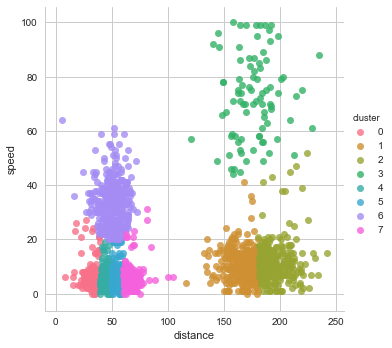

In [59]:
sns.lmplot(
    x='distance', y='speed', data=df,
    fit_reg=False, hue='cluster')

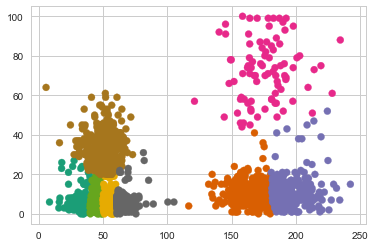

In [45]:
p = 

In [46]:
p.get

In [19]:
d = df[['distance', 'speed', 'cluster']]

In [20]:
len(d)

3430

In [21]:
d.head()

,distance,speed,cluster
0,36.88,5,0
1,33.32,8,0
2,38.96,4,0
3,39.31,3,0
4,36.80,4,0


In [ ]:
sns.FacetGrid(d, 'distance', 'speed')

In [ ]:
df

In [ ]:
g = sns.jointplot(
    "distance", "speed", data=df,
    kind="kde", space=0, color="g")

In [57]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

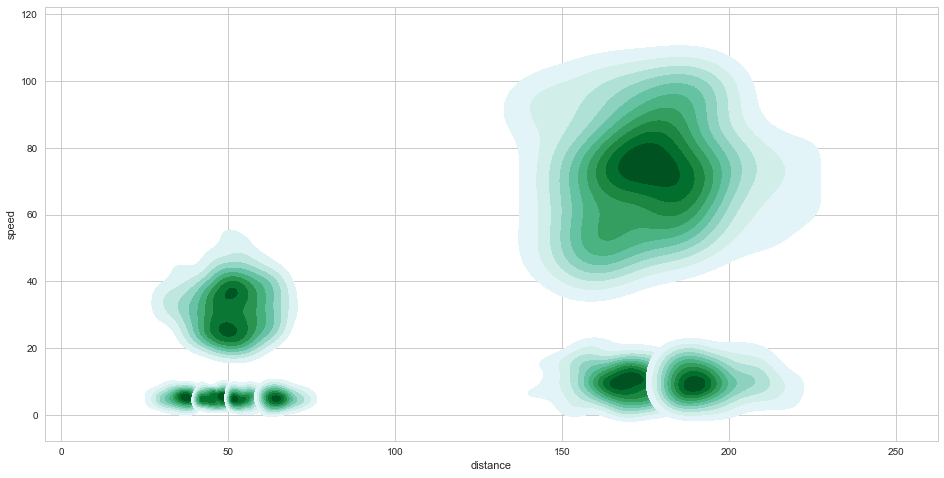

In [52]:
# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

num_clusters = len(df.cluster.unique())
pal = sns.cubehelix_palette(n_colors=num_clusters)

for i in range(num_clusters):
    df_i = df[df['cluster']==i]
    ax = sns.kdeplot(
        df_i.distance, df_i.speed,
        shade=True, shade_lowest=False)
    
# ax.legend()